In [ ]:
import pip
pip.main(['install', 'pandas'])
pip.main(['install', 'matplotlib'])
pip.main(['install', 'seaborn'])
pip.main(['install', 'scikit-learn'])
!pip.main(['install', 'nbmerge'])
pip.main(['install', 'nbformat'])
!pip install nbformat ipynb-py-convert

IMPORTATION DES BIBLIOTHÈQUES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

CHARGEMENT DES DONNÉES

In [3]:
BOTANIC_F="C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\BOTANIC.pkl"
df_BOTANIC_F=pd.read_pickle(BOTANIC_F)

In [4]:
df_BOTANIC_F

IDCLIENT MAGASIN DATEREADHESION  CODEINSEE   SEXE      AGE_GROUP  \
0           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
1           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
2           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
3           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
4           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
...           ...     ...            ...        ...    ...            ...   
7405187     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   
7405188     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   
7405189     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   
7405190     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   
7405191     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   

         ANCIENNETE_ADHESION ANCIENNETE_ADHESION_CAT ANCIENNETE_READ  \
0                  14.190281                  3 ans+       6-12 mois   
1                  14.190281                  3 ans+       6-12 mois   
2                  14.190281                  3 ans+       6-12 mois   
3                  14.190281                  3 ans+       6-12 mois   
4                  14.190281                  3 ans+       6-12 mois   
...                      ...                     ...             ...   
7405187            13.552361                  3 ans+        0-6 mois   
7405188            13.552361                  3 ans+        0-6 mois   
7405189            13.552361                  3 ans+        0-6 mois   
7405190            13.552361                  3 ans+        0-6 mois   
7405191            13.552361                  3 ans+        0-6 mois   

                VILLE  ... TOTAL_ACHAT_2016 PREMIERE_COMMANDE_2016  \
0        SAINT-PRIEST  ...          1936.76             2016-01-20   
1        SAINT-PRIEST  ...          1936.76             2016-01-20   
2        SAINT-PRIEST  ...          1936.76             2016-01-20   
3        SAINT-PRIEST  ...          1936.76             2016-01-20   
4        SAINT-PRIEST  ...          1936.76             2016-01-20   
...               ...  ...              ...                    ...   
7405187      MULHOUSE  ...          1739.20             2016-04-14   
7405188      MULHOUSE  ...          1739.20             2016-04-14   
7405189      MULHOUSE  ...          1739.20             2016-04-14   
7405190      MULHOUSE  ...          1739.20             2016-04-14   
7405191      MULHOUSE  ...          1739.20             2016-04-14   

         DERNIERE_COMMANDE_2016 ANCIENNETE_1ERE_CDE_2016  \
0                    2016-11-20                      346   
1                    2016-11-20                      346   
2                    2016-11-20                      346   
3                    2016-11-20                      346   
4                    2016-11-20                      346   
...                         ...                      ...   
7405187              2016-12-08                      261   
7405188              2016-12-08                      261   
7405189              2016-12-08                      261   
7405190              2016-12-08                      261   
7405191              2016-12-08                      261   

         ANCIENNETE_DERNIERE_CDE_2016  TEMPS_MOY_CDE_2016 FREQ_COMMANDE_2016  \
0                                  41            5.169492           0.126085   
1                                  41            5.169492           0.126085   
2                                  41            5.169492           0.126085   
3                                  41            5.169492           0.126085   
4                                  41            5.169492           0.126085   
...                               ...                 ...                ...   
7405187                            23           21.636364           0.940711   
7405188          

In [5]:
df_BOTANIC_F.shape

(7404788, 39)

In [6]:
df_BOTANIC_F.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7404788 entries, 0 to 7405191
Data columns (total 39 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   IDCLIENT                      int32         
 1   MAGASIN                       object        
 2   DATEREADHESION                datetime64[ns]
 3   CODEINSEE                     int32         
 4   SEXE                          object        
 5   AGE_GROUP                     object        
 6   ANCIENNETE_ADHESION           float64       
 7   ANCIENNETE_ADHESION_CAT       category      
 8   ANCIENNETE_READ               category      
 9   VILLE                         object        
 10  LIBELLEDEPARTEMENT            object        
 11  LIBELLEREGIONCOMMERCIALE      object        
 12  IDTICKET                      int32         
 13  TIC_DATE                      datetime64[ns]
 14  TIC_TOTALTTC                  float64       
 15  FREQ_MAG                      int64  

In [7]:
df_BOTANIC_F.drop(columns=['PREMIERE_COMMANDE_2016'], inplace=True)

In [8]:
df_BOTANIC_F.drop(columns=['DERNIERE_COMMANDE_2016'], inplace=True)

In [9]:
#Mise au format du LIBELLEDEPARTEMENT
df_BOTANIC_F['LIBELLEDEPARTEMENT'] = df_BOTANIC_F['LIBELLEDEPARTEMENT'].astype(np.int64)


In [10]:
df_BOTANIC_F.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7404788 entries, 0 to 7405191
Data columns (total 37 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   IDCLIENT                      int32         
 1   MAGASIN                       object        
 2   DATEREADHESION                datetime64[ns]
 3   CODEINSEE                     int32         
 4   SEXE                          object        
 5   AGE_GROUP                     object        
 6   ANCIENNETE_ADHESION           float64       
 7   ANCIENNETE_ADHESION_CAT       category      
 8   ANCIENNETE_READ               category      
 9   VILLE                         object        
 10  LIBELLEDEPARTEMENT            int64         
 11  LIBELLEREGIONCOMMERCIALE      object        
 12  IDTICKET                      int32         
 13  TIC_DATE                      datetime64[ns]
 14  TIC_TOTALTTC                  float64       
 15  FREQ_MAG                      int64  

In [11]:
# Conversion de la colonne 'ANCIENNETE_READ_CAT' au type 'object'
df_BOTANIC_F['ANCIENNETE_READ'] = df_BOTANIC_F['ANCIENNETE_READ'].astype('object')

In [12]:
# Conversion de la colonne 'ANCIENNETE_ADHESION_CAT' au type 'object'
df_BOTANIC_F['ANCIENNETE_ADHESION_CAT'] = df_BOTANIC_F['ANCIENNETE_ADHESION_CAT'].astype('object')

In [13]:
# Conversion de la colonne 'ANCIENNETE_READ_CAT_2017' au type 'object'
df_BOTANIC_F['ANCIENNETE_READ_CAT_2017'] = df_BOTANIC_F['ANCIENNETE_READ_CAT_2017'].astype('object')

Vérification du traitement

In [14]:
df_BOTANIC_F.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7404788 entries, 0 to 7405191
Data columns (total 37 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   IDCLIENT                      int32         
 1   MAGASIN                       object        
 2   DATEREADHESION                datetime64[ns]
 3   CODEINSEE                     int32         
 4   SEXE                          object        
 5   AGE_GROUP                     object        
 6   ANCIENNETE_ADHESION           float64       
 7   ANCIENNETE_ADHESION_CAT       object        
 8   ANCIENNETE_READ               object        
 9   VILLE                         object        
 10  LIBELLEDEPARTEMENT            int64         
 11  LIBELLEREGIONCOMMERCIALE      object        
 12  IDTICKET                      int32         
 13  TIC_DATE                      datetime64[ns]
 14  TIC_TOTALTTC                  float64       
 15  FREQ_MAG                      int64  

In [15]:
df_BOTANIC_F.shape

(7404788, 37)

In [16]:
df_BOTANIC_F.drop(columns=['ANCIENNETE_READ_CAT_2017'], inplace=True)

DÉFINITION DES VARIABLES CATÉGORIELLES

In [17]:
# Importer la librairie pandas
import pandas as pd

# Définition des variables catégorielles
var_cat = df_BOTANIC_F.select_dtypes(include=['object']).columns.tolist()
print(var_cat)

['MAGASIN', 'SEXE', 'AGE_GROUP', 'ANCIENNETE_ADHESION_CAT', 'ANCIENNETE_READ', 'VILLE', 'LIBELLEREGIONCOMMERCIALE', 'TYPE_UNIVERS']


In [18]:
df_BOTANIC_F['ANCIENNETE_ADHESION_CAT'].value_counts()

ANCIENNETE_ADHESION_CAT
3 ans+       6373604
2-3 ans      1030168
0-1 an(s)        584
1-2 ans          432
Name: count, dtype: int64

Il convient de regrouper les deux dernières modalités 

In [19]:
#regroupement des modalités:
df_BOTANIC_F['ANCIENNETE_ADHESION_CAT']=np.where(df_BOTANIC_F['ANCIENNETE_ADHESION_CAT'] =='0-1 an(s)', '0-3 ans', df_BOTANIC_F['ANCIENNETE_ADHESION_CAT']) 
df_BOTANIC_F['ANCIENNETE_ADHESION_CAT']=np.where(df_BOTANIC_F['ANCIENNETE_ADHESION_CAT'] =='1-2 ans', '0-3 ans', df_BOTANIC_F['ANCIENNETE_ADHESION_CAT'])
df_BOTANIC_F['ANCIENNETE_ADHESION_CAT']=np.where(df_BOTANIC_F['ANCIENNETE_ADHESION_CAT'] =='2-3 ans', '0-3 ans', df_BOTANIC_F['ANCIENNETE_ADHESION_CAT'])

Vérification du traitement

In [20]:
df_BOTANIC_F['ANCIENNETE_ADHESION_CAT'].value_counts()

ANCIENNETE_ADHESION_CAT
3 ans+     6373604
0-3 ans    1031184
Name: count, dtype: int64

In [21]:
df_BOTANIC_F['ANCIENNETE_READ'].value_counts()

ANCIENNETE_READ
6-12 mois    3713564
0-6 mois     3691224
Name: count, dtype: int64

In [22]:
df_BOTANIC_F['MAGASIN'].value_counts()

MAGASIN
HEI    262276
SEY    259372
SSM    225688
BEA    220948
MOB    217080
        ...  
SCH     26200
RMA     25108
SAL     19624
BAR     15672
EST      3484
Name: count, Length: 67, dtype: int64

In [23]:
df_BOTANIC_F['SEXE'].value_counts()

SEXE
FEMME    4168912
HOMME    3235876
Name: count, dtype: int64

In [24]:
df_BOTANIC_F['AGE_GROUP'].value_counts()

AGE_GROUP
Inconnue         3367132
AGE DE 61-100    1479404
AGE DE 46-60     1384028
AGE DE 31-45      926744
AGE DE 18-30      247480
Name: count, dtype: int64

In [25]:
df_BOTANIC_F['VILLE'].value_counts()

VILLE
HEILLECOURT                    262276
SEYSSINS                       259372
LA SEYNE-SUR-MER               225688
BEAUMONT                       220948
MONTBONNOT-SAINT-MARTIN        217080
                                ...  
SCHWEIGHOUSE-SUR-MODER          26200
RUEIL MALMAISON                 25108
SALLANCHES                      19624
BARCELONNETTE                   15672
ST JULIEN EN GENEVOIS CEDEX      3484
Name: count, Length: 67, dtype: int64

In [26]:
df_BOTANIC_F['LIBELLEREGIONCOMMERCIALE'].value_counts()

LIBELLEREGIONCOMMERCIALE
Rhône-Alpes       2769584
Littoral          1989092
Alsace-Est        1353952
Centre-Paris      1288676
Vente en ligne       3484
Name: count, dtype: int64

In [27]:
df_BOTANIC_F['TYPE_UNIVERS'].value_counts()

TYPE_UNIVERS
UNIVERS_U1    1851197
UNIVERS_U2    1851197
UNIVERS_U3    1851197
UNIVERS_U4    1851197
Name: count, dtype: int64

DÉFINITION DES VARIABLES QUANTITATIVES

In [28]:
# Importer la librairie pandas
import pandas as pd

# Définition des variables quantitatives
var_quan = df_BOTANIC_F.select_dtypes(include=['int64','float64']).columns.tolist()
print(var_quan)

['ANCIENNETE_ADHESION', 'LIBELLEDEPARTEMENT', 'TIC_TOTALTTC', 'FREQ_MAG', 'Quantite', 'NBRE_ARTICLE', 'NBRE_FAM_ARTICLE', 'TOTAL_REMISE', 'MONTANT_TOTAL', 'MARGE', 'Variete_Panier', 'Nb_Univers', 'Total_Articles', 'NBRE_COMMANDE_2016', 'TOTAL_ACHAT_2016', 'ANCIENNETE_1ERE_CDE_2016', 'ANCIENNETE_DERNIERE_CDE_2016', 'TEMPS_MOY_CDE_2016', 'FREQ_COMMANDE_2016', 'NBRE_CDE_2017']


CONSTRUCTION DU LABEL Y

EXPLICATION DU CHOIX DES VARIABLES DANS LA CONSTRUCTION DE Y

-Première Condition : 'FREQ_COMMANDE_2016' > 1

Cette condition permet d'identifier les clients qui ont passé plus d'une commande dans le passé. 
Les clients qui passent plusieurs commandes sont généralement considérés comme plus engagés et fidèles. 
Si ces clients cessent subitement leurs achats, cela pourrait indiquer un problème potentiel, d'où la nécessité de surveiller ces clients plus attentivement.

-Deuxième Condition : Pas de Commande en 2017

Cette condition vérifie si un client n'a pas complété d'achat au cours de l'année 2017. 
La non-réalisation d'achats pendant une période significative peut indiquer que le client a cessé d'acheter pour une raison quelconque.

Pourquoi l'année 2017?

Il est important d'examiner un intervalle de temps suffisamment long pour déterminer si le manque d'activité est un comportement aberrant ou un signe d'attrition réelle. 2017 est utilisée ici comme période de référence.

In [29]:
#Pour le client soit 'Attritionniste' il faut vérifier deux conditions:
# Première condition : TOP_COMMANDE > 1
df_BOTANIC_F['CONDITION_1'] = df_BOTANIC_F['FREQ_COMMANDE_2016'] > 1

# Deuxième condition : Vérifier si le client n'a pas passé de commande en 2017
clients_2017 = df_BOTANIC_F[df_BOTANIC_F['TIC_DATE'] == 2017]['IDCLIENT'].unique()
df_BOTANIC_F['CONDITION_2'] = ~df_BOTANIC_F['IDCLIENT'].isin(clients_2017)  # Clients qui n'ont pas commandé en 2017

# Colonne Y indiquant si le client est attritionniste
df_BOTANIC_F['ATTRITION'] = (df_BOTANIC_F['CONDITION_1'] & df_BOTANIC_F['CONDITION_2']).astype(int)

# Supprimez les colonnes conditionnelles intermédiaires si elles ne sont plus nécessaires
df_BOTANIC_F.drop(['CONDITION_1', 'CONDITION_2'], axis=1, inplace=True)

# Afficher le DataFrame final
print(df_BOTANIC_F)

         IDCLIENT MAGASIN DATEREADHESION  CODEINSEE   SEXE      AGE_GROUP  \
0           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
1           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
2           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
3           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
4           10000     PRI     2017-05-11      69259  FEMME       Inconnue   
...           ...     ...            ...        ...    ...            ...   
7405187     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   
7405188     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   
7405189     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   
7405190     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   
7405191     99986     MUL     2017-10-27      68206  FEMME  AGE DE 61-100   

         ANCIENNETE_ADHESION ANCIENNETE_ADHESION_CAT ANCIENNETE_READ  \
0  

Combinaison des Deux Conditions
Pour qu'un client soit marqué comme attritionniste (ATTRITION = 1):
Le client doit avoir passé plus d'une commande (indique un engagement initial important)
Le client n'a pas passé de commande en 2017 (indique un désengagement significatif)

In [30]:
df_BOTANIC_F['ATTRITION'] = df_BOTANIC_F['ATTRITION'].map({0: 'non_attritionniste', 1: 'attritionniste'})

In [31]:
df_BOTANIC_F['ATTRITION']

0          non_attritionniste
1          non_attritionniste
2          non_attritionniste
3          non_attritionniste
4          non_attritionniste
                  ...        
7405187    non_attritionniste
7405188    non_attritionniste
7405189    non_attritionniste
7405190    non_attritionniste
7405191    non_attritionniste
Name: ATTRITION, Length: 7404788, dtype: object

In [32]:
df_BOTANIC_F['ATTRITION'].value_counts()

ATTRITION
non_attritionniste    6331732
attritionniste        1073056
Name: count, dtype: int64

In [33]:
#Pourcentage des clients attritionnistes
Pourcentage = df_BOTANIC_F['ATTRITION'].value_counts(normalize=True)*100

Pourcentage

ATTRITION
non_attritionniste    85.50862
attritionniste        14.49138
Name: proportion, dtype: float64

In [34]:
#Nombre de clients attritionnistes
Nombre_de_clients=df_BOTANIC_F['ATTRITION'].value_counts()
Nombre_de_clients

ATTRITION
non_attritionniste    6331732
attritionniste        1073056
Name: count, dtype: int64

On a 6331732 soit 85.5% des clients qui ne sont pas attritionnistes.

On a 1073056 soit 14.5% des clients qui peuvent aller à la concurrence

In [35]:
df_BOTANIC_F.drop(columns=['TIC_DATE'], inplace=True)

In [36]:
df_BOTANIC_F.drop(columns=['DATEREADHESION'], inplace=True)

In [37]:
df_BOTANIC_F.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7404788 entries, 0 to 7405191
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   IDCLIENT                      int32  
 1   MAGASIN                       object 
 2   CODEINSEE                     int32  
 3   SEXE                          object 
 4   AGE_GROUP                     object 
 5   ANCIENNETE_ADHESION           float64
 6   ANCIENNETE_ADHESION_CAT       object 
 7   ANCIENNETE_READ               object 
 8   VILLE                         object 
 9   LIBELLEDEPARTEMENT            int64  
 10  LIBELLEREGIONCOMMERCIALE      object 
 11  IDTICKET                      int32  
 12  TIC_TOTALTTC                  float64
 13  FREQ_MAG                      int64  
 14  TYPE_UNIVERS                  object 
 15  CODEUNIVERS                   int32  
 16  Quantite                      float64
 17  NBRE_ARTICLE                  int64  
 18  NBRE_FAM_ARTICLE           

SÉPARATION DES FEATURES ET DU LABEL

In [38]:
# Diviser le dataframe en x et y
X_BOTANIC = df_BOTANIC_F.drop('ATTRITION', axis=1)
Y = df_BOTANIC_F['ATTRITION']

In [39]:
X_BOTANIC.isnull().sum().sum()

0

VISUALISATION DE L'ÉCHANTILLON

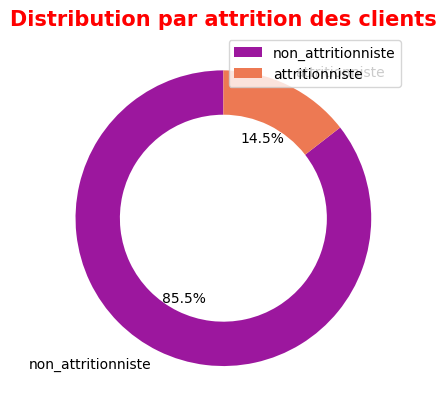

In [40]:
# Calculez les pourcentages de chaque catégorie avec leurs labels
Pourcentage = df_BOTANIC_F['ATTRITION'].value_counts(normalize=True) * 100
Labels = df_BOTANIC_F['ATTRITION'].value_counts(normalize=True).index

# Définir les couleurs de la palette
palette_colors = sns.color_palette("plasma", len(Labels))

# Créer un graphique en donut
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    Pourcentage, 
    labels=Labels, 
    autopct='%.1f%%',
    startangle=90, 
    colors=palette_colors, 
    wedgeprops=dict(width=0.3)
)

# Définir les propriétés du texte
for text in texts + autotexts:
    text.set_color('black')
# Ajout de la légende
plt.legend()
# Ajouter un titre
ax.set_title("Distribution par attrition des clients", fontsize=15, color='red', fontweight='bold')

# Afficher le graphique
plt.show()

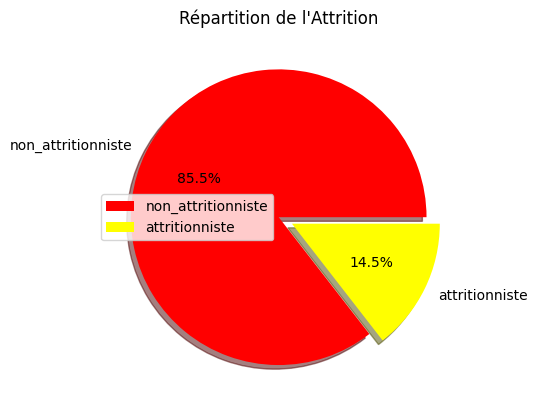

In [41]:
import matplotlib.pyplot as plt

# Calculez les pourcentages de chaque catégorie avec leurs labels
pourcentage = df_BOTANIC_F['ATTRITION'].value_counts(normalize=True) * 100
labels = df_BOTANIC_F['ATTRITION'].value_counts(normalize=True).index

# Créer le graphique en secteur
plt.pie(pourcentage[:3], 
        labels=labels[:3],
        colors=['red', 'yellow'],
        explode=[0, 0.1],
        autopct='%1.1f%%',
        shadow=True)

# Ajout de la légende
plt.legend()
plt.title('Répartition de l\'Attrition')
plt.show()

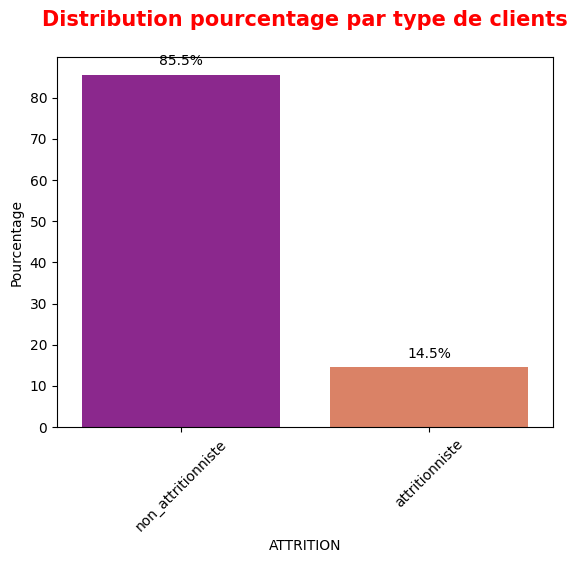

In [42]:
# Calculez les pourcentages de chaque catégorie avec leurs labels
Pourcentage = df_BOTANIC_F['ATTRITION'].value_counts(normalize=True) * 100
Labels = df_BOTANIC_F['ATTRITION'].value_counts(normalize=True).index

# Créez un DataFrame à partir des pourcentages pour pouvoir l'utiliser avec Seaborn
df_pourcentage = pd.DataFrame({
    'ATTRITION': Labels,
    'Pourcentage': Pourcentage
})

# Définir les couleurs de la palette
palette = sns.color_palette("plasma", len(Labels))

# Tracé du graphique à barres avec les pourcentages, définissant `ATTRITION` en tant que 'hue'
ax = sns.barplot(x='ATTRITION', y='Pourcentage', data=df_pourcentage, hue='ATTRITION', palette=palette, dodge=False)

# Ajuster l'orientation des étiquettes en X à 45 degrés
plt.xticks(rotation=45)

# Ajouter des étiquettes pour les pourcentages sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type="edge", padding=5)

# Ajouter le titre
ax.set_title("Distribution pourcentage par type de clients\n", fontsize=15, color='red', fontweight='bold')

# Vérifier si une légende existe avant de tenter de la supprimer
if ax.get_legend() is not None:
    ax.get_legend().remove()  # Enlever la légende car elle n'est pas nécessaire ici.

# Afficher le graphique
plt.show()

IDENTIFICATION DES VARIABLES FORTEMENT CORRÉLÉES ENTRE ELLES

CORRÉLATION ENTRE LES VARIABLES NUMÉRIQUES

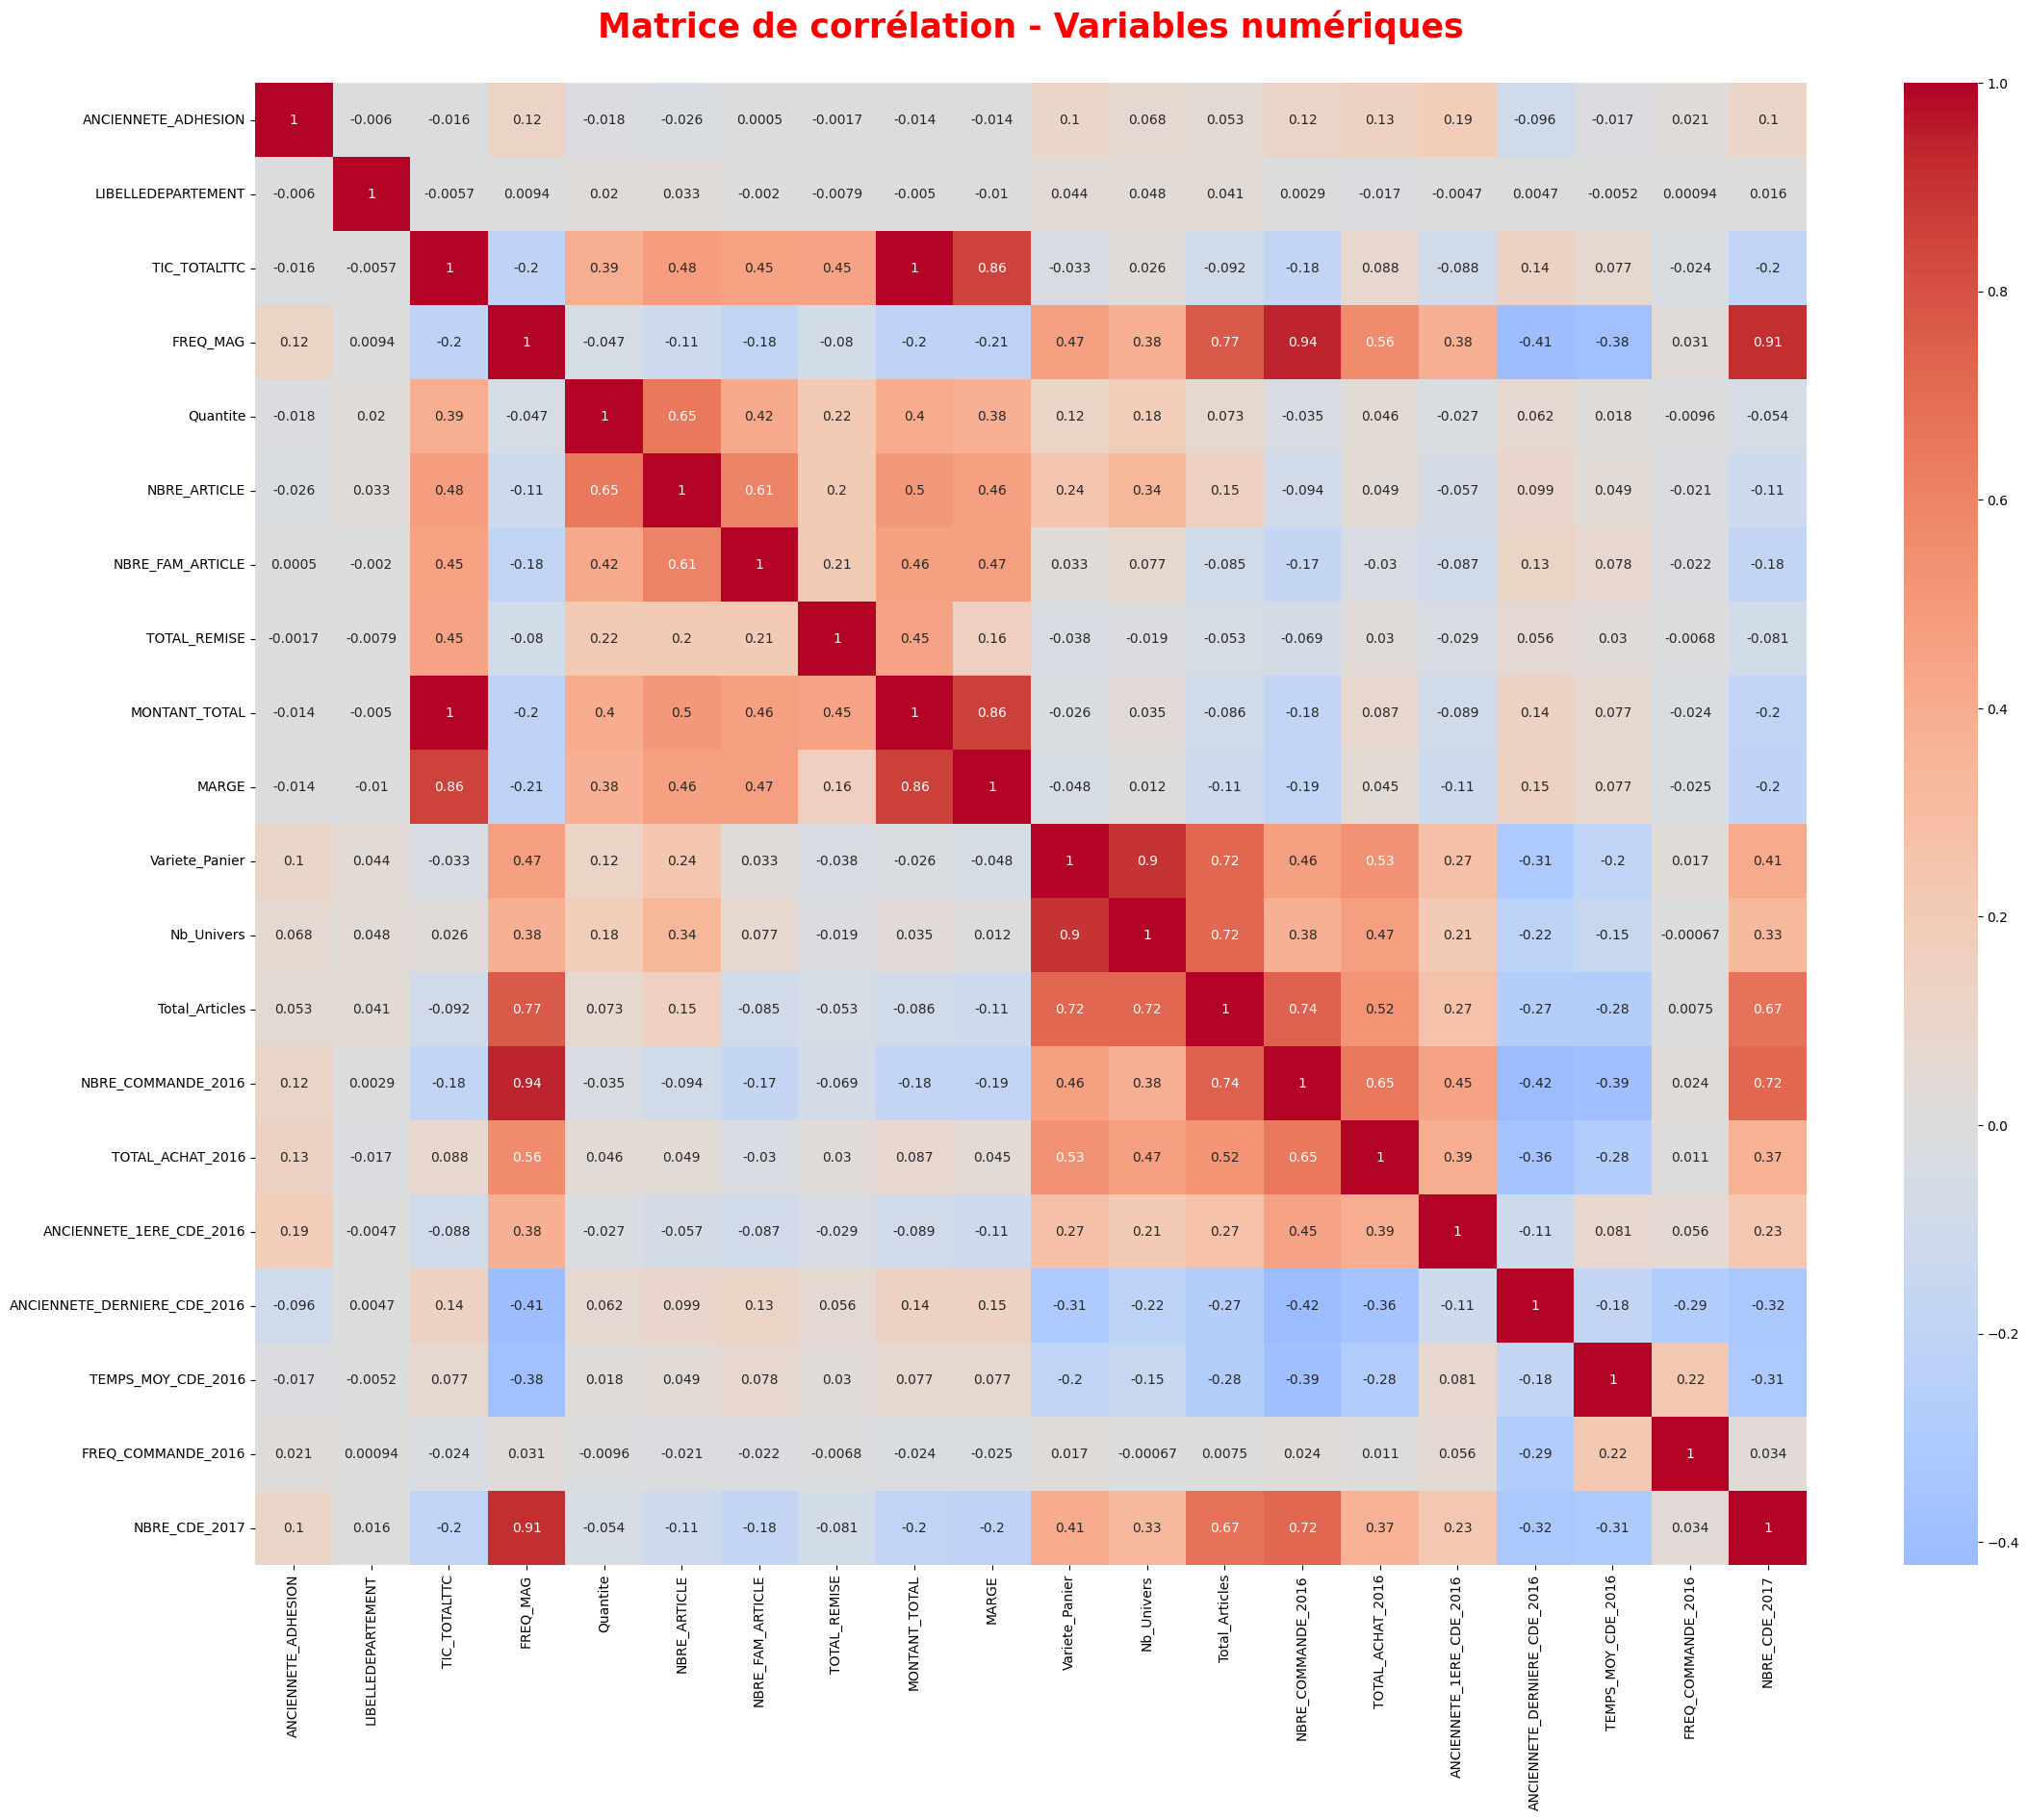

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les variables numériques dans le DataFrame
df_num = X_BOTANIC.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation pour les variables numériques
corr_matrix = df_num.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(26, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation - Variables numériques\n", fontsize=25, color='red', fontweight='bold')
plt.show()


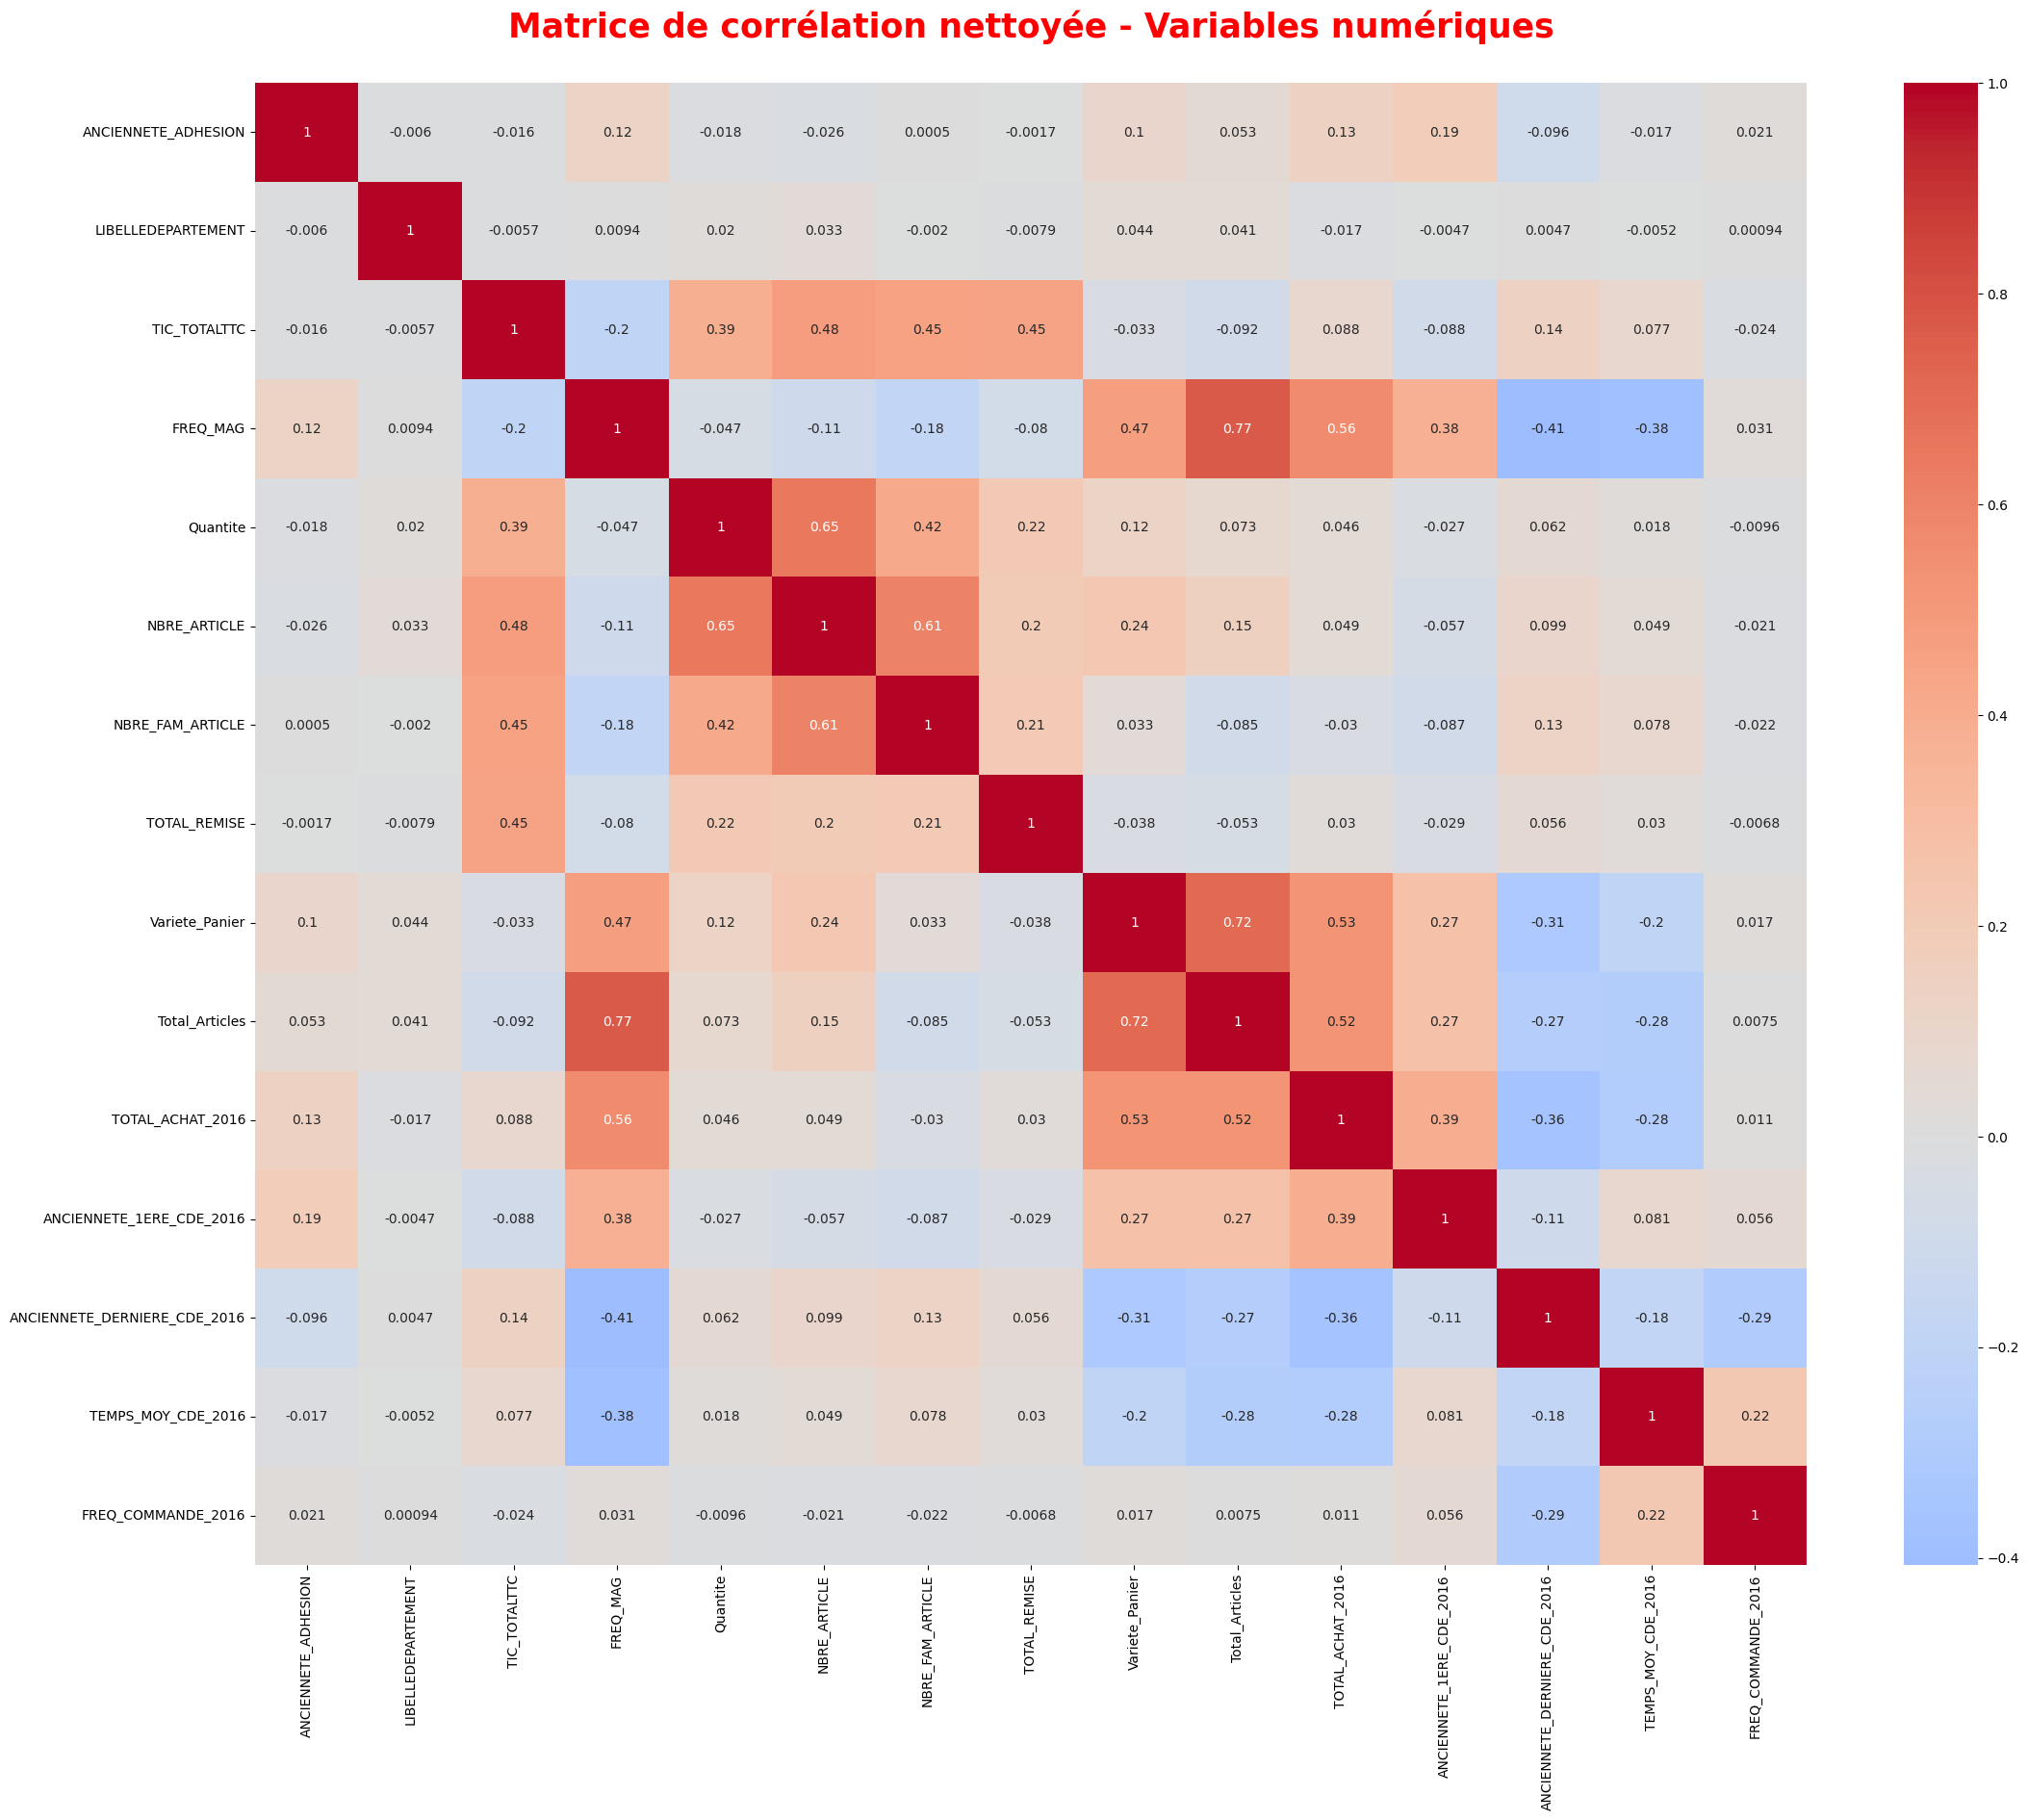

Variables supprimées: ['MONTANT_TOTAL', 'MARGE', 'Nb_Univers', 'NBRE_COMMANDE_2016', 'NBRE_CDE_2017']


In [44]:
#Suppression des Corrélations Fortes entre Variables Numériques
# Sélectionner les variables numériques dans le DataFrame
df_num = X_BOTANIC.select_dtypes(include=['int64', 'float64'])
threshold = 0.8
# Sélectionner les paires de features fortement corrélées
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Supprimer les variables fortement corrélées
df_num_clean = df_num.drop(columns=to_drop)

# Afficher de nouveau la heatmap de corrélation nettoyée
corr_matrix_clean = df_num_clean.corr()
plt.figure(figsize=(26, 20))
sns.heatmap(corr_matrix_clean, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation nettoyée - Variables numériques\n", fontsize=25, color='red', fontweight='bold')
plt.show()
print(f"Variables supprimées: {to_drop}")

CORRÉLATION ENTRE LES VARIABLES CATÉGORIELLES

                           MAGASIN      SEXE  AGE_GROUP  \
MAGASIN                   1.000000  0.155920   0.151136   
SEXE                      0.155920  1.000000   0.176615   
AGE_GROUP                 0.151136  0.176615   1.000000   
ANCIENNETE_ADHESION_CAT   0.225823  0.058946   0.281358   
ANCIENNETE_READ           0.075046  0.012559   0.012456   
VILLE                     1.000000  0.155920   0.151136   
LIBELLEREGIONCOMMERCIALE  1.000000  0.017411   0.030160   
TYPE_UNIVERS              0.000000  0.000000   0.000000   

                          ANCIENNETE_ADHESION_CAT  ANCIENNETE_READ     VILLE  \
MAGASIN                                  0.225823         0.075046  1.000000   
SEXE                                     0.058946         0.012559  0.155920   
AGE_GROUP                                0.281358         0.012456  0.151136   
ANCIENNETE_ADHESION_CAT                  0.999999         0.032547  0.225823   
ANCIENNETE_READ                          0.032547         1.000000  

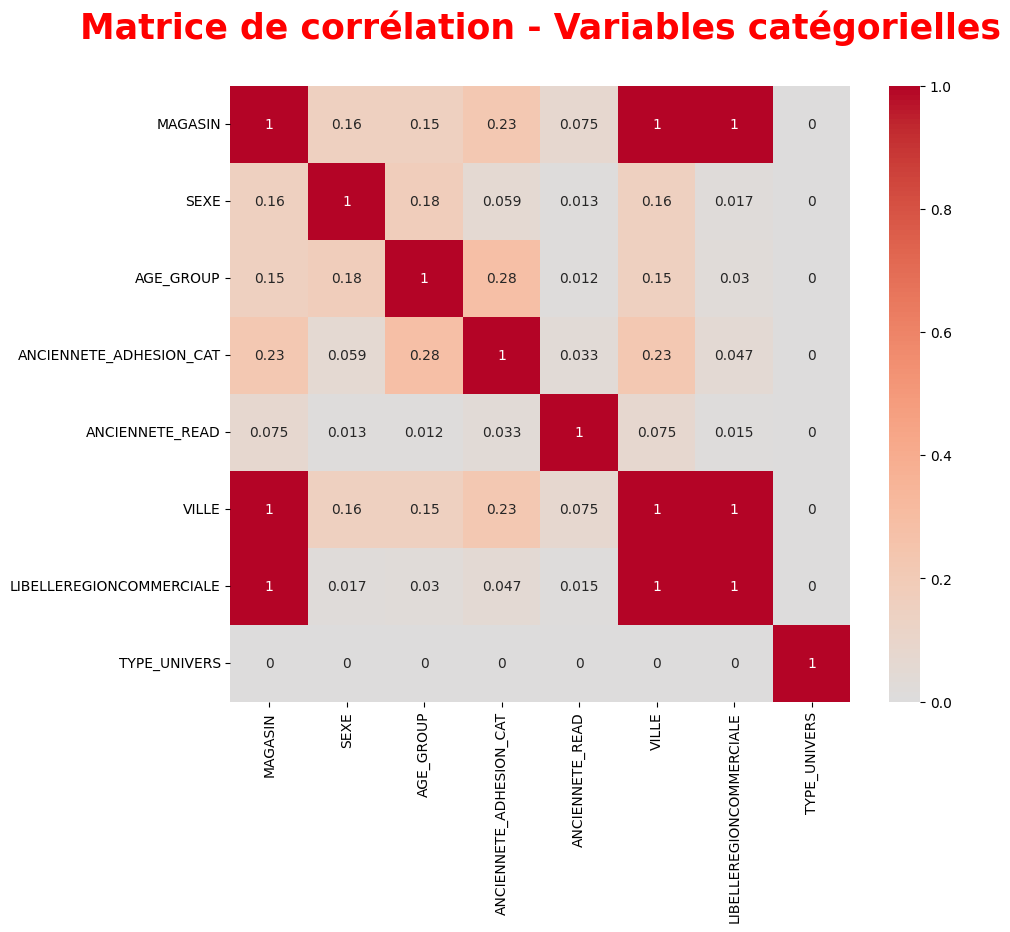

In [45]:
from scipy.stats import chi2_contingency

# Fonction pour calculer la corrélation chi2 entre deux variables catégorielles
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return (chi2 / (n * (min(r,k) - 1)))**0.5

# Liste des colonnes catégorielles
colonnes_cat = X_BOTANIC.select_dtypes(include=['object']).columns.tolist()

# Matrice de corrélation catégorielle
cat_corr_matrix = pd.DataFrame(index=colonnes_cat, columns=colonnes_cat)

for col1 in colonnes_cat:
    for col2 in colonnes_cat:
        cat_corr_matrix.loc[col1, col2] = cramers_v(X_BOTANIC[col1], X_BOTANIC[col2])

# Convertir en float pour affichage sur heatmap
cat_corr_matrix = cat_corr_matrix.astype(float)

# Afficher le tableau des valeurs chi-2 
print(cat_corr_matrix)

# Afficher la matrice de corrélation catégorielle
plt.figure(figsize=(10, 8))
sns.heatmap(cat_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation - Variables catégorielles\n", fontsize=25, color='red', fontweight='bold')
plt.show()

                          MAGASIN      SEXE  AGE_GROUP  \
MAGASIN                  0.000000  0.155920   0.151136   
SEXE                     0.155920  0.000000   0.176615   
AGE_GROUP                0.151136  0.176615   0.000000   
ANCIENNETE_ADHESION_CAT  0.225823  0.058946   0.281358   
ANCIENNETE_READ          0.075046  0.012559   0.012456   
TYPE_UNIVERS             0.000000  0.000000   0.000000   

                         ANCIENNETE_ADHESION_CAT  ANCIENNETE_READ  \
MAGASIN                                 0.225823         0.075046   
SEXE                                    0.058946         0.012559   
AGE_GROUP                               0.281358         0.012456   
ANCIENNETE_ADHESION_CAT                 0.000000         0.032547   
ANCIENNETE_READ                         0.032547         0.000000   
TYPE_UNIVERS                            0.000000         0.000000   

                         TYPE_UNIVERS  
MAGASIN                           0.0  
SEXE                         

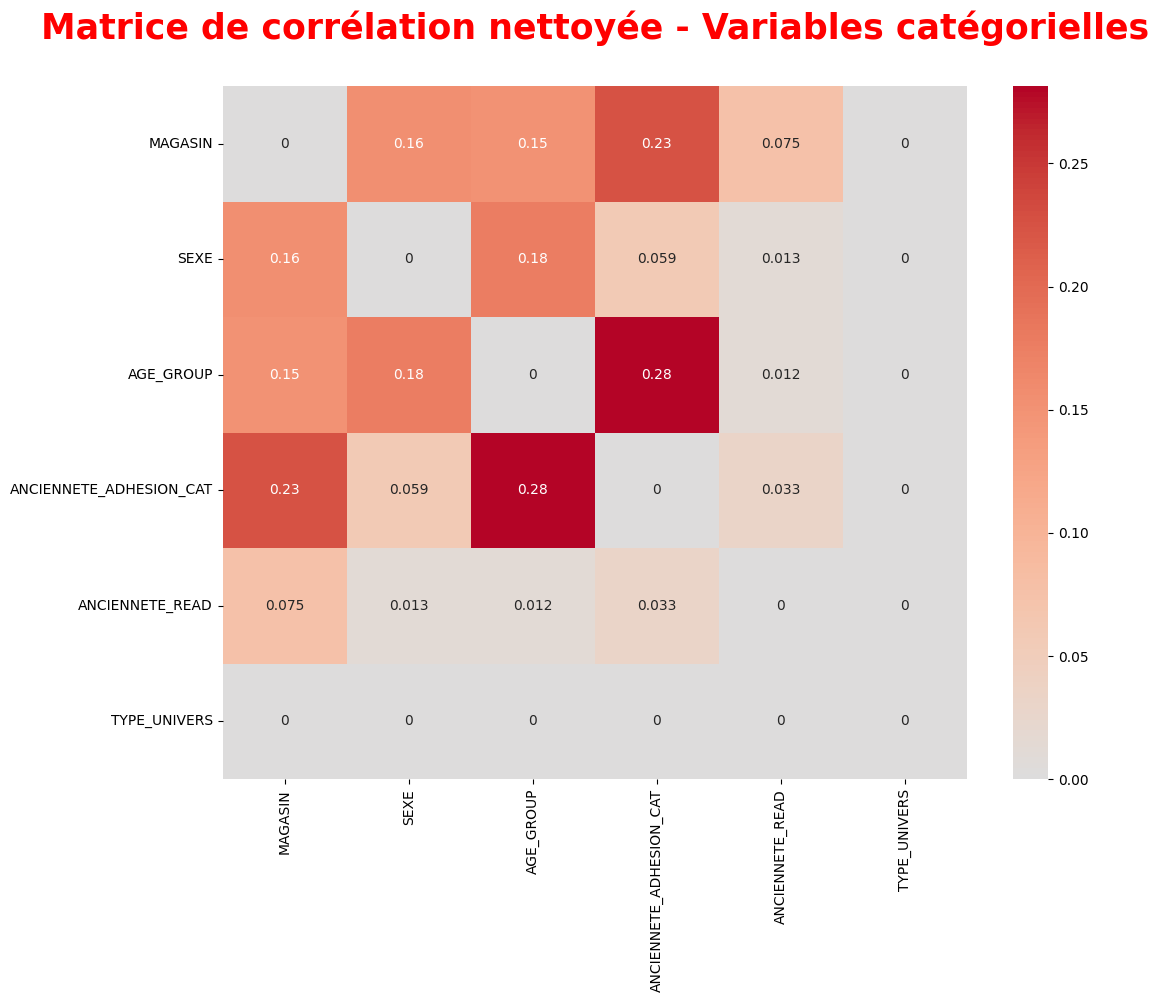

Variables supprimées: ['VILLE', 'LIBELLEREGIONCOMMERCIALE']


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.contingency import chi2_contingency

# Fonctions de support
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt((chi2 / n) / (min(confusion_matrix.shape) - 1))

# Variables catégorielles seules
X_BOTANIC_cat = X_BOTANIC.select_dtypes(include=['object', 'category'])

# Matrice de corrélation catégorielle
cat_corr_matrix = pd.DataFrame(index=X_BOTANIC_cat.columns, columns=X_BOTANIC_cat.columns)

# Remplissage de la matrice de corrélation catégorielle
for col1 in cat_corr_matrix.columns:
    for col2 in cat_corr_matrix.columns:
        if col1 != col2:
            cat_corr_matrix.loc[col1, col2] = cramers_v(X_BOTANIC_cat[col1], X_BOTANIC_cat[col2])

# Conversion des valeurs en float
cat_corr_matrix = cat_corr_matrix.astype(float)

# Fonction pour sélectionner les features fortement corrélées
def select_high_corr_features(corr_matrix, threshold=0.8):
    # Sélectionner les paires de features fortement corrélées
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
    return to_drop

to_drop_cat = select_high_corr_features(cat_corr_matrix, threshold)

# Supprimer les variables catégorielles fortement corrélées
df_cat_clean = X_BOTANIC_cat.drop(columns=to_drop_cat)

# Recalculer la matrice de corrélation pour les données nettoyées
cat_corr_matrix_clean = pd.DataFrame(index=df_cat_clean.columns, columns=df_cat_clean.columns)

for col1 in cat_corr_matrix_clean.columns:
    for col2 in cat_corr_matrix_clean.columns:
        if col1 != col2:
            cat_corr_matrix_clean.loc[col1, col2] = cramers_v(df_cat_clean[col1], df_cat_clean[col2])

# Conversion des valeurs en float
cat_corr_matrix_clean = cat_corr_matrix_clean.astype(float)

# Remplacer les NaN par zéro
cat_corr_matrix_clean.fillna(0, inplace=True)

# Afficher le tableau des valeurs chi-2 nettoyé
print(cat_corr_matrix_clean)

# Afficher la heatmap de corrélation catégorielle nettoyée
plt.figure(figsize=(12, 9))
sns.heatmap(cat_corr_matrix_clean, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation nettoyée - Variables catégorielles\n", fontsize=25, color='red', fontweight='bold')
plt.show()

print(f"Variables supprimées: {to_drop_cat}")

CORRÉLATION ENTRE LES VARIABLES NUMÉRIQUES ET CATÉGORIELLES

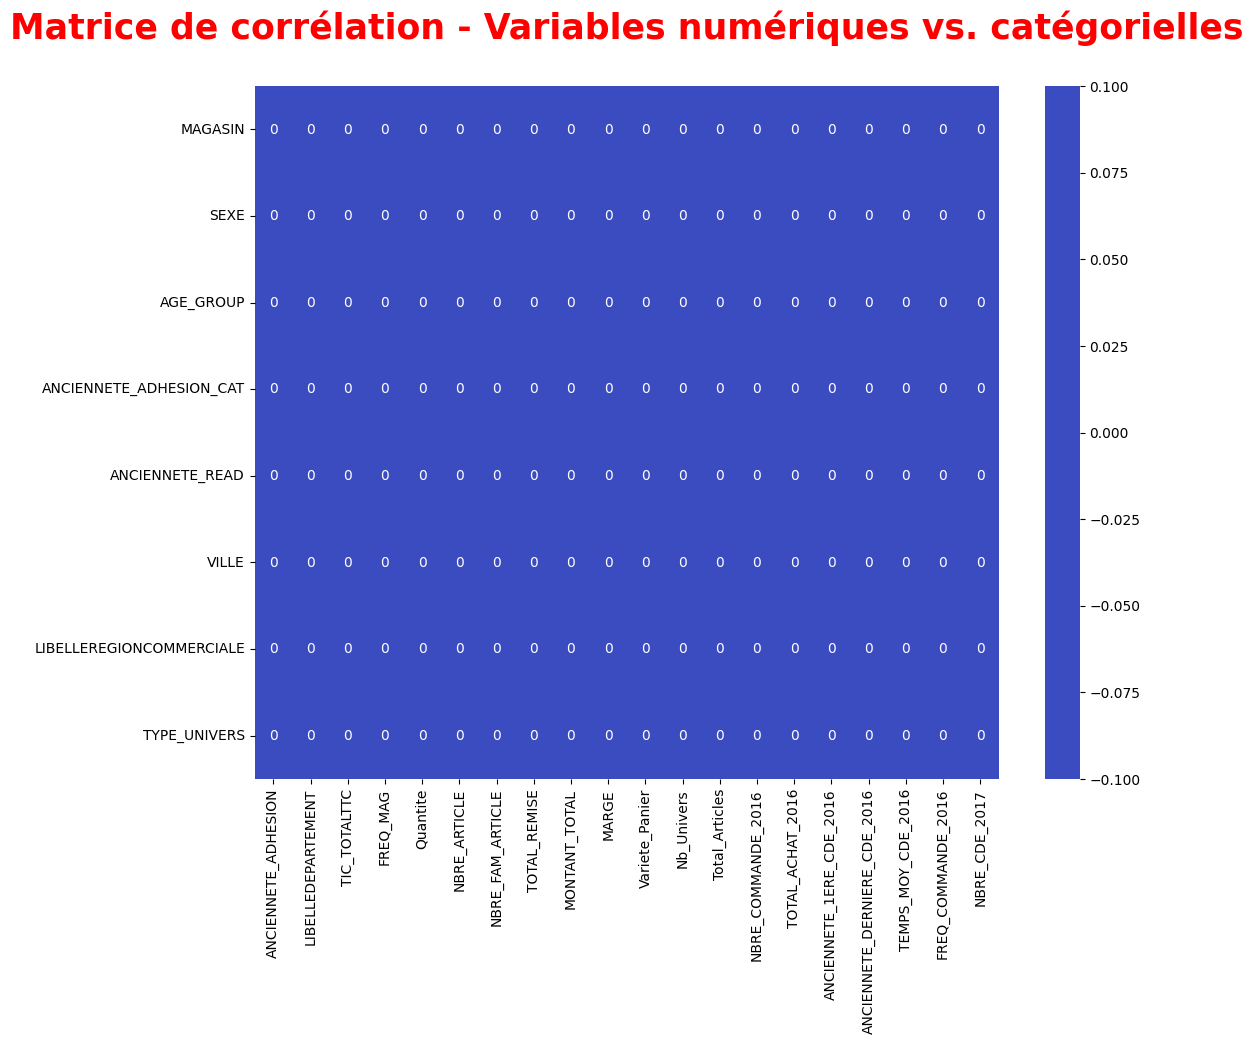

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Fonction pour calculer le eta_squared entre une variable numérique et une variable catégorielle
def eta_squared(a, b):
    # Supprimer les valeurs NaN
    a, b = a.dropna(), b.dropna()
    
    # Vérifier qu'il y a au moins deux catégories distinctes dans b pour éviter les erreurs de calcul
    if len(b.unique()) < 2:
        return 0
    
    # Créer une liste des valeurs a pour chaque catégorie dans b
    categories = [a[b == category] for category in b.unique() if b[b == category].nunique() > 1]
    
    # Vérifier que toutes les catégories ne sont pas constantes
    if len(categories) == 0:
        return 0

    f_val, p_val = f_oneway(*categories)
    
    # Total Sum of Squares
    ss_total = sum((a - a.mean())**2)
    
    # Sum of Squares Between
    ss_between = sum(len(cat) * (cat.mean() - a.mean())**2 for cat in categories)
    
    return ss_between / ss_total

# Sélection des colonnes numériques et catégorielles
num_cols = X_BOTANIC.select_dtypes(include=['int64', 'float64']).columns.tolist()
colonnes_cat = X_BOTANIC.select_dtypes(include=['object']).columns.tolist()

# Création de la matrice de corrélation mixte
mix_corr_matrix = pd.DataFrame(index=colonnes_cat, columns=num_cols)

# Calcul des valeurs de corrélation pour chaque combinaison de variables
for num_col in num_cols:
    for cat_col in colonnes_cat:
        value = eta_squared(X_BOTANIC[num_col], X_BOTANIC[cat_col])
        mix_corr_matrix.loc[cat_col, num_col] = value

# Conversion en float pour l'affichage sur la heatmap
mix_corr_matrix = mix_corr_matrix.astype(float)

# Affichage de la matrice de corrélation mixte
plt.figure(figsize=(12, 9))
sns.heatmap(mix_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation - Variables numériques vs. catégorielles\n", fontsize=25, color='red', fontweight='bold')
plt.show()

ANALYSE UNIVARIÉE

ANALYSE UNIVARIÉE DES VARIABLES CATÉGORIELLES

['MAGASIN', 'SEXE', 'AGE_GROUP', 'ANCIENNETE_ADHESION_CAT', 'ANCIENNETE_READ', 'TYPE_UNIVERS']


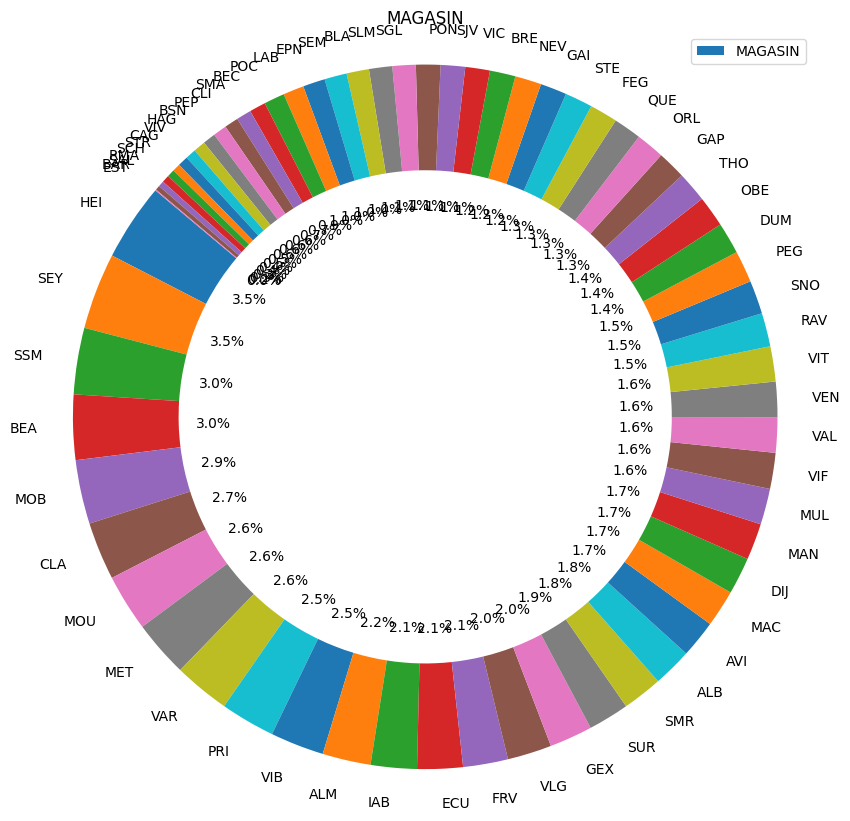

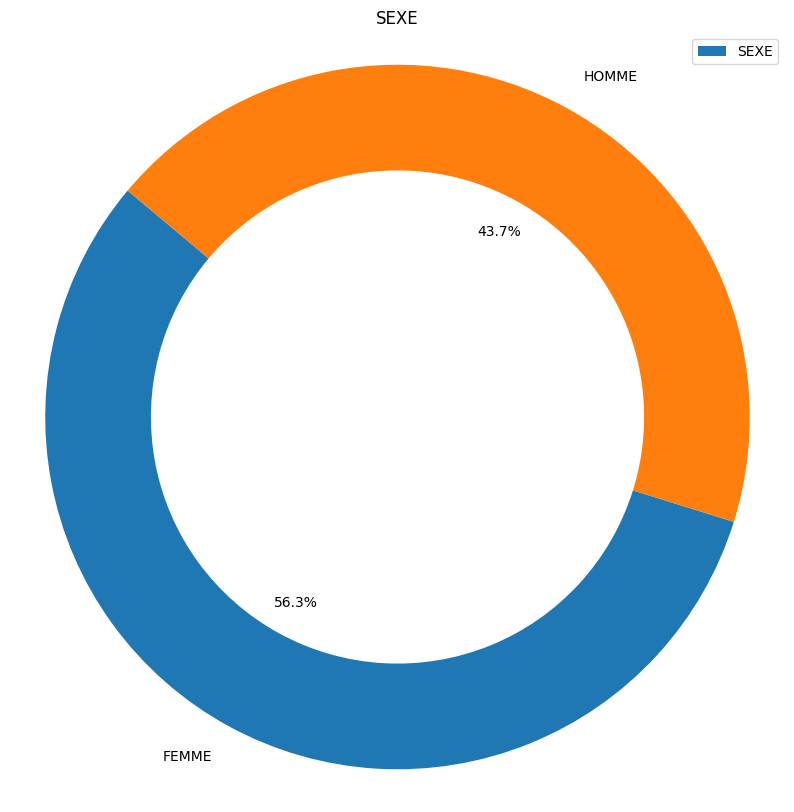

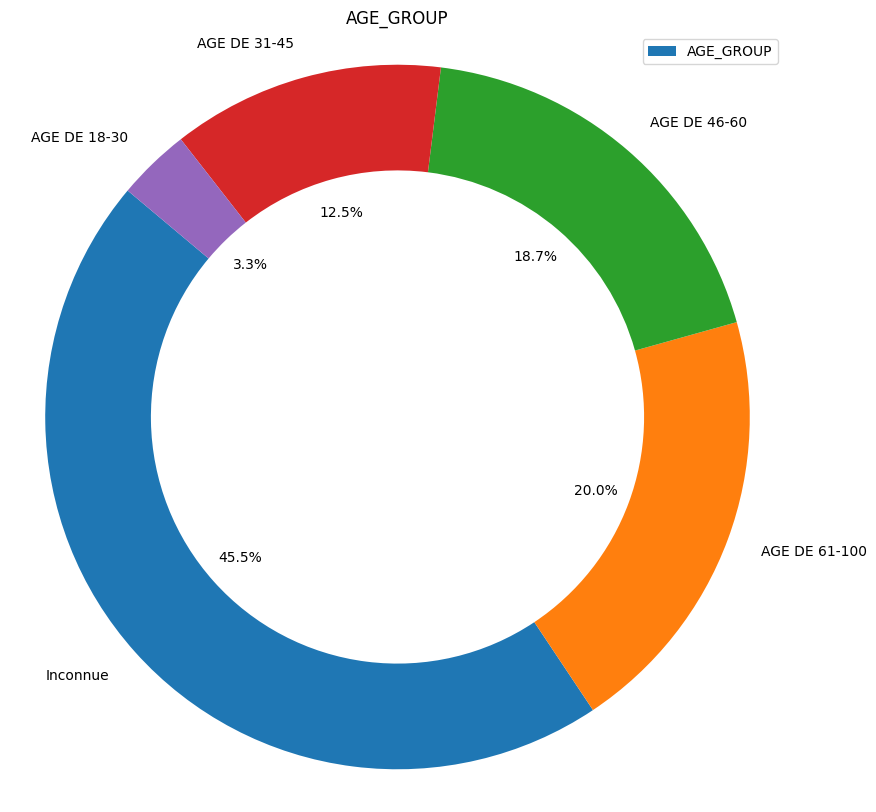

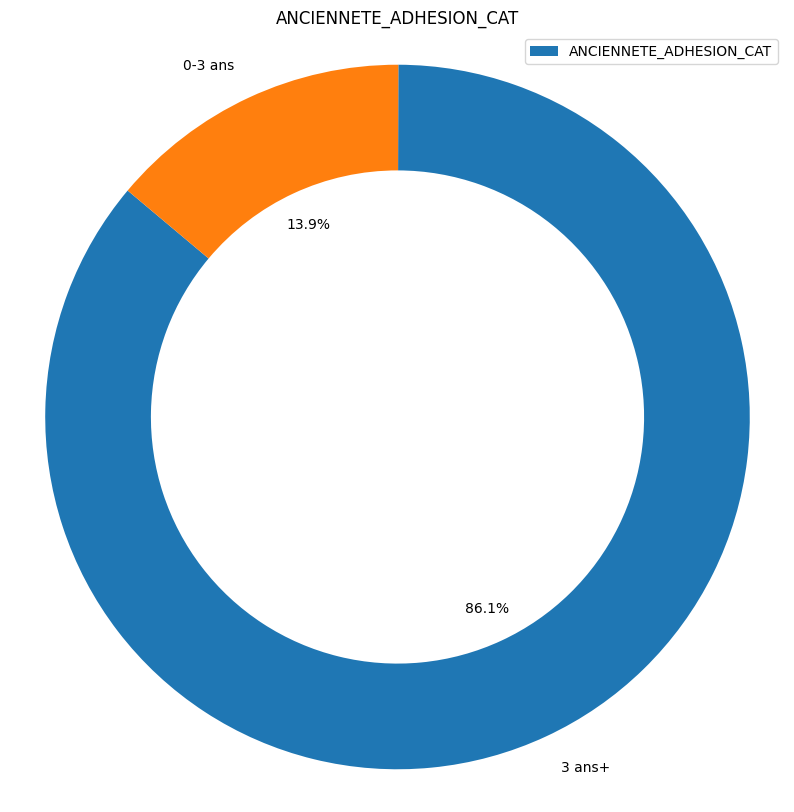

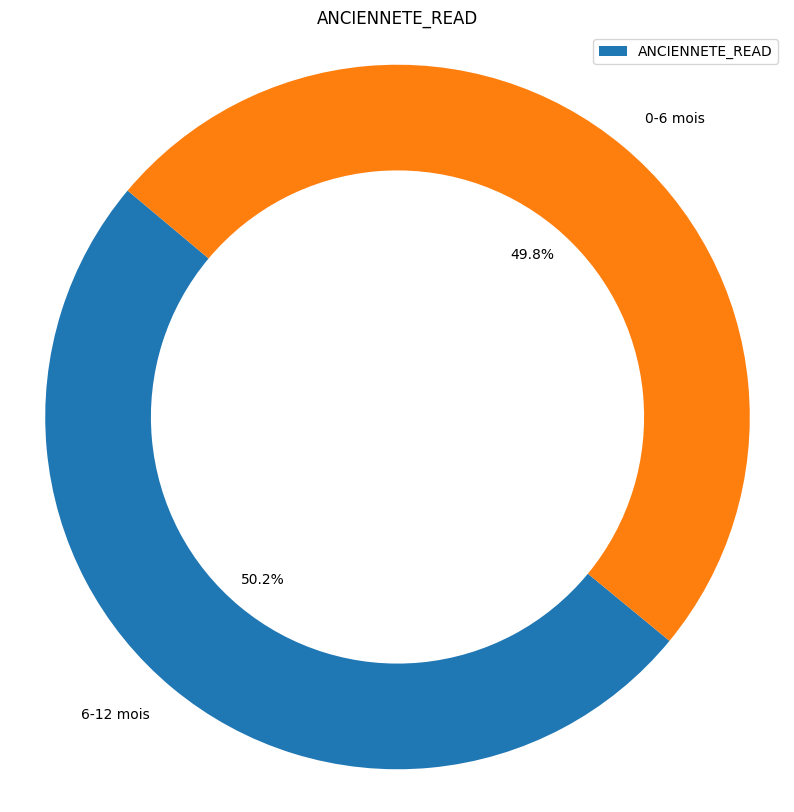

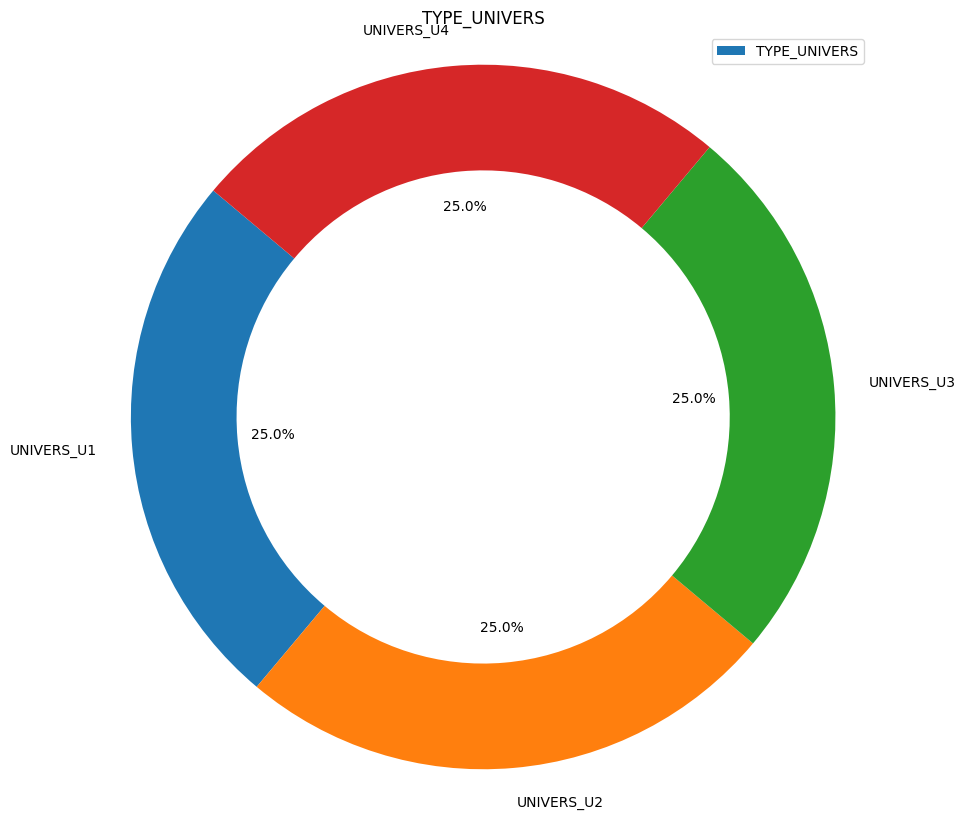

In [48]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

# Définition des variables catégorielles
var_cat = df_cat_clean.select_dtypes(include=['object']).columns.tolist()
print(var_cat)

# Générer un graphique en donut pour chaque variable catégorielle
for var in var_cat:
    values = df_cat_clean[var].value_counts()
    plt.figure(figsize=(10,10))
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
    plt.title(var)
    plt.axis('equal')  # Assure que le donut est rond
    plt.legend([var], loc='upper right')
    plt.show()

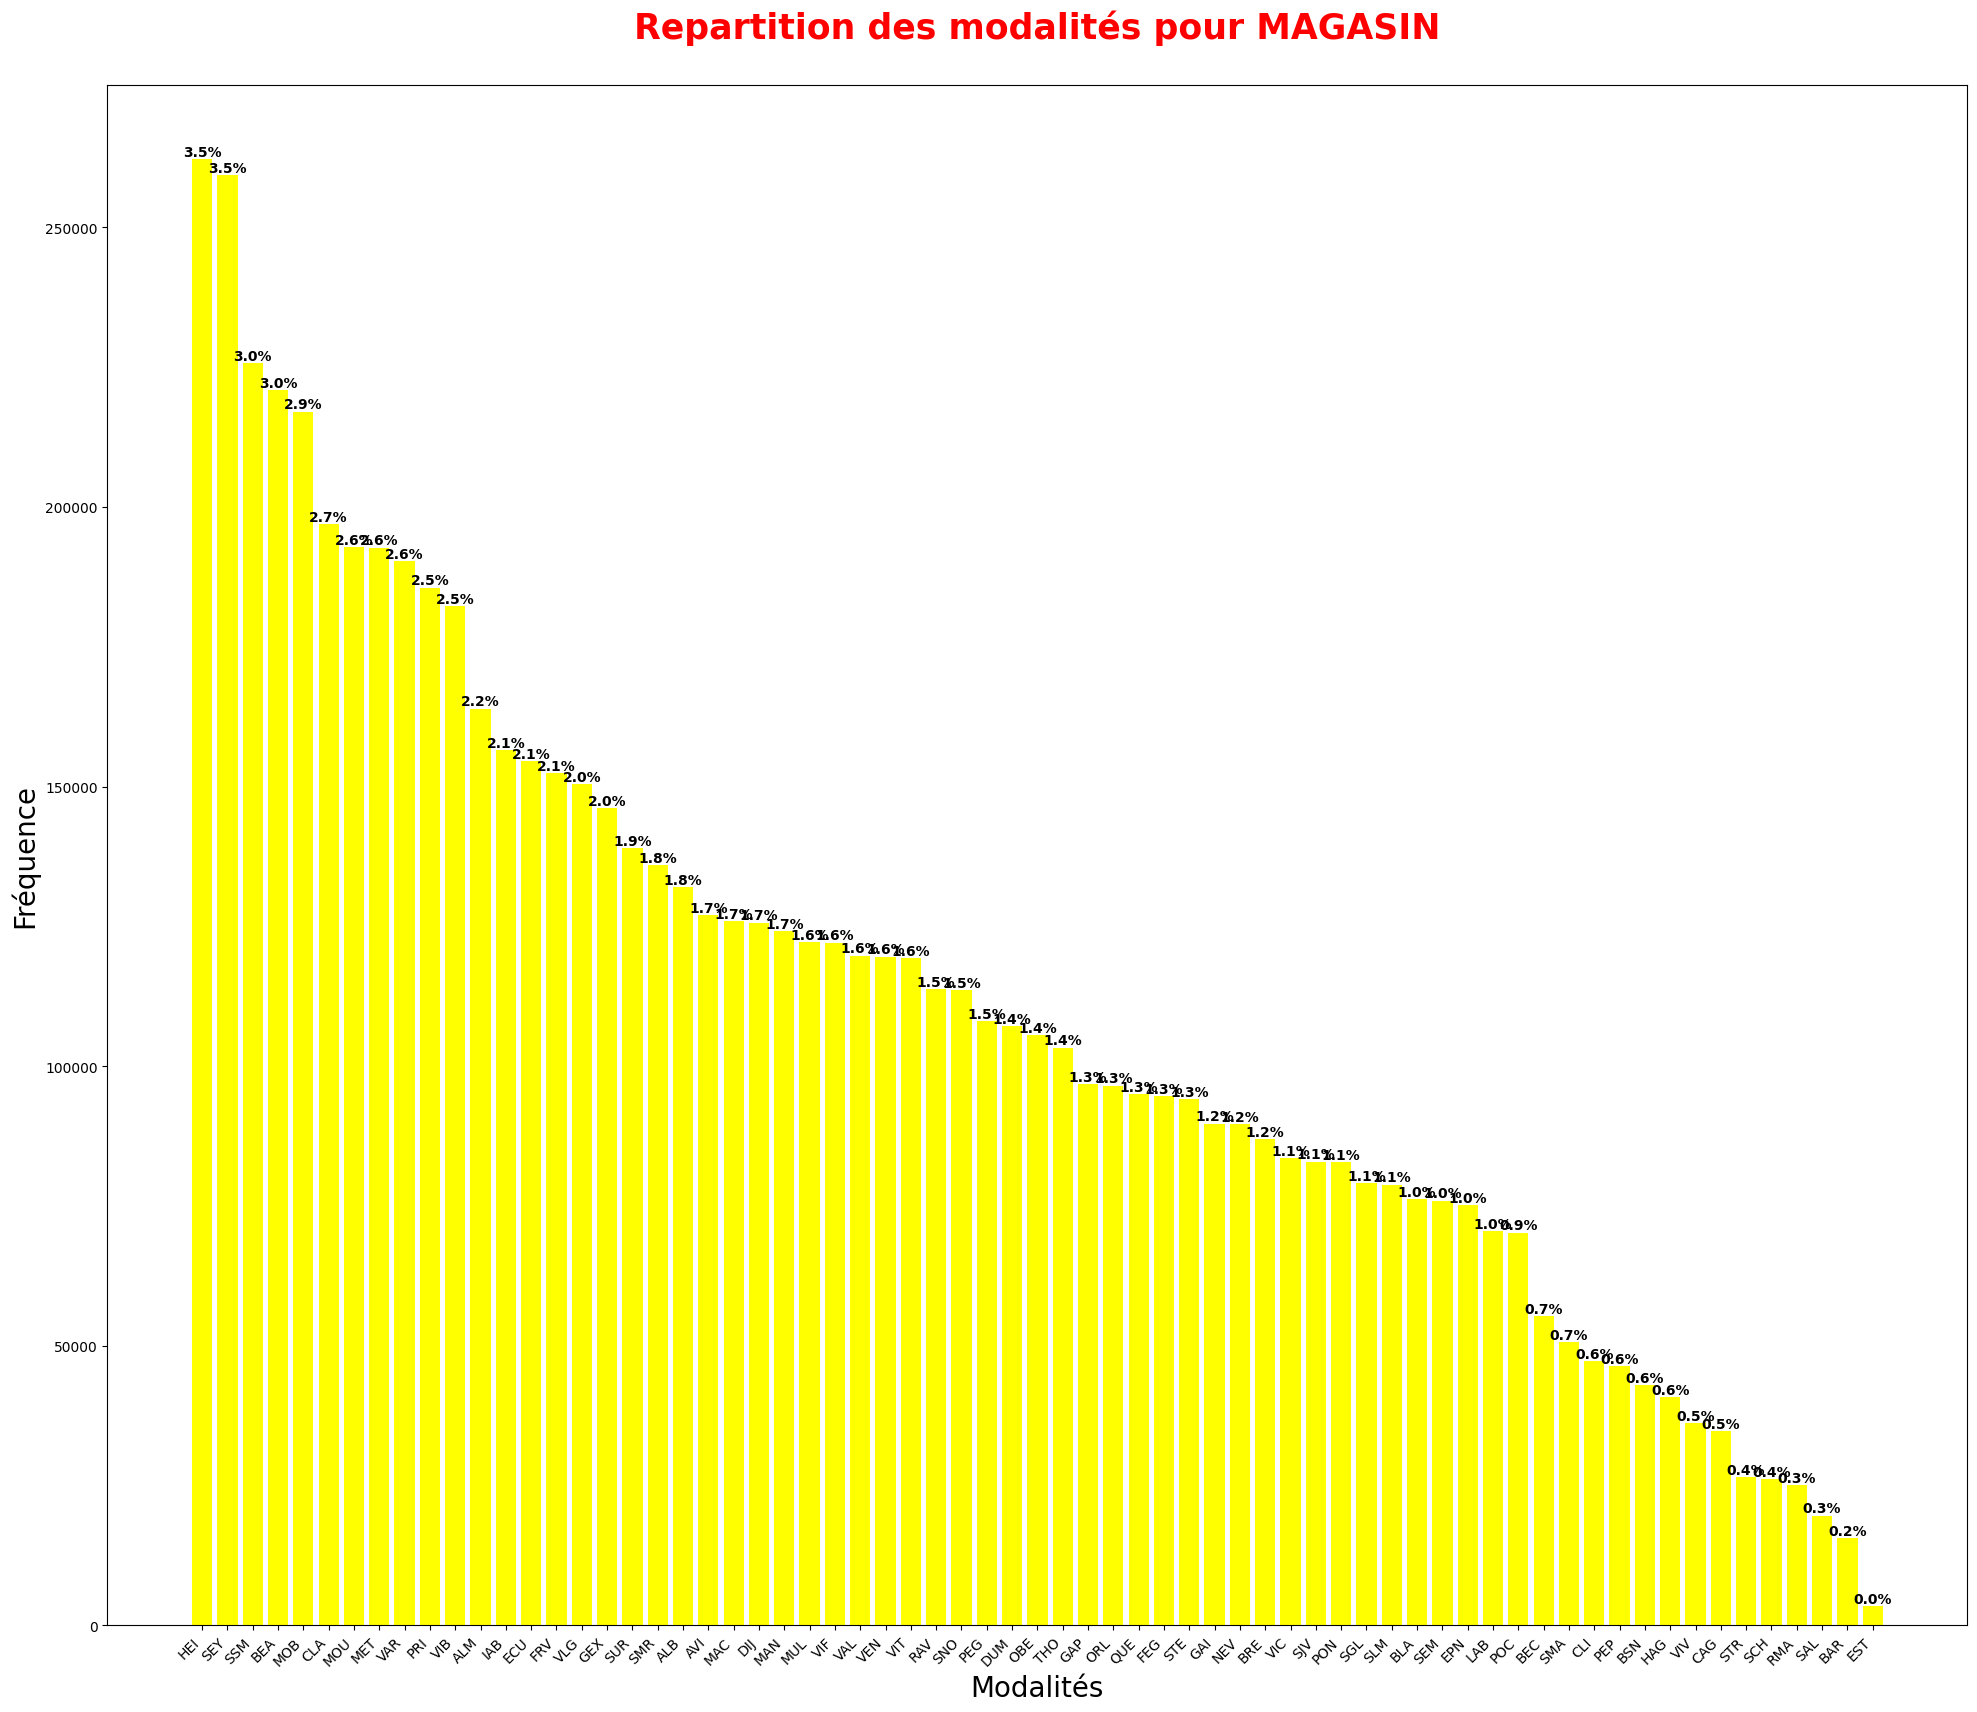

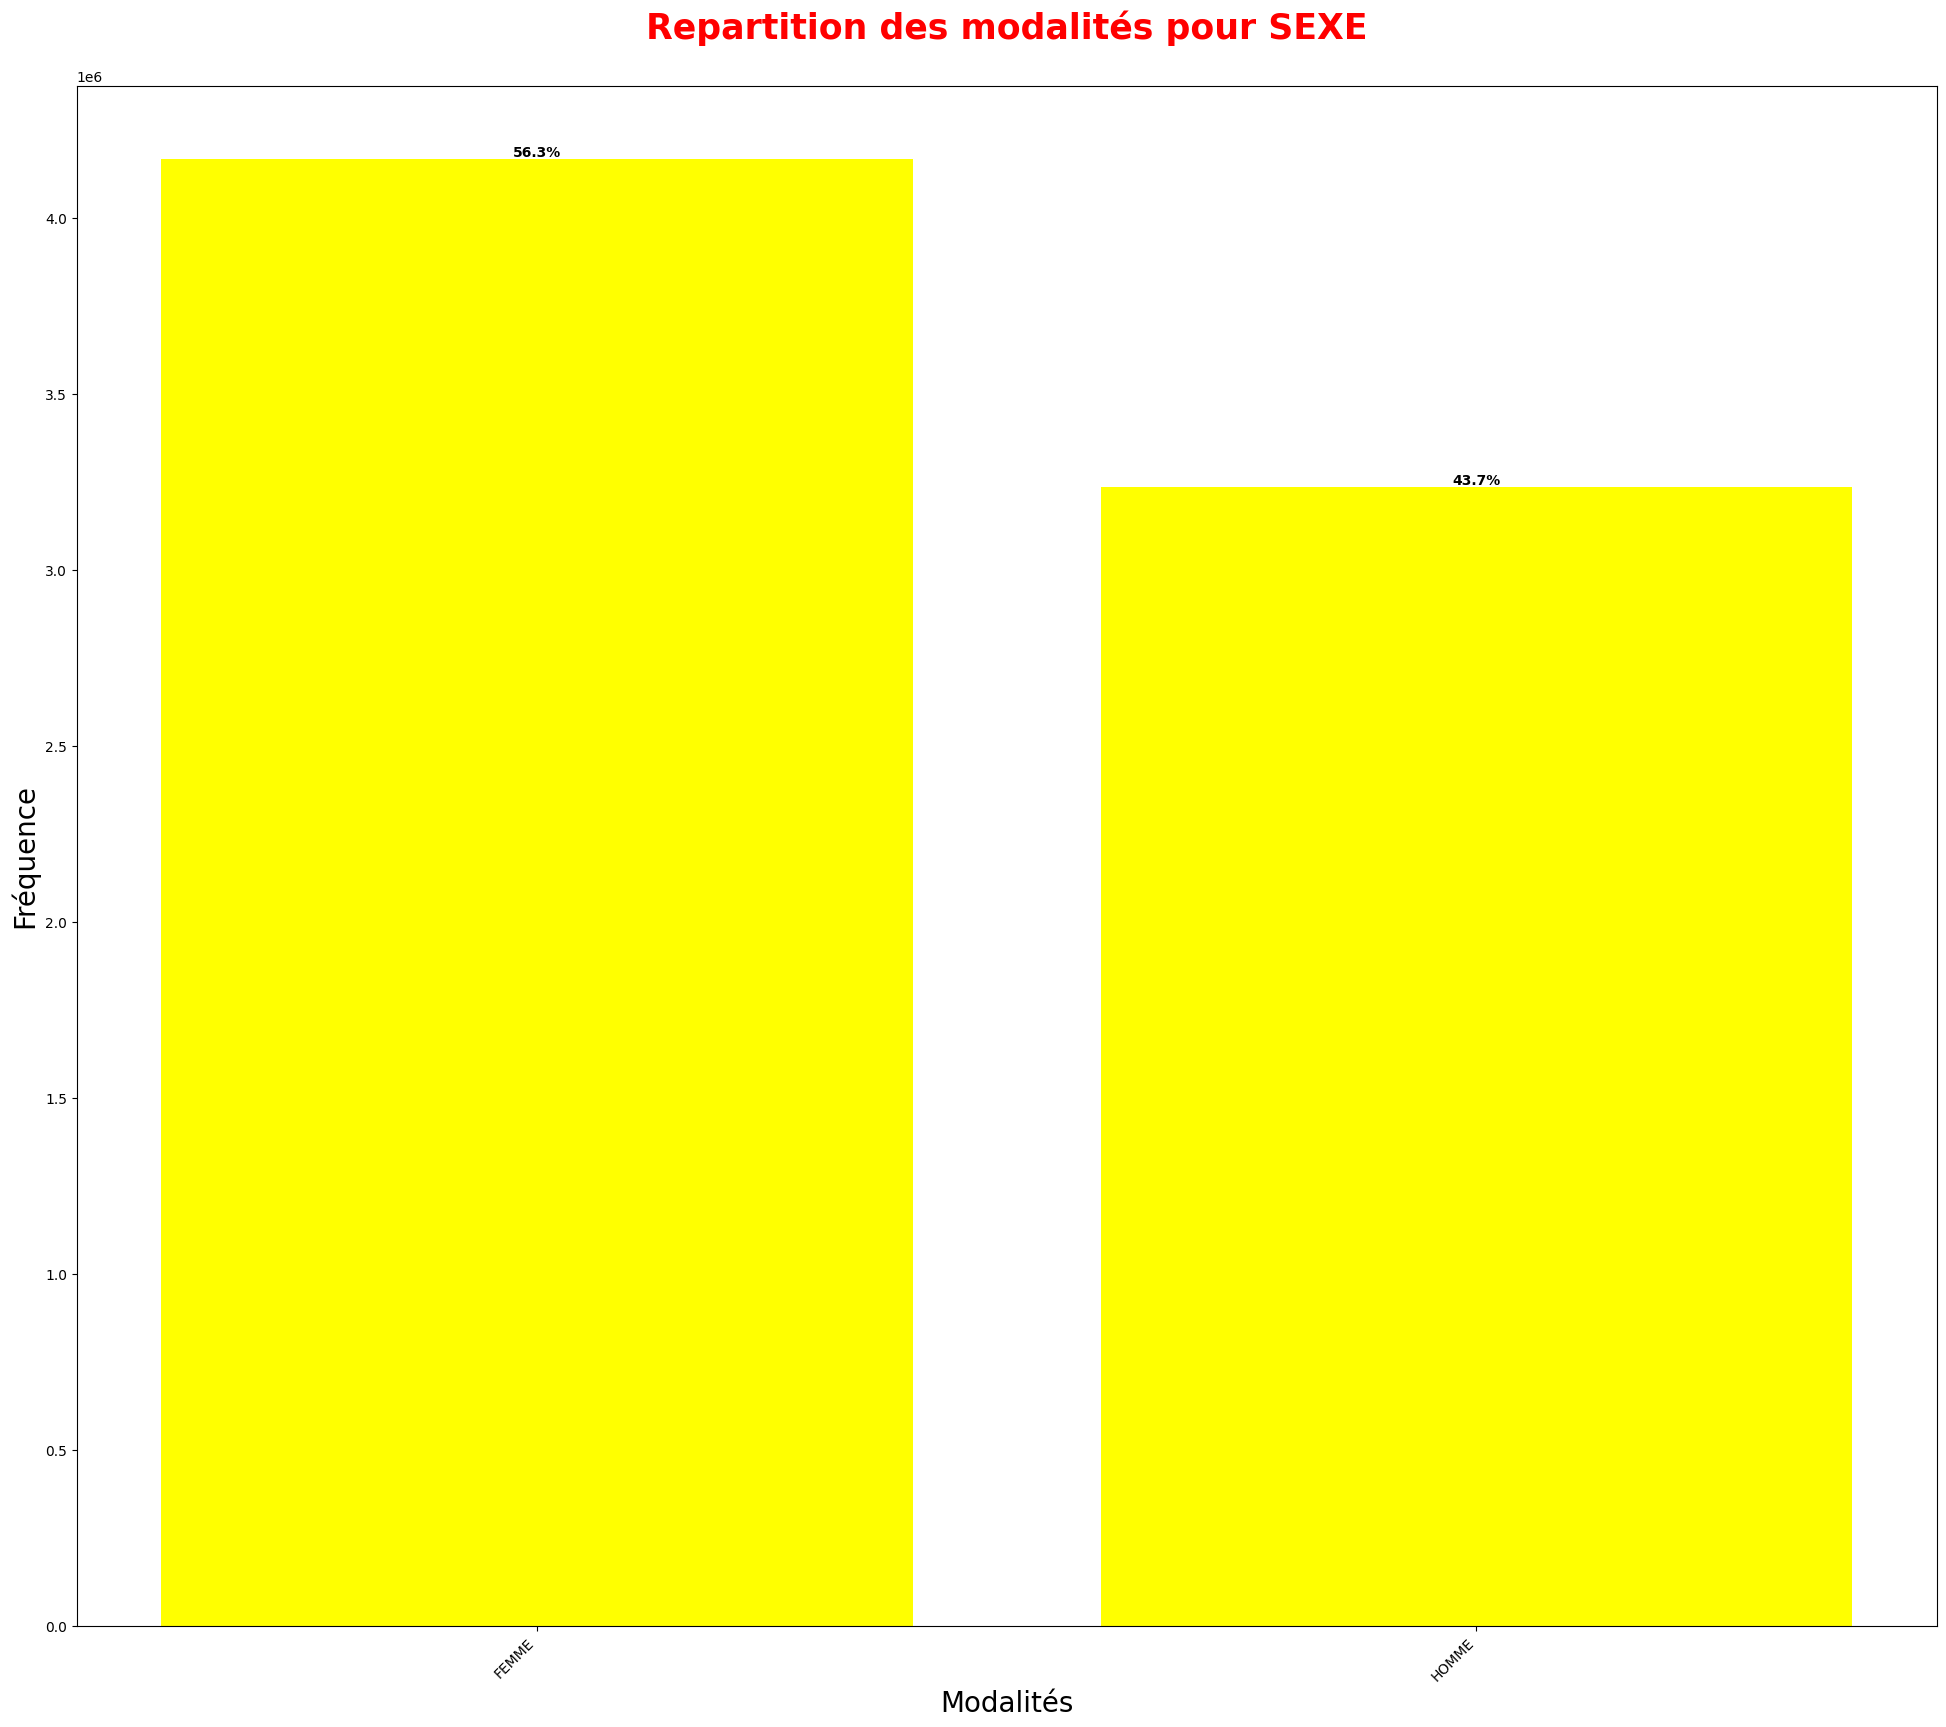

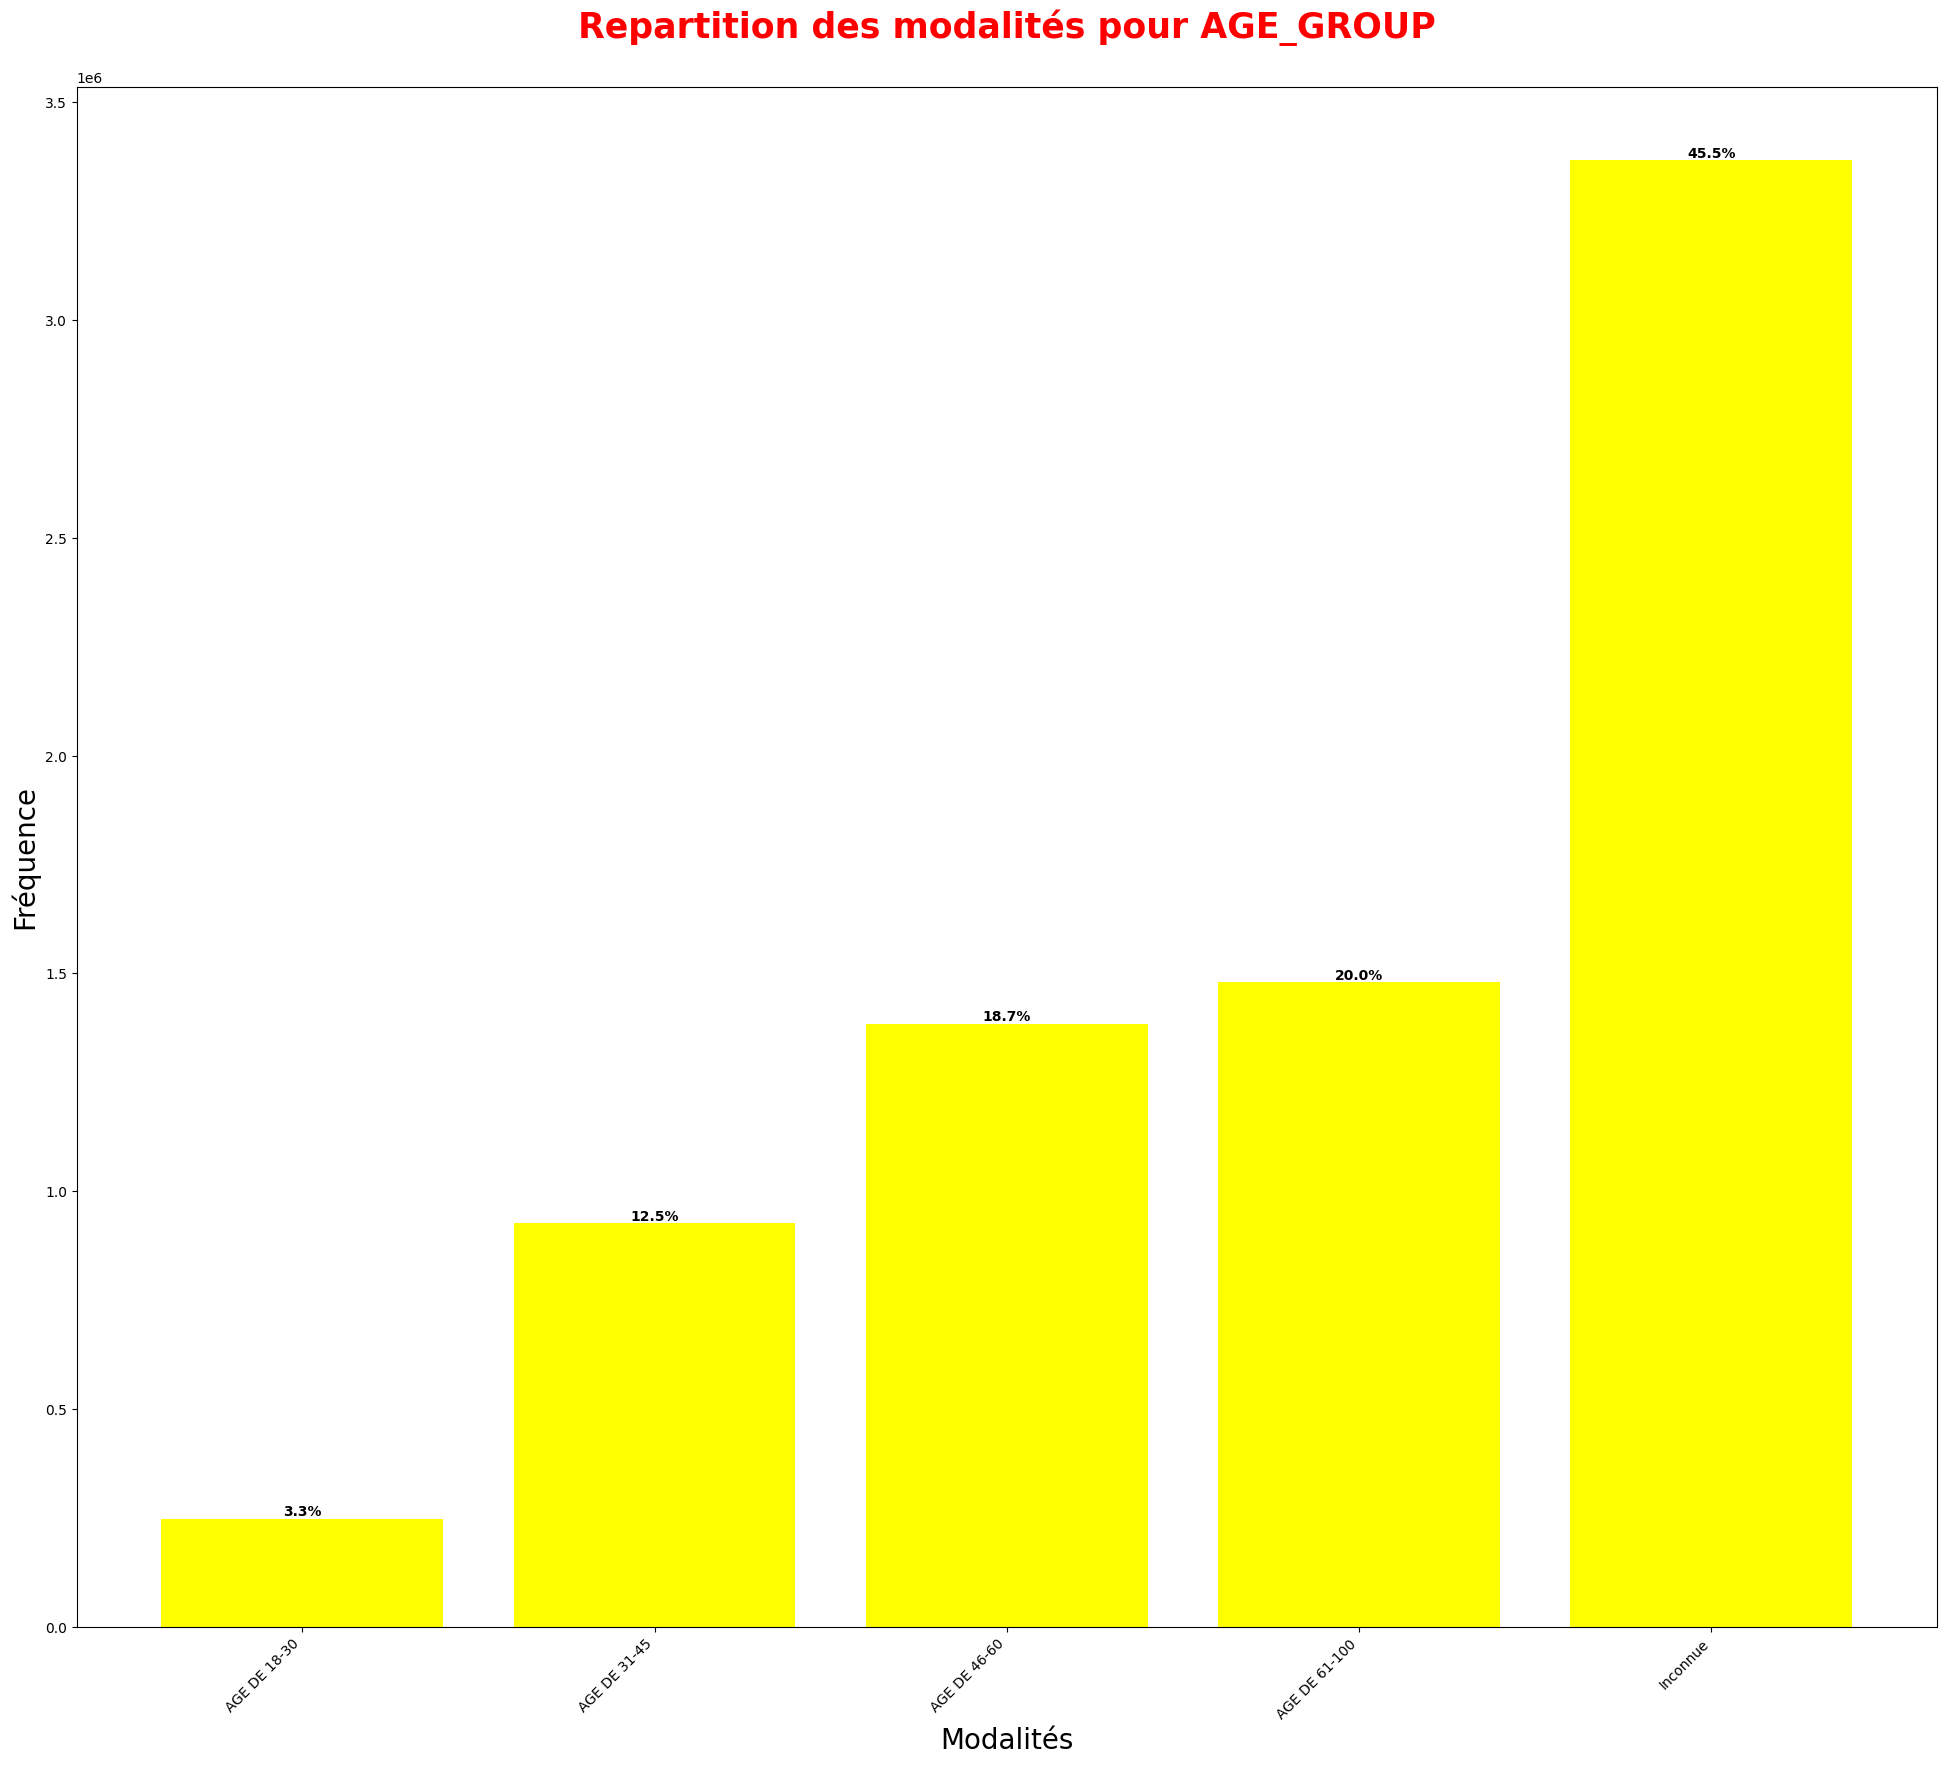

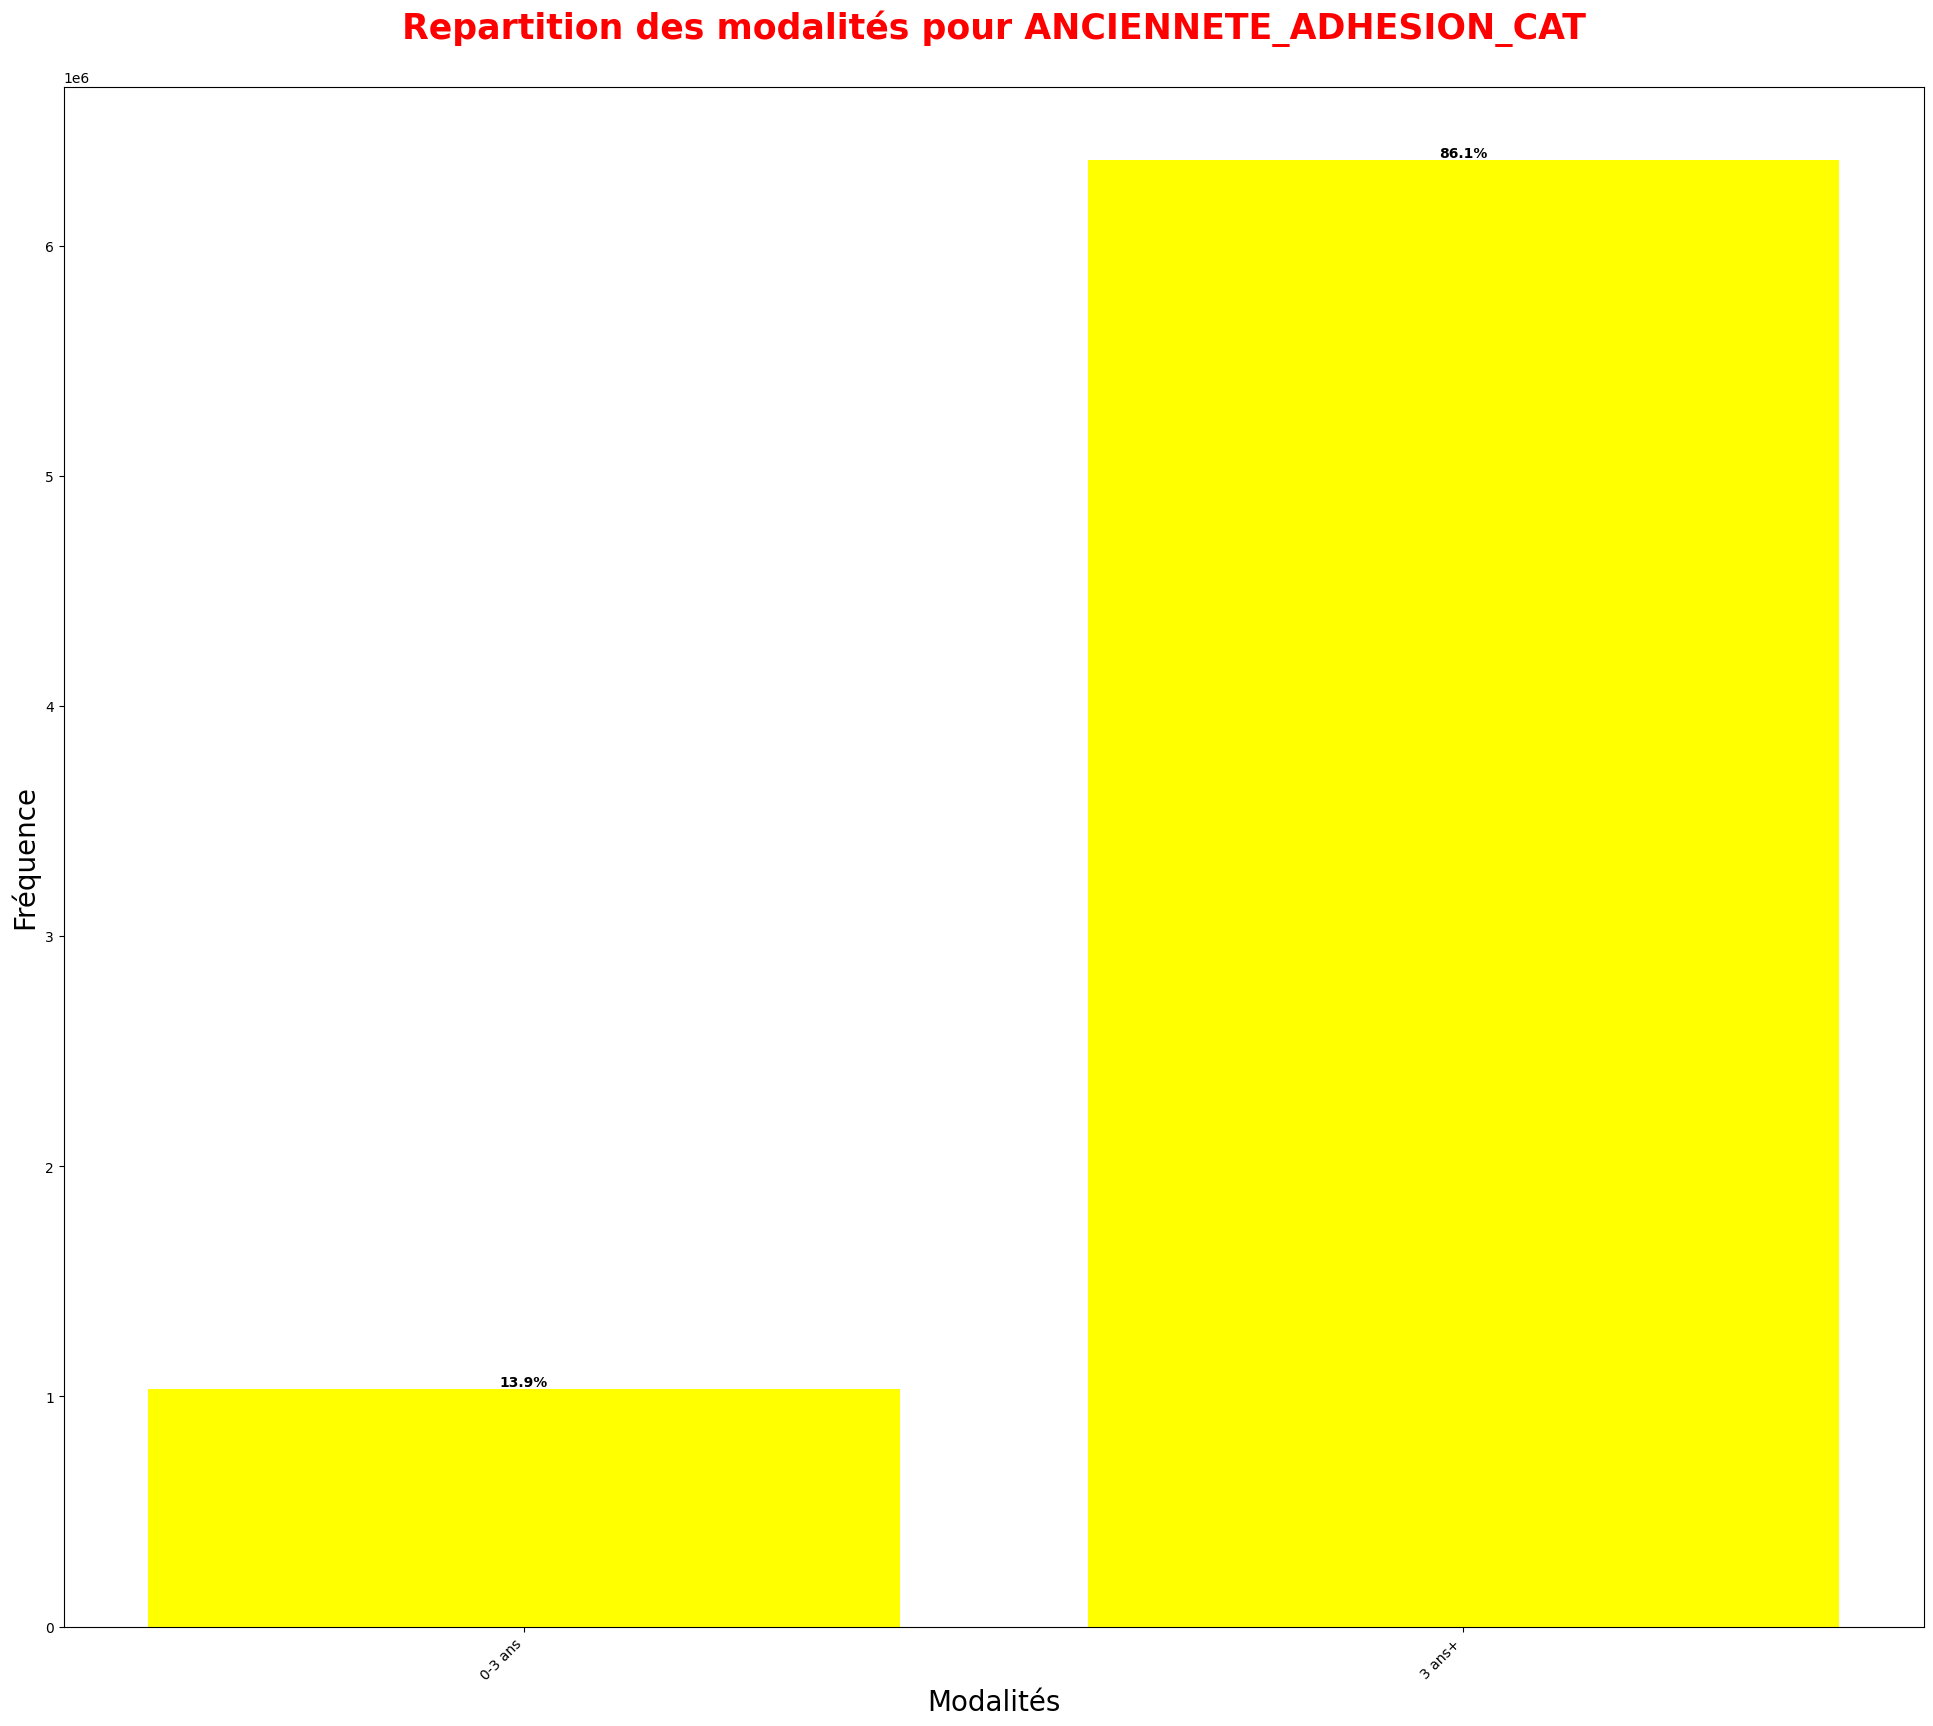

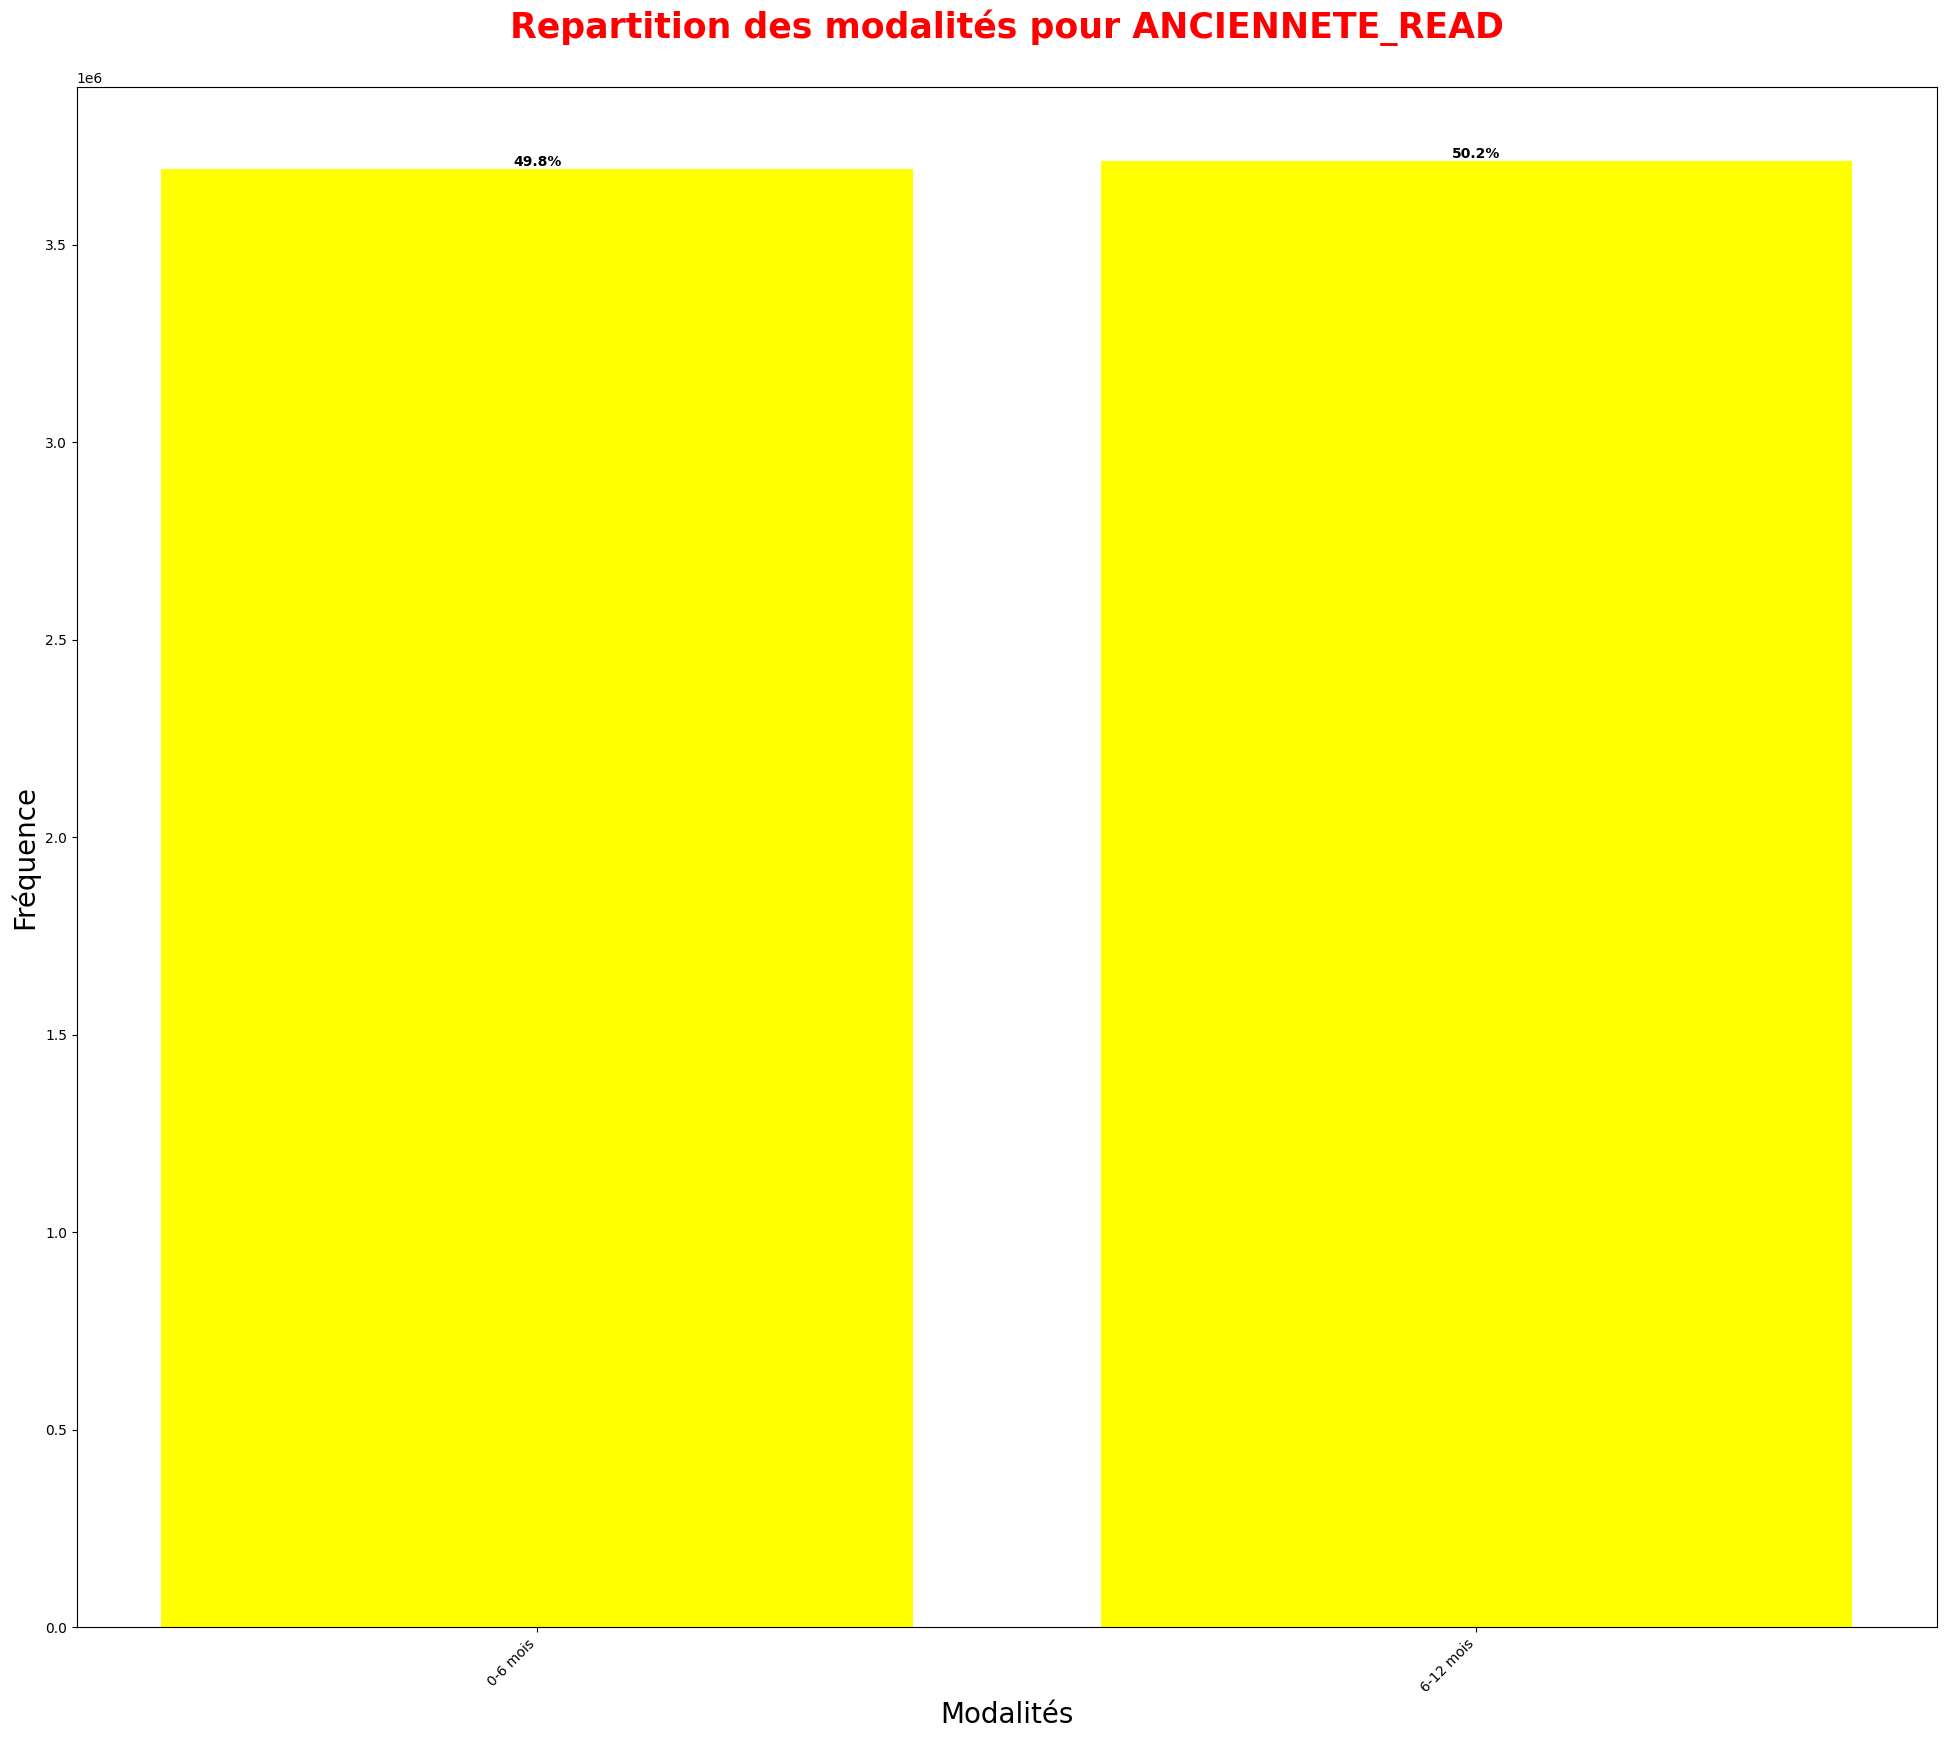

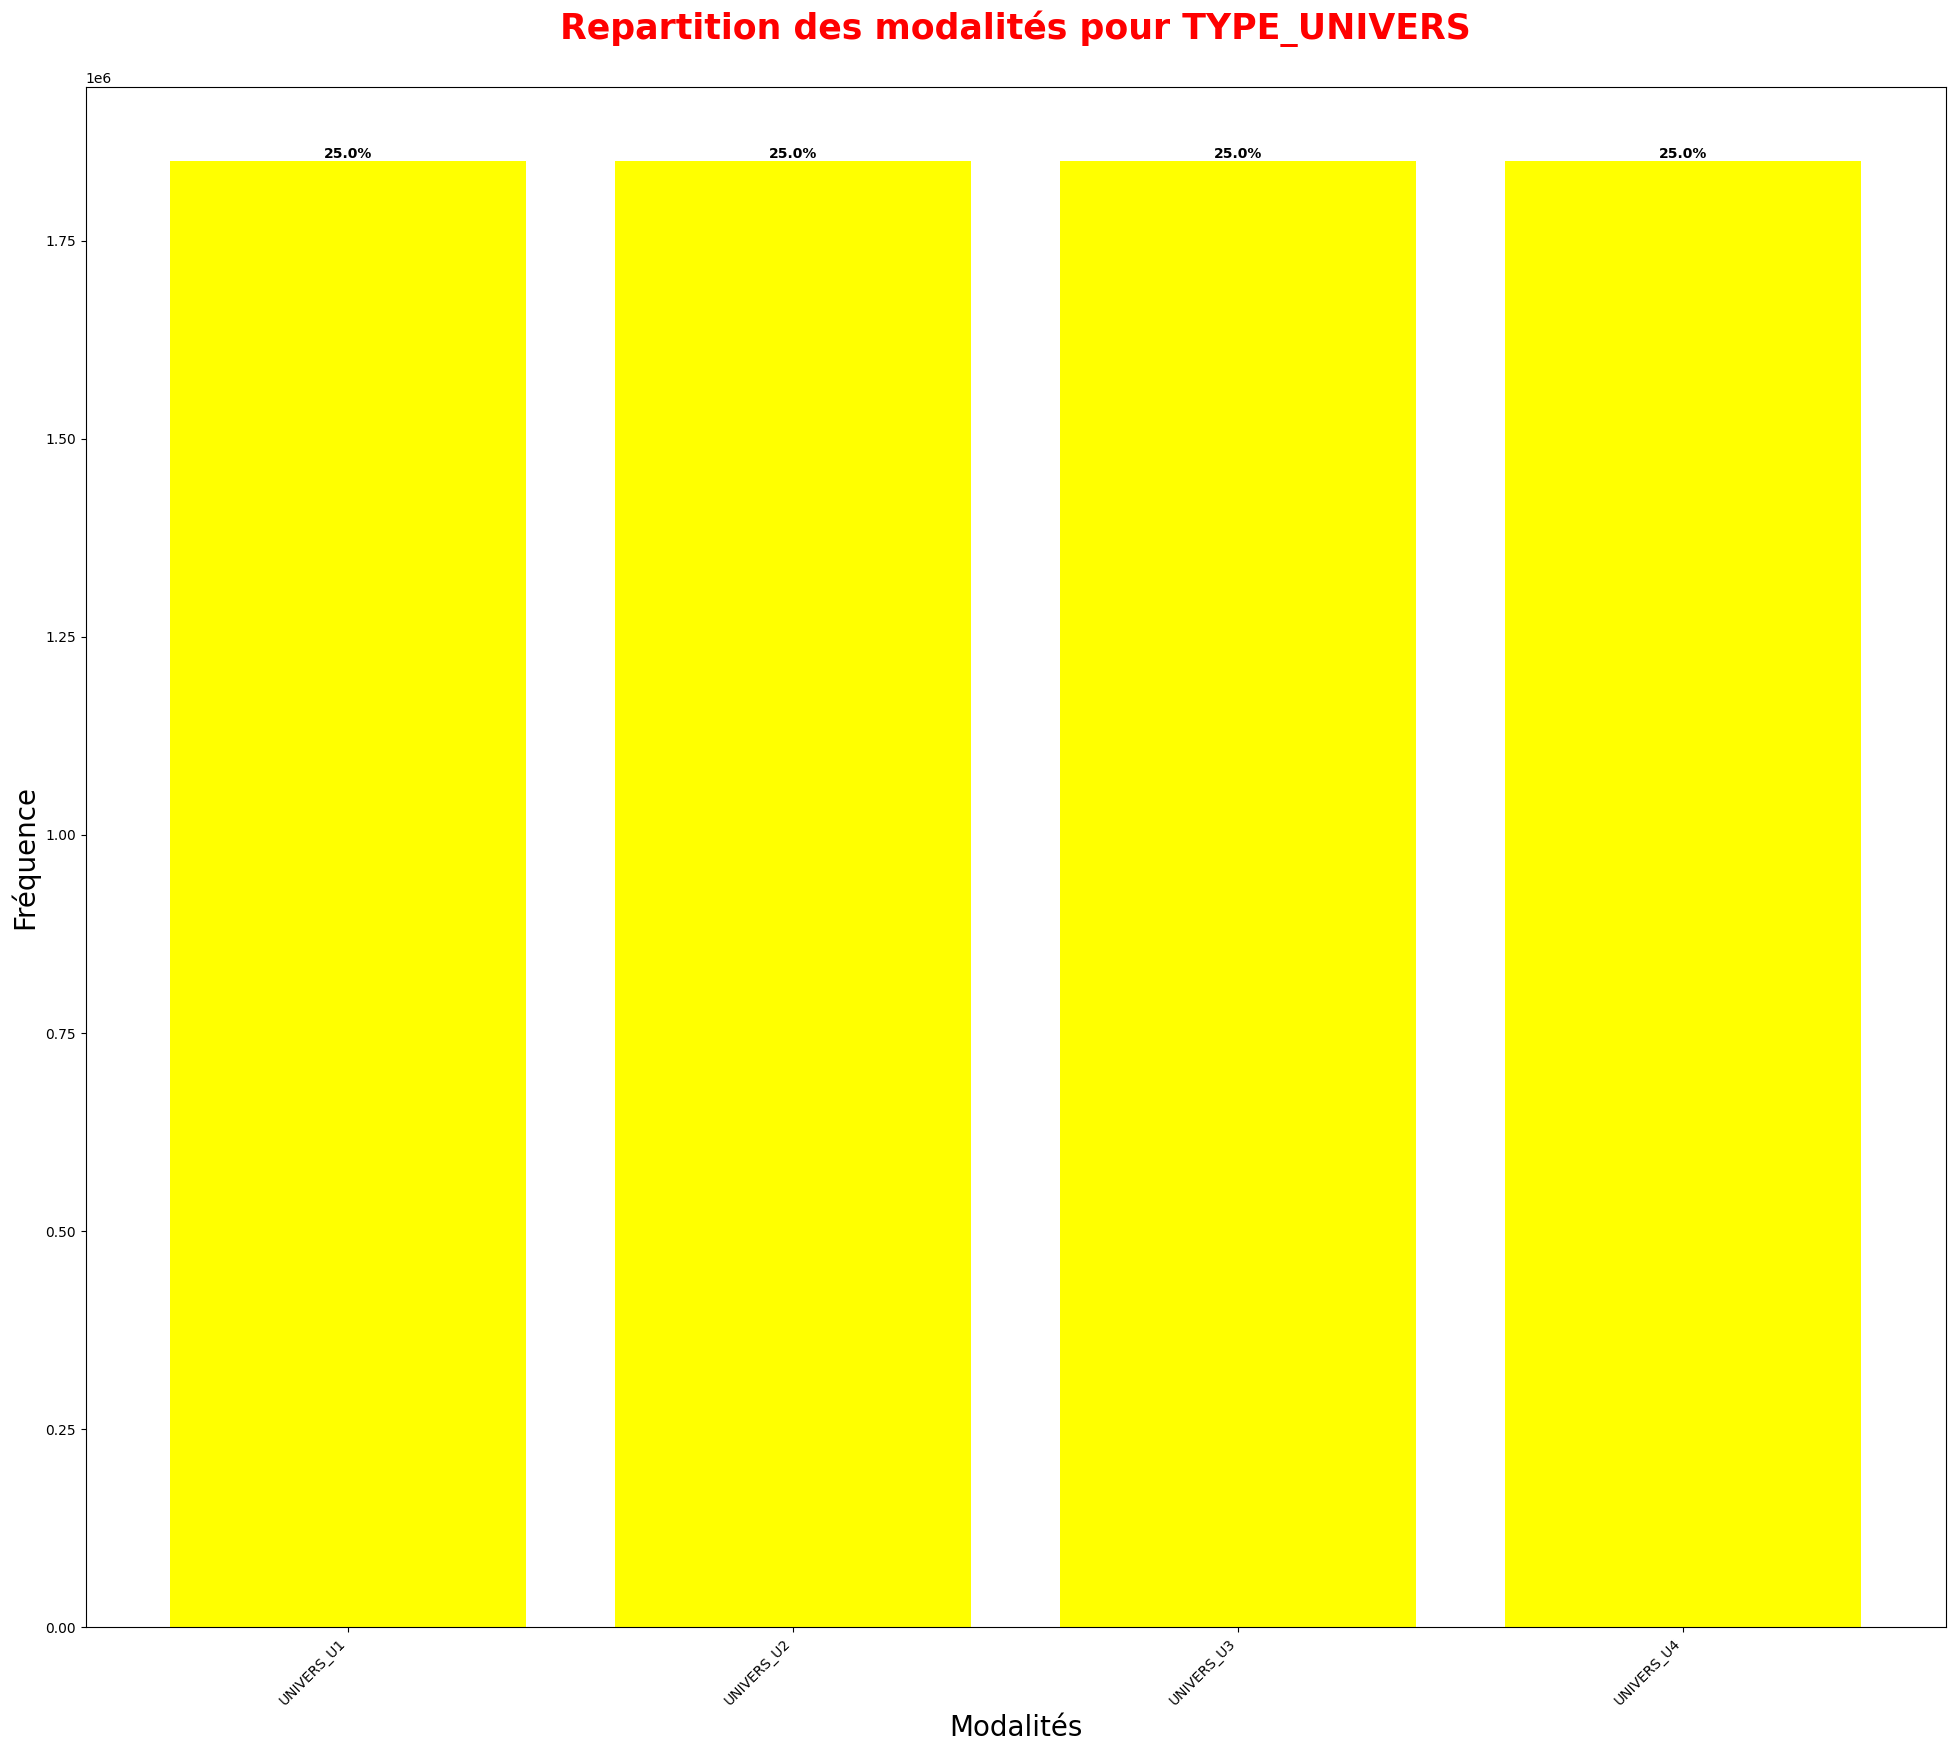

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Définition des variables catégorielles
var_cat = df_cat_clean.select_dtypes(include=['object']).columns.tolist()

# Nom des variables catégorielles nécessitant un tri spécifique

ordre_specifique = {
    'AGE_GROUP': ['AGE DE 18-30','AGE DE 31-45','AGE DE 46-60','AGE DE 61-100','Inconnue'],
    'ANCIENNETE_ADHESION_CAT': ['0-3 ans','3 ans+'],
     'ANCIENNETE_READ':['0-6 mois','6-12 mois']
}

# Générer un bar plot pour chaque variable catégorielle
for var in var_cat:
    value_counts = df_cat_clean[var].value_counts()
    
    # Trier les catégories si nécessaire
    if var in ordre_specifique:
        categories = ordre_specifique[var]
        value_counts = value_counts.reindex(categories)
    
    # Calcul des pourcentages
    percentages = (value_counts / len(df_cat_clean)) * 100
    
    plt.figure(figsize=(24, 20))
    bars = plt.bar(value_counts.index, value_counts, color='yellow')
    
    # Ajouter les pourcentages au-dessus des barres
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.1f}%', 
                 ha='center', va='bottom', fontweight='bold')
    
    plt.title(f"Repartition des modalités pour {var}\n", fontsize=25, color='red', fontweight='bold')
    plt.xlabel('Modalités', fontsize=20)
    plt.ylabel('Fréquence', fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.show()

ANALYSE UNIVARIÉE DES VARIABLES QUANTITATIVES

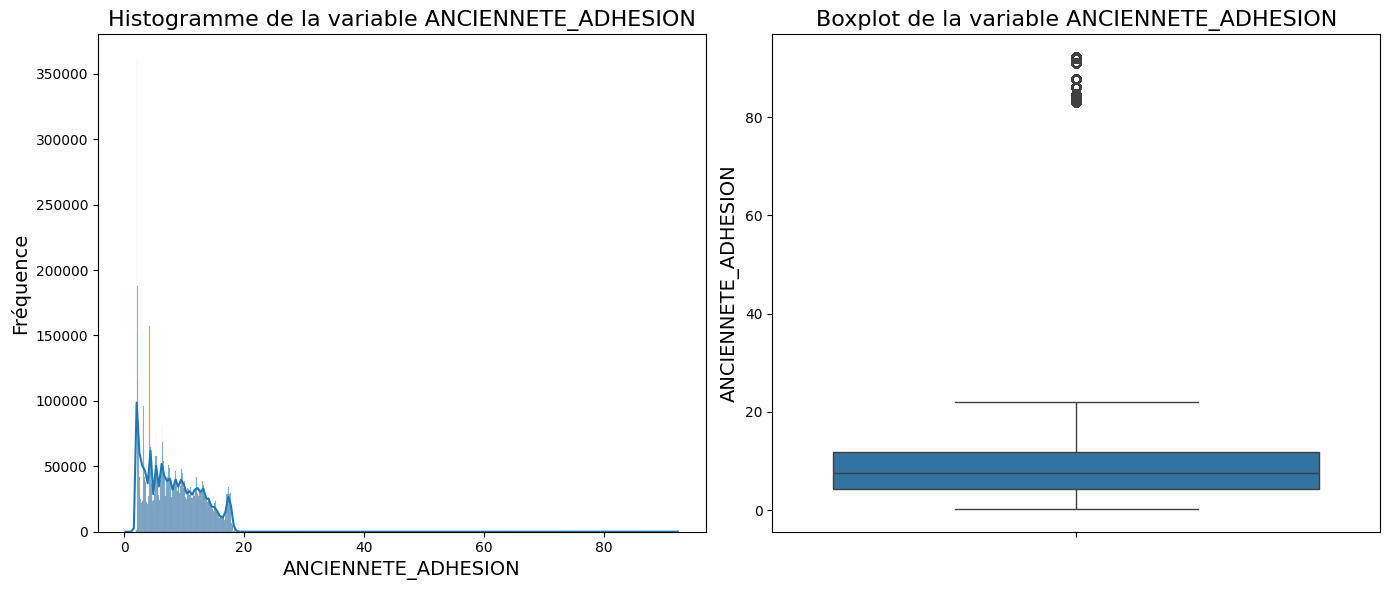


Statistiques descriptives de la variable ANCIENNETE_ADHESION :
count    7.404788e+06
mean     8.213792e+00
std      4.681773e+00
min      2.217659e-01
25%      4.229979e+00
50%      7.537303e+00
75%      1.177276e+01
max      9.227652e+01
Name: ANCIENNETE_ADHESION, dtype: float64

--------------------------------------------------



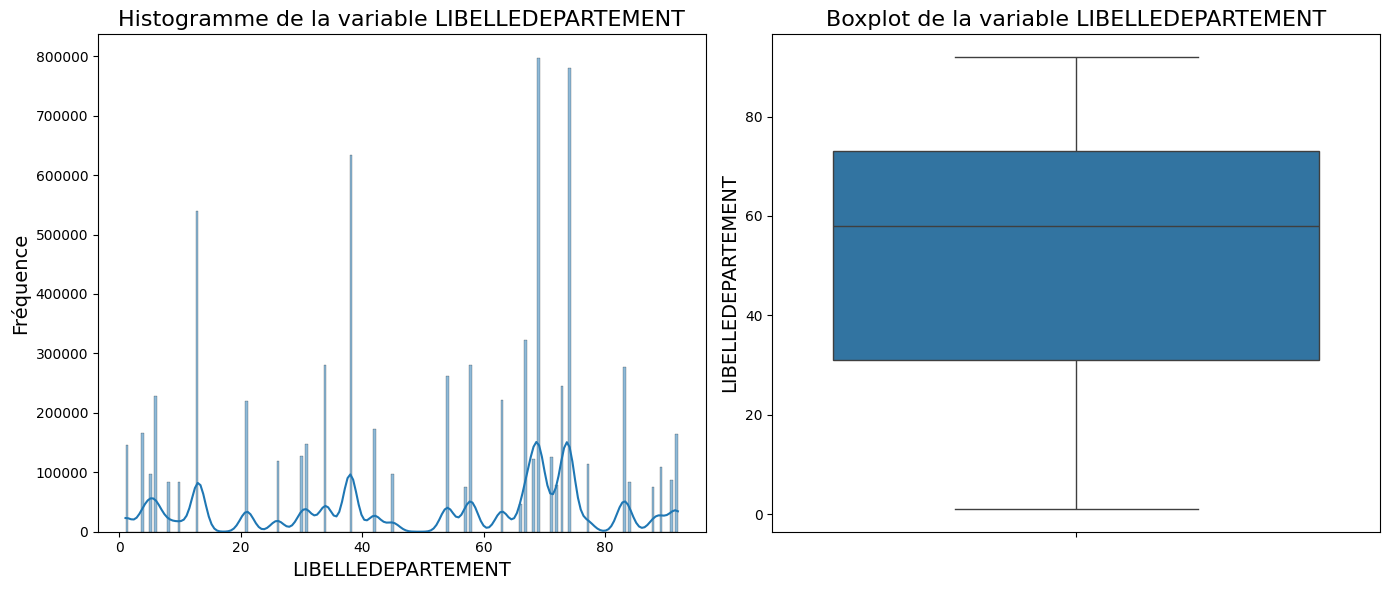


Statistiques descriptives de la variable LIBELLEDEPARTEMENT :
count    7.404788e+06
mean     5.094787e+01
std      2.660973e+01
min      1.000000e+00
25%      3.100000e+01
50%      5.800000e+01
75%      7.300000e+01
max      9.200000e+01
Name: LIBELLEDEPARTEMENT, dtype: float64

--------------------------------------------------



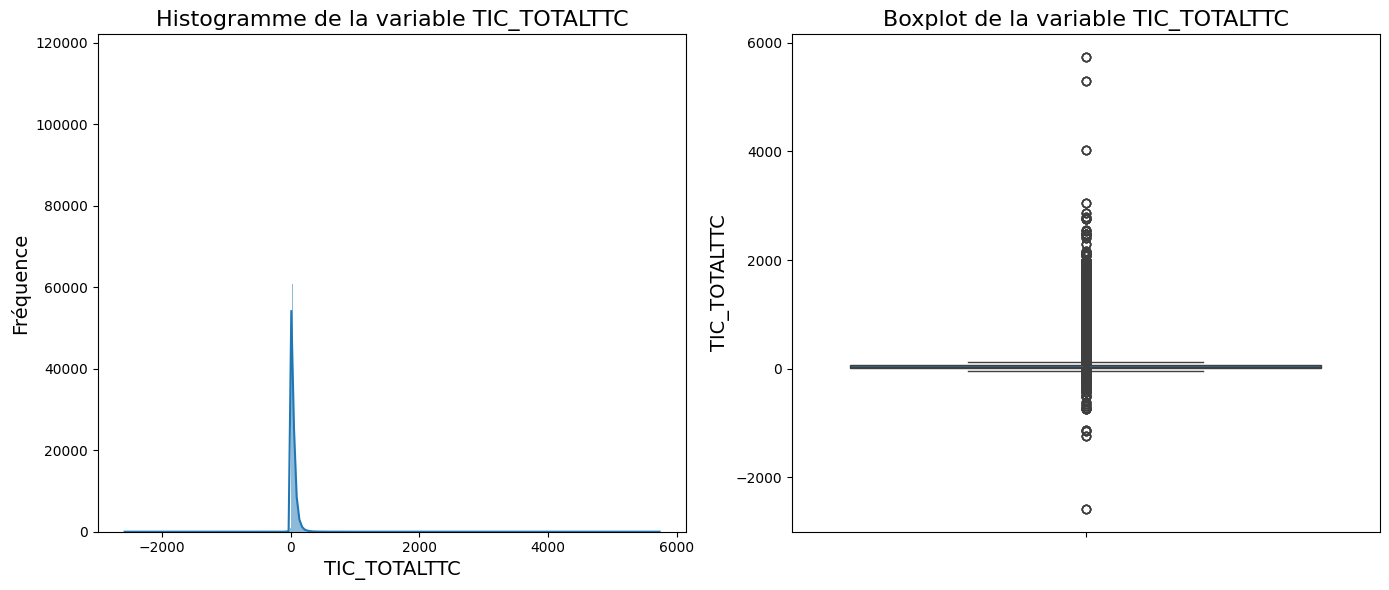


Statistiques descriptives de la variable TIC_TOTALTTC :
count    7.404788e+06
mean     4.722531e+01
std      5.132880e+01
min     -2.582000e+03
25%      1.790000e+01
50%      3.329000e+01
75%      6.095000e+01
max      5.736300e+03
Name: TIC_TOTALTTC, dtype: float64

--------------------------------------------------



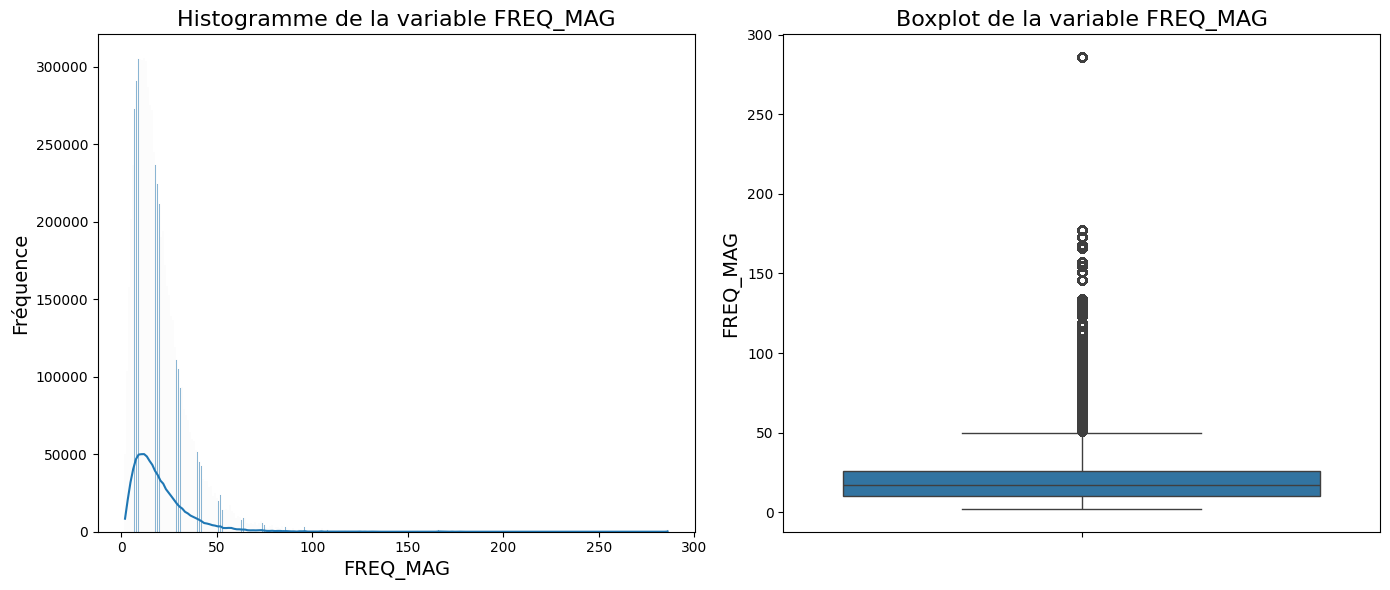


Statistiques descriptives de la variable FREQ_MAG :
count    7.404788e+06
mean     2.048546e+01
std      1.559172e+01
min      2.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.600000e+01
max      2.860000e+02
Name: FREQ_MAG, dtype: float64

--------------------------------------------------



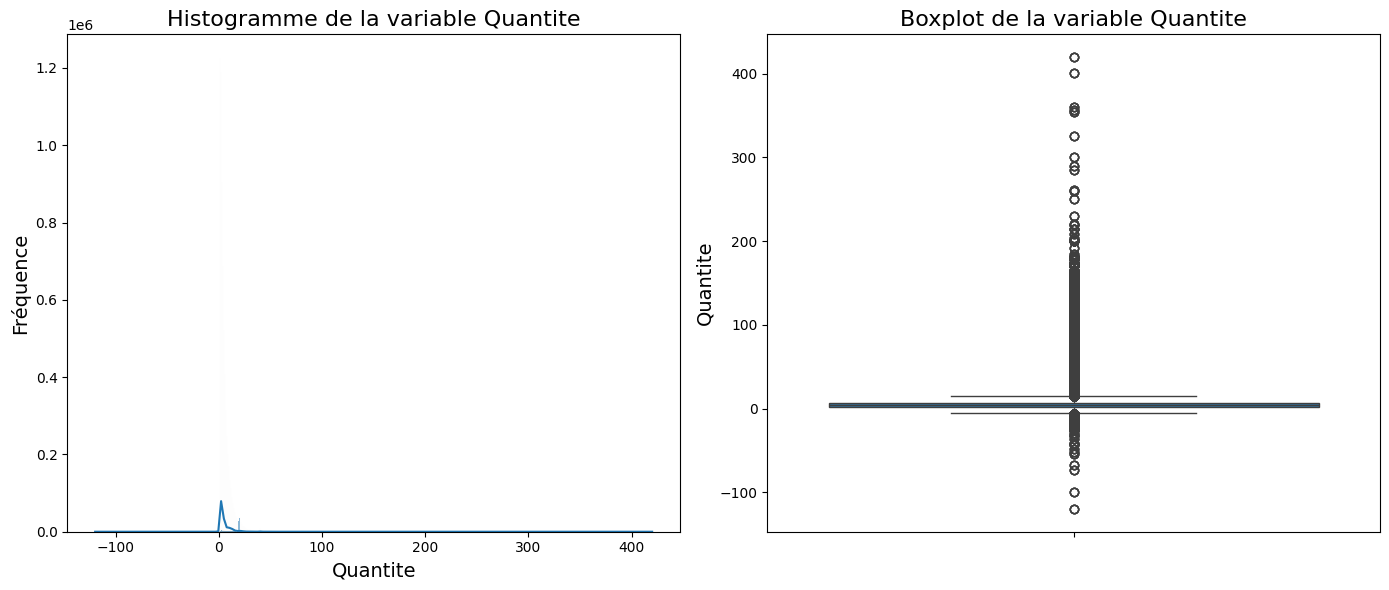


Statistiques descriptives de la variable Quantite :
count    7.404788e+06
mean     5.869322e+00
std      7.084412e+00
min     -1.200000e+02
25%      2.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      4.200000e+02
Name: Quantite, dtype: float64

--------------------------------------------------



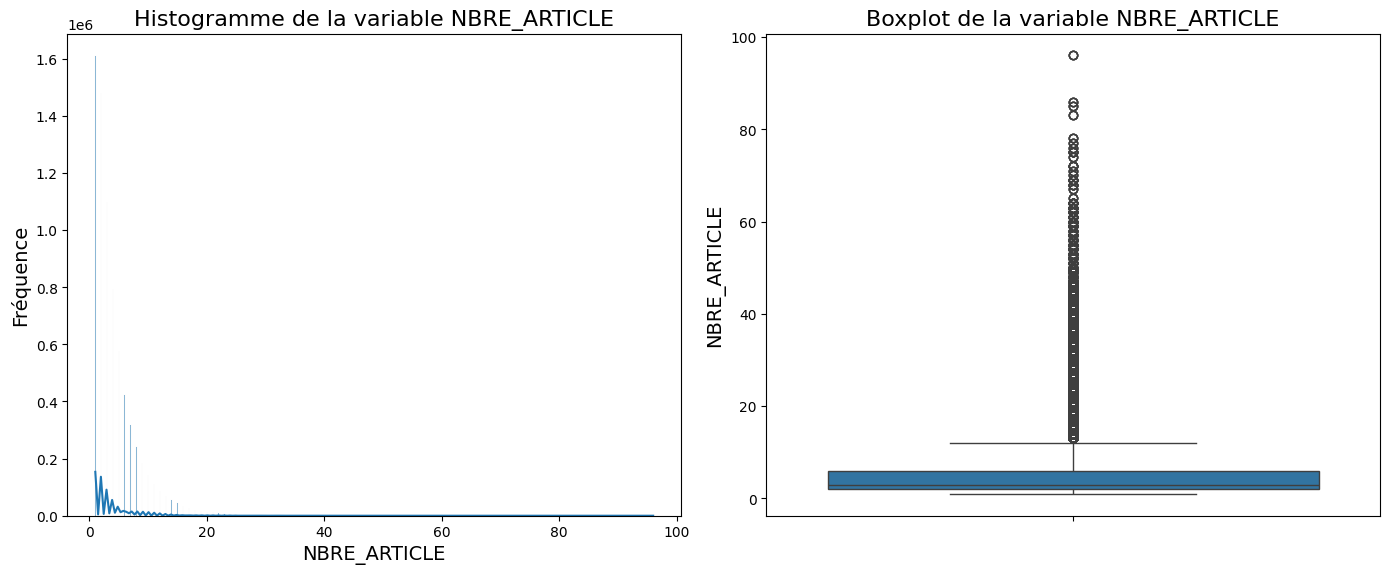


Statistiques descriptives de la variable NBRE_ARTICLE :
count    7.404788e+06
mean     4.312533e+00
std      4.052791e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      9.600000e+01
Name: NBRE_ARTICLE, dtype: float64

--------------------------------------------------



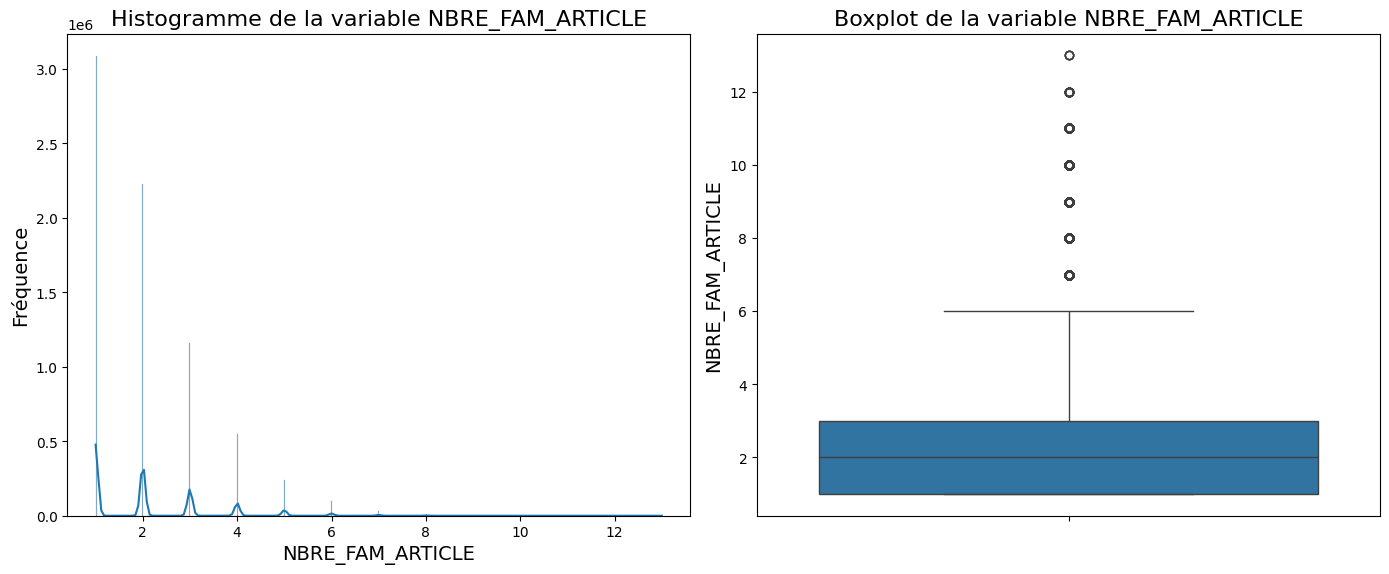


Statistiques descriptives de la variable NBRE_FAM_ARTICLE :
count    7.404788e+06
mean     2.074375e+00
std      1.249945e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.300000e+01
Name: NBRE_FAM_ARTICLE, dtype: float64

--------------------------------------------------



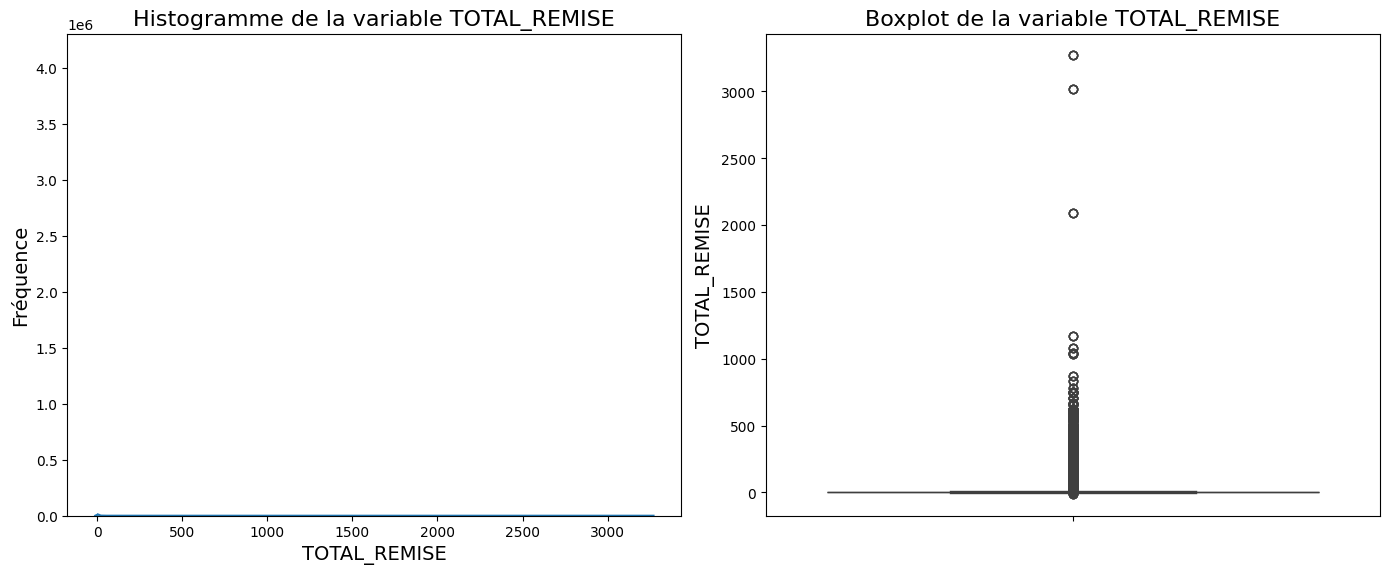


Statistiques descriptives de la variable TOTAL_REMISE :
count    7.404788e+06
mean     4.235905e+00
std      1.140198e+01
min     -1.065800e+01
25%      0.000000e+00
50%      0.000000e+00
75%      5.033000e+00
max      3.268909e+03
Name: TOTAL_REMISE, dtype: float64

--------------------------------------------------



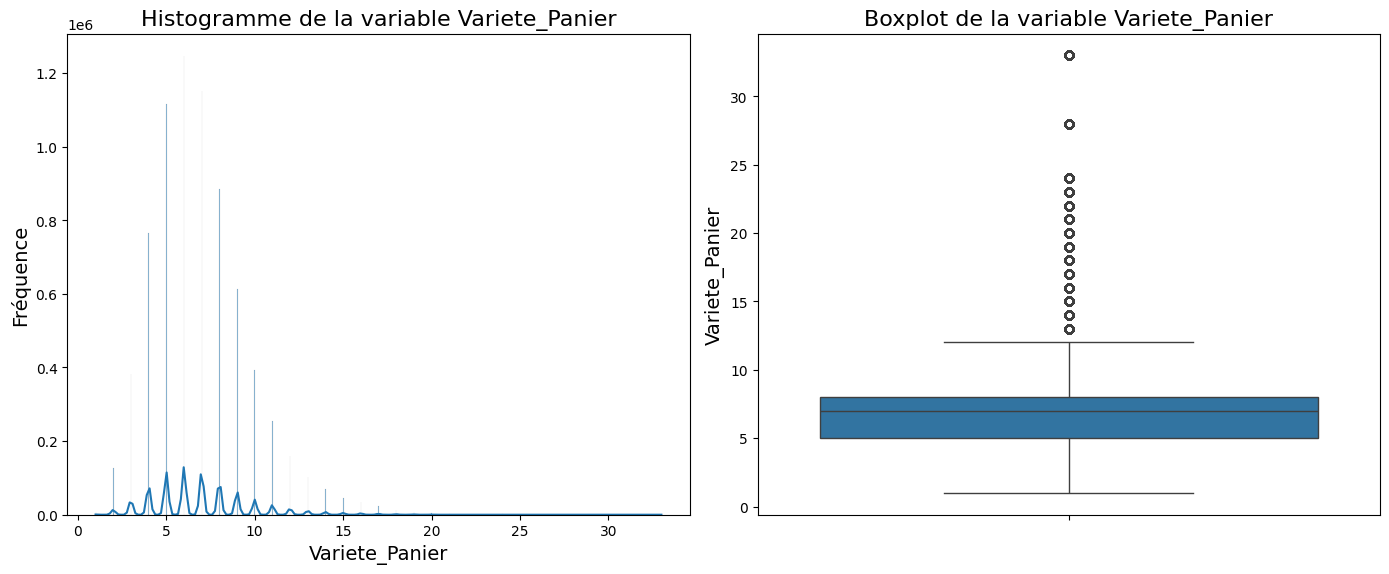


Statistiques descriptives de la variable Variete_Panier :
count    7.404788e+06
mean     6.937212e+00
std      2.780692e+00
min      1.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      8.000000e+00
max      3.300000e+01
Name: Variete_Panier, dtype: float64

--------------------------------------------------



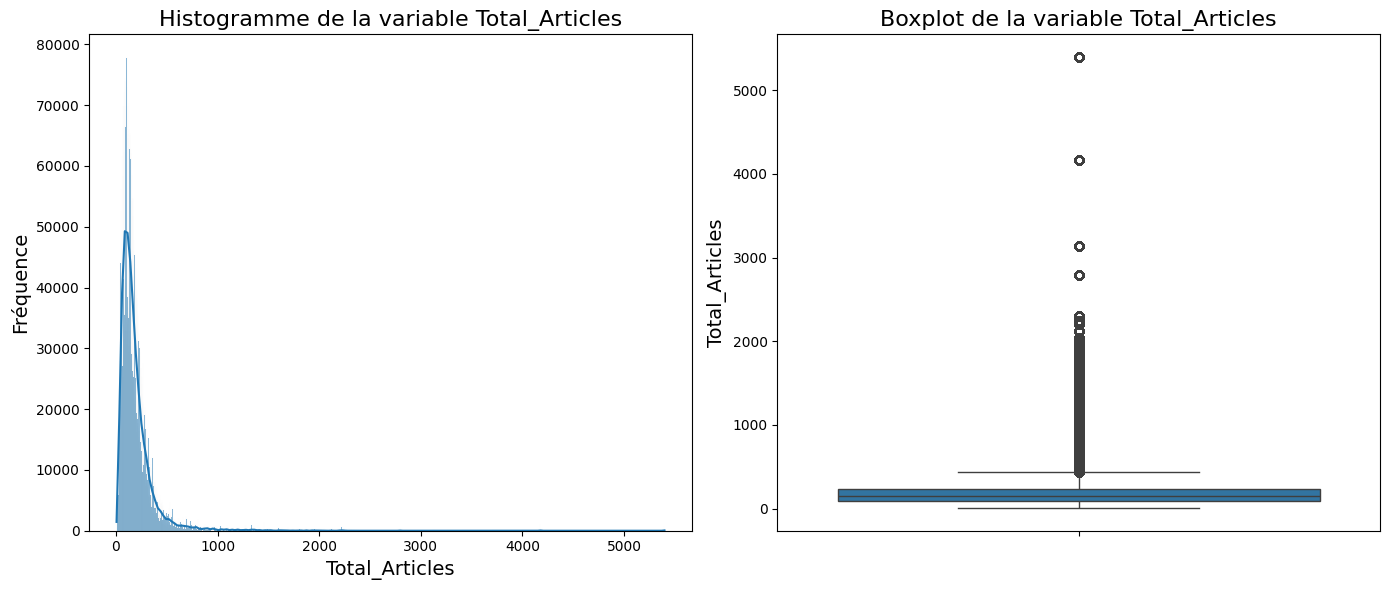


Statistiques descriptives de la variable Total_Articles :
count    7.404788e+06
mean     1.925426e+02
std      1.904194e+02
min      6.000000e+00
25%      9.400000e+01
50%      1.470000e+02
75%      2.300000e+02
max      5.397000e+03
Name: Total_Articles, dtype: float64

--------------------------------------------------



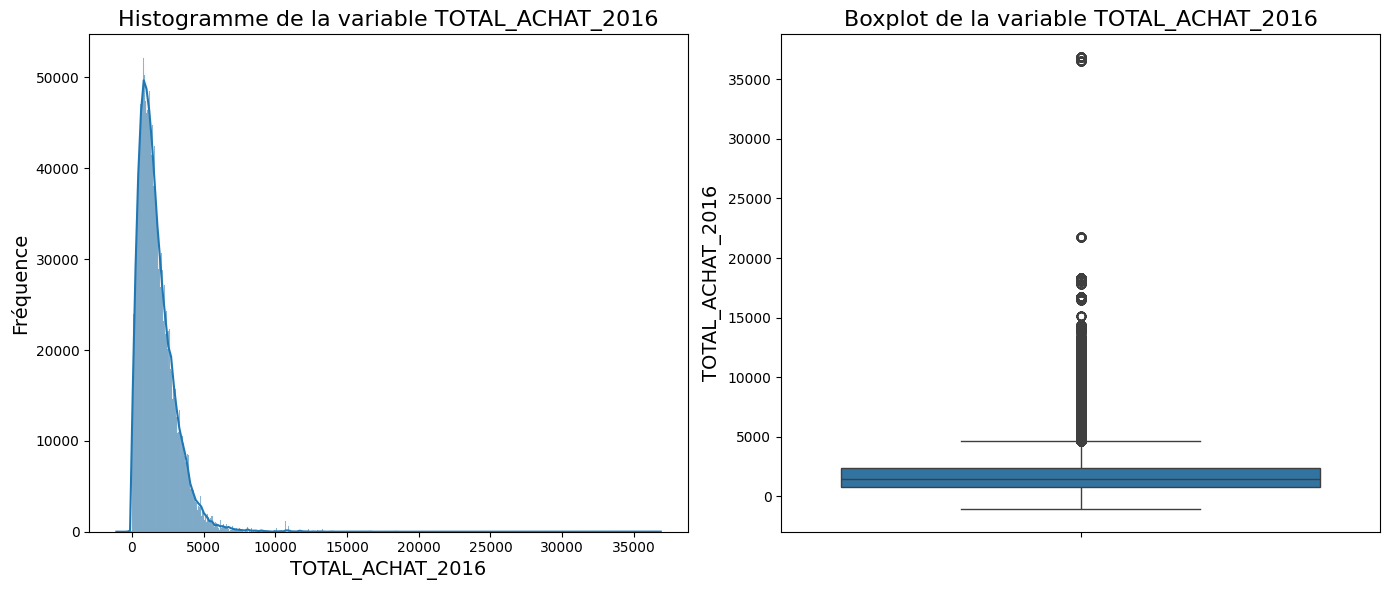


Statistiques descriptives de la variable TOTAL_ACHAT_2016 :
count    7.404788e+06
mean     1.729220e+03
std      1.301478e+03
min     -1.079800e+03
25%      8.184000e+02
50%      1.433840e+03
75%      2.342520e+03
max      3.688064e+04
Name: TOTAL_ACHAT_2016, dtype: float64

--------------------------------------------------



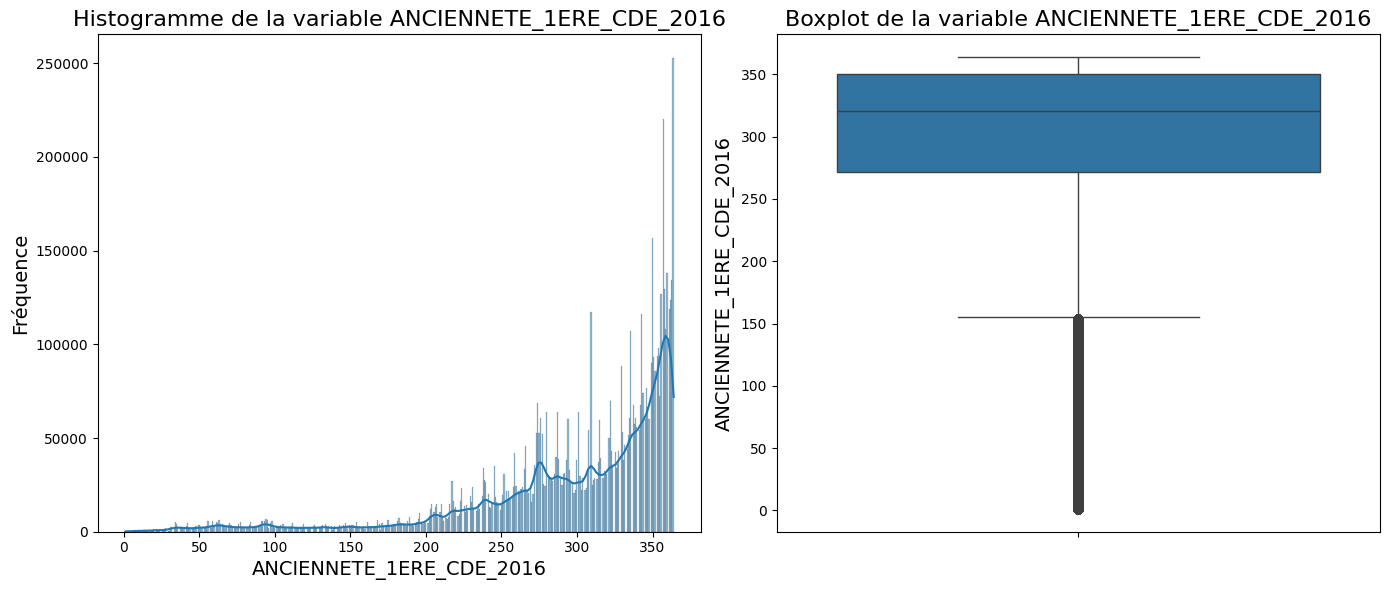


Statistiques descriptives de la variable ANCIENNETE_1ERE_CDE_2016 :
count    7.404788e+06
mean     2.982361e+02
std      6.922411e+01
min      1.000000e+00
25%      2.720000e+02
50%      3.210000e+02
75%      3.500000e+02
max      3.640000e+02
Name: ANCIENNETE_1ERE_CDE_2016, dtype: float64

--------------------------------------------------



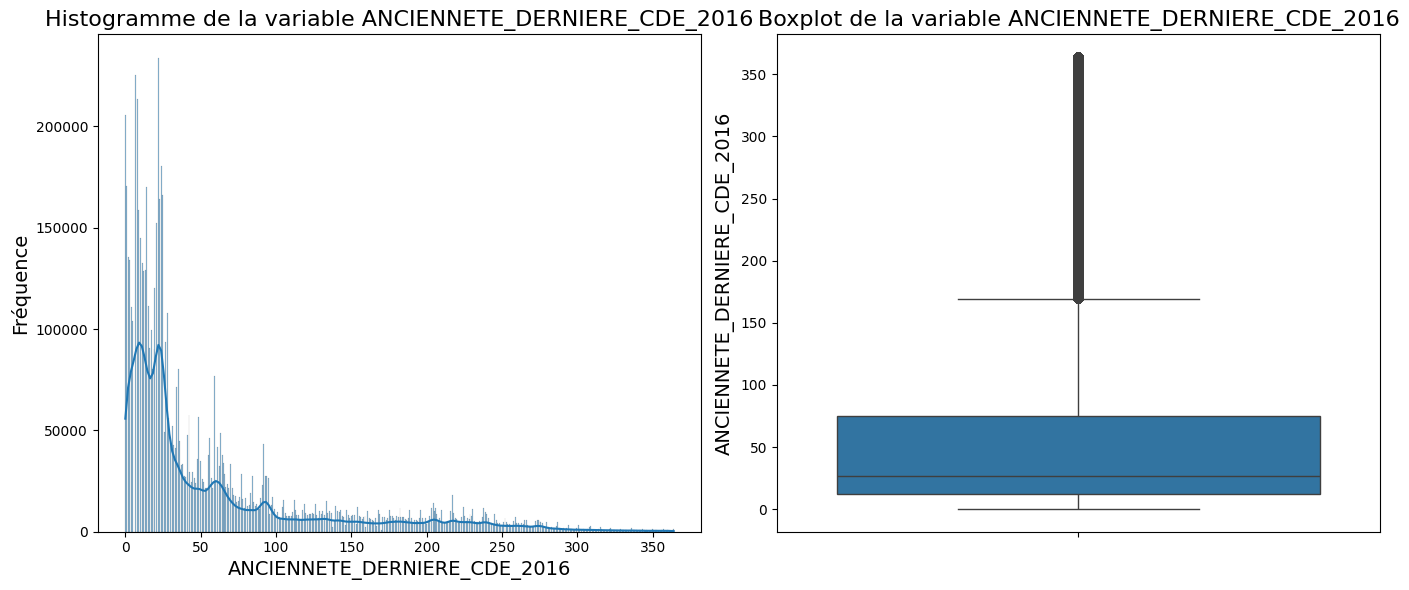


Statistiques descriptives de la variable ANCIENNETE_DERNIERE_CDE_2016 :
count    7.404788e+06
mean     5.912985e+01
std      7.162132e+01
min      0.000000e+00
25%      1.200000e+01
50%      2.700000e+01
75%      7.500000e+01
max      3.640000e+02
Name: ANCIENNETE_DERNIERE_CDE_2016, dtype: float64

--------------------------------------------------



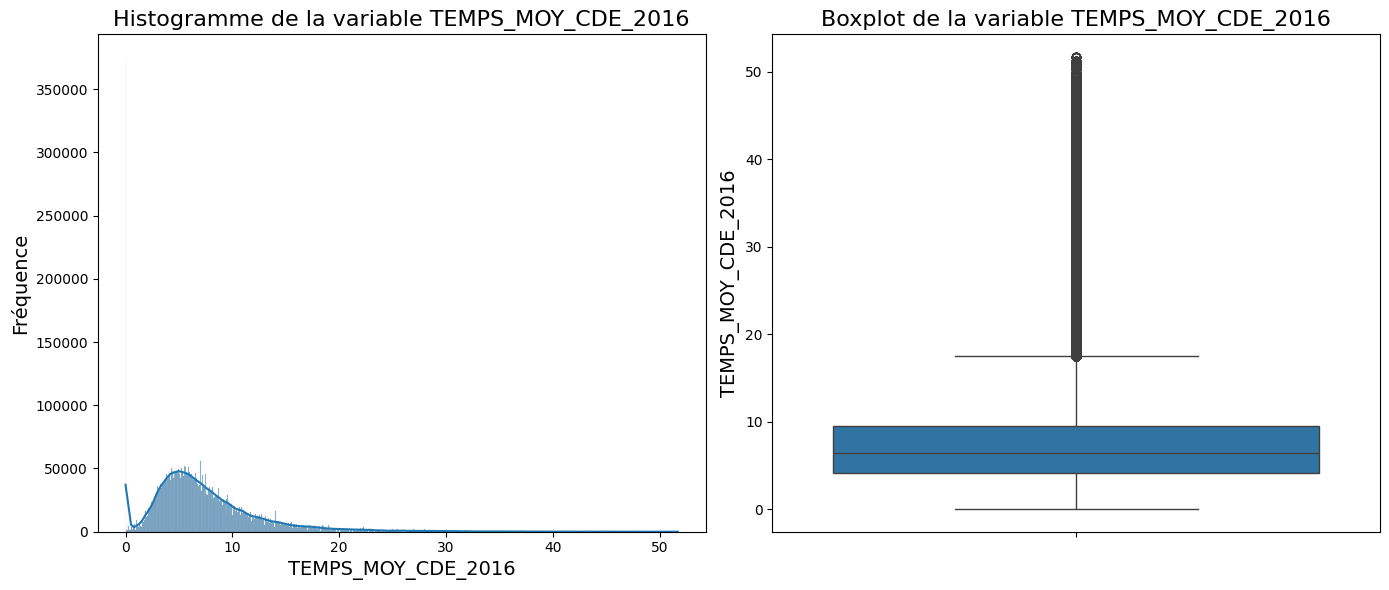


Statistiques descriptives de la variable TEMPS_MOY_CDE_2016 :
count    7.404788e+06
mean     7.497753e+00
std      5.368866e+00
min      0.000000e+00
25%      4.186667e+00
50%      6.368421e+00
75%      9.514286e+00
max      5.171429e+01
Name: TEMPS_MOY_CDE_2016, dtype: float64

--------------------------------------------------



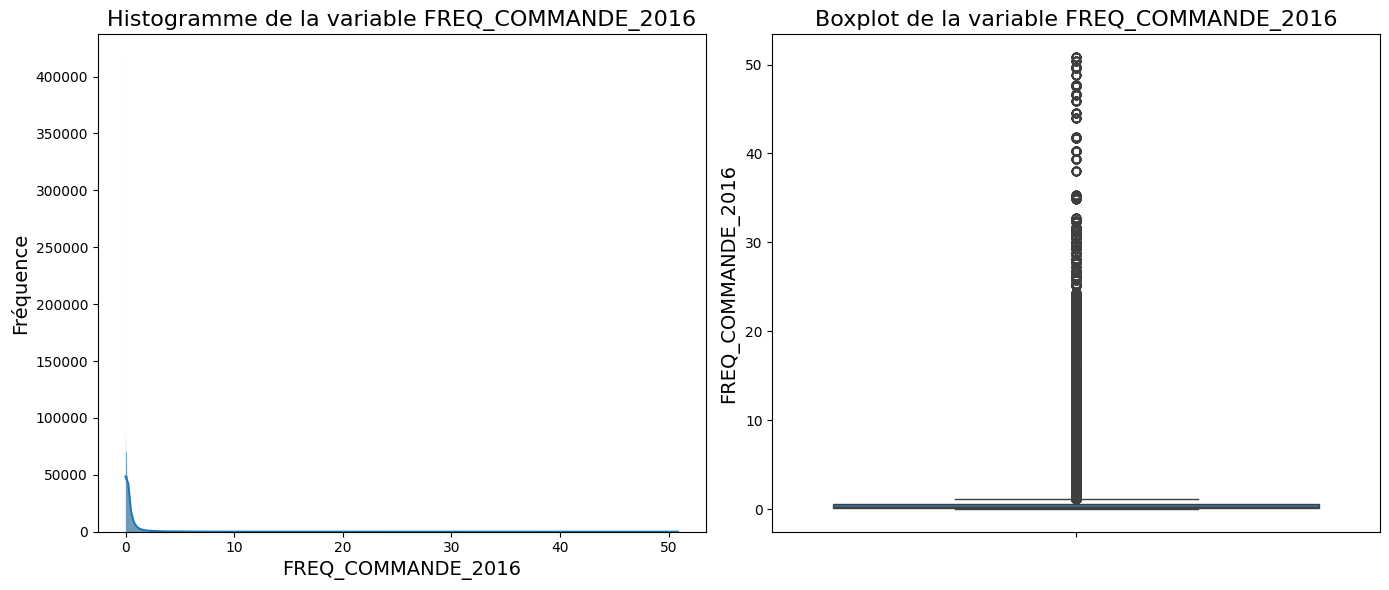


Statistiques descriptives de la variable FREQ_COMMANDE_2016 :
count    7.404788e+06
mean              inf
std               NaN
min      0.000000e+00
25%      9.061834e-02
50%      2.444444e-01
75%      5.744681e-01
max               inf
Name: FREQ_COMMANDE_2016, dtype: float64

--------------------------------------------------



c:\Users\belga\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [50]:
# Importer les librairies nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les variables quantitatives
var_quan = df_num_clean.select_dtypes(include=['int64','float64']).columns.tolist()

# Générer des histogrammes et des boxplots pour chaque variable quantitative
for var in var_quan:
    # Créer une nouvelle figure
    plt.figure(figsize=(14, 6))
    
    # Sous-figure pour l'histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df_num_clean[var], kde=True)
    plt.title(f'Histogramme de la variable {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Fréquence', fontsize=14)

    # Sous-figure pour le boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_num_clean[var])
    plt.title(f'Boxplot de la variable {var}', fontsize=16)
    plt.ylabel(var, fontsize=14)
    
    # Ajuster la mise en page
    plt.tight_layout()
    
    # Afficher la figure
    plt.show()
    
    # Afficher les statistiques descriptives
    print(f'\nStatistiques descriptives de la variable {var} :')
    print(df_num_clean[var].describe())
    print('\n' + '-'*50 + '\n')

C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


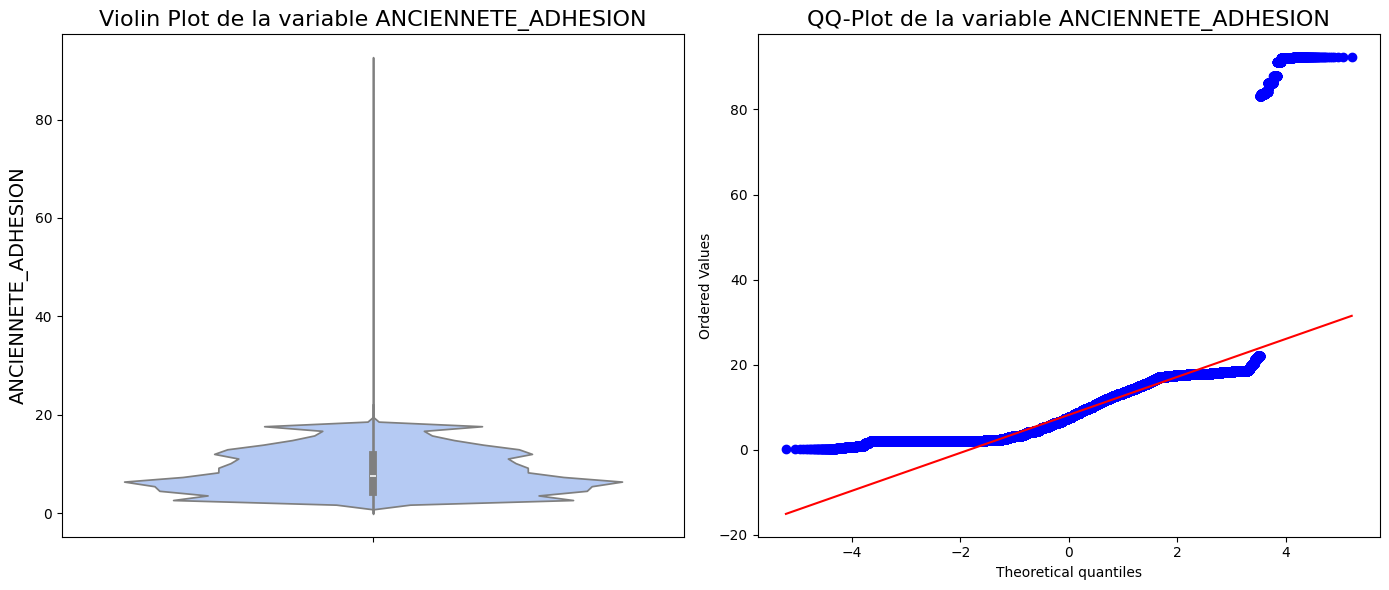


Statistiques descriptives de la variable ANCIENNETE_ADHESION :
count    7.404788e+06
mean     8.213792e+00
std      4.681773e+00
min      2.217659e-01
25%      4.229979e+00
50%      7.537303e+00
75%      1.177276e+01
max      9.227652e+01
Name: ANCIENNETE_ADHESION, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


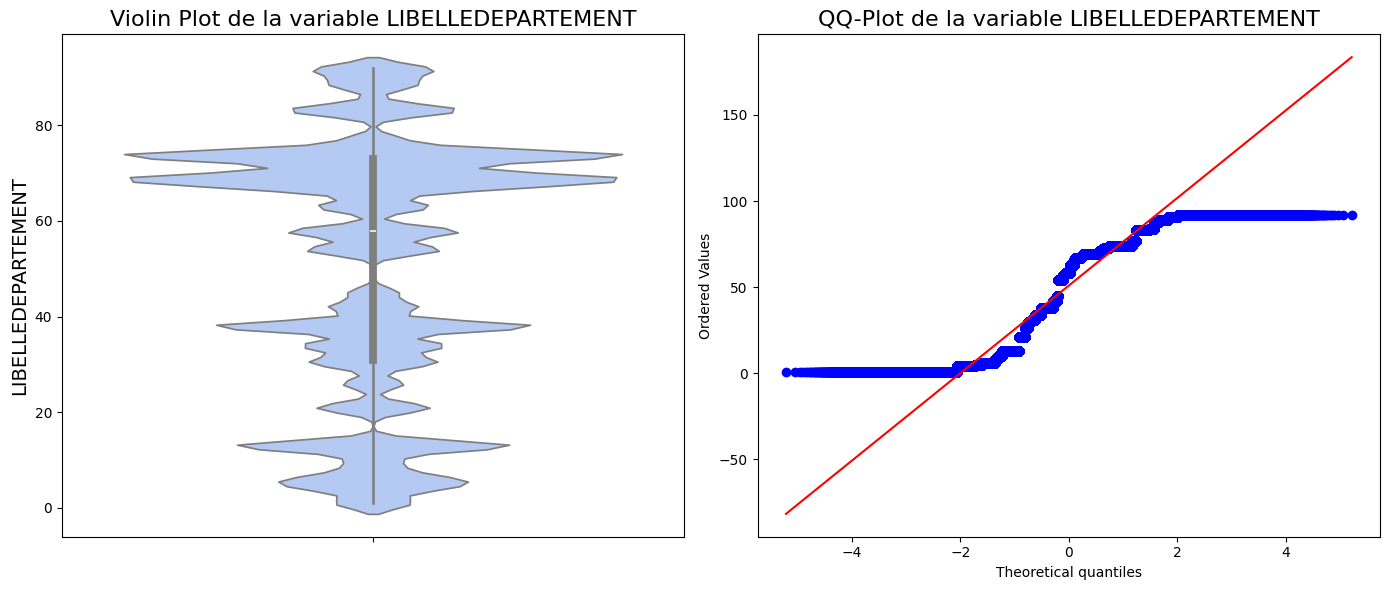


Statistiques descriptives de la variable LIBELLEDEPARTEMENT :
count    7.404788e+06
mean     5.094787e+01
std      2.660973e+01
min      1.000000e+00
25%      3.100000e+01
50%      5.800000e+01
75%      7.300000e+01
max      9.200000e+01
Name: LIBELLEDEPARTEMENT, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


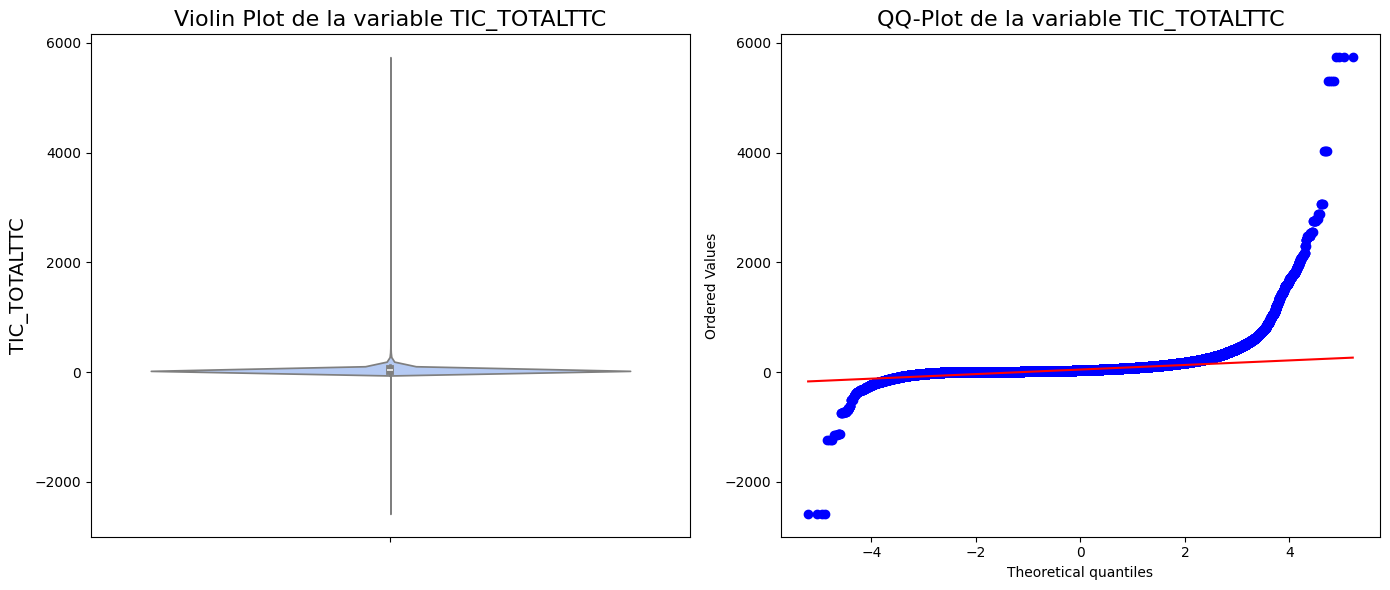


Statistiques descriptives de la variable TIC_TOTALTTC :
count    7.404788e+06
mean     4.722531e+01
std      5.132880e+01
min     -2.582000e+03
25%      1.790000e+01
50%      3.329000e+01
75%      6.095000e+01
max      5.736300e+03
Name: TIC_TOTALTTC, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


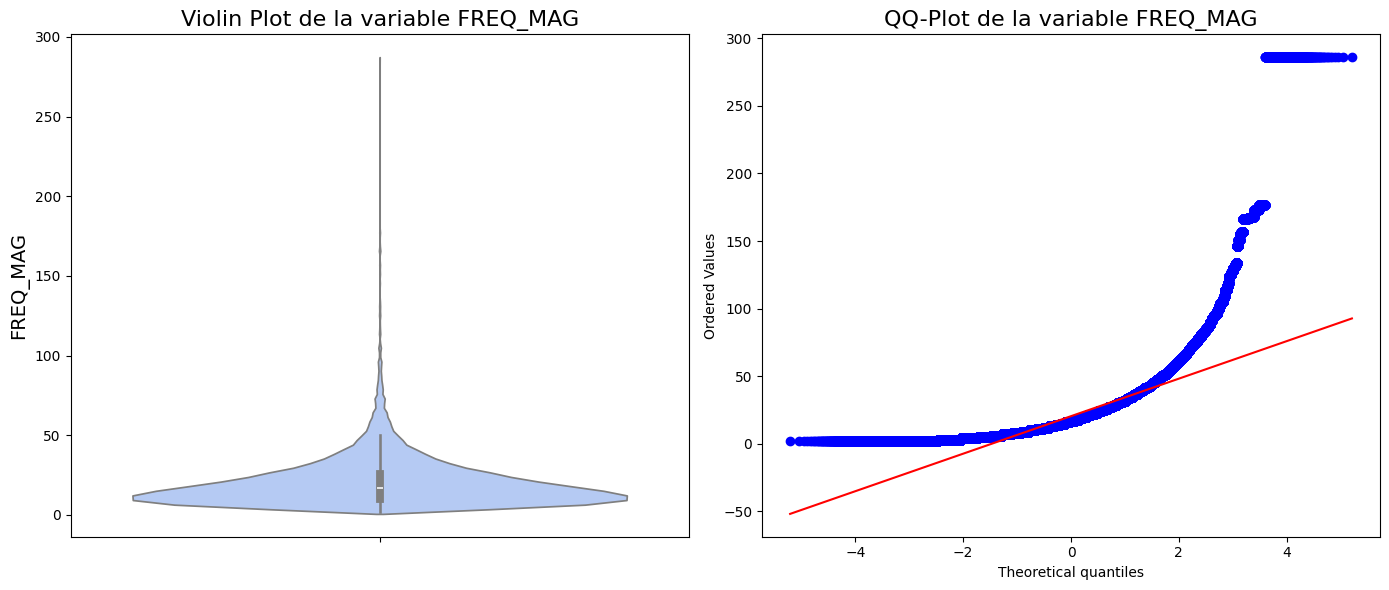


Statistiques descriptives de la variable FREQ_MAG :
count    7.404788e+06
mean     2.048546e+01
std      1.559172e+01
min      2.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.600000e+01
max      2.860000e+02
Name: FREQ_MAG, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


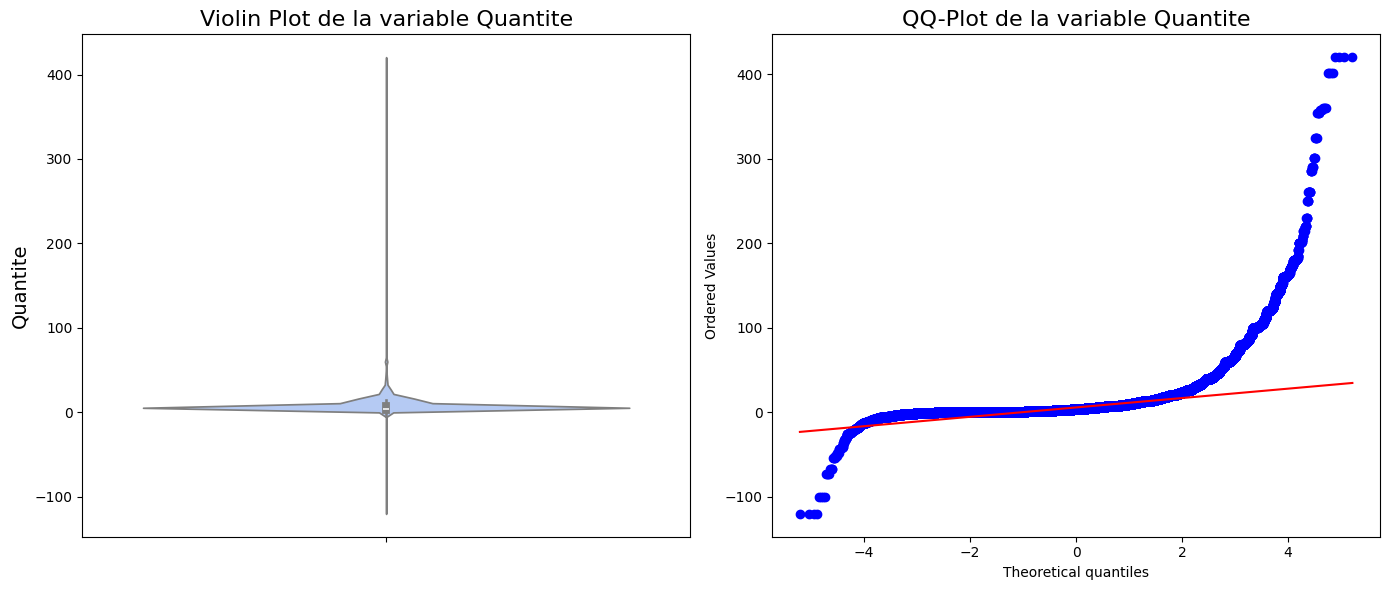


Statistiques descriptives de la variable Quantite :
count    7.404788e+06
mean     5.869322e+00
std      7.084412e+00
min     -1.200000e+02
25%      2.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      4.200000e+02
Name: Quantite, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


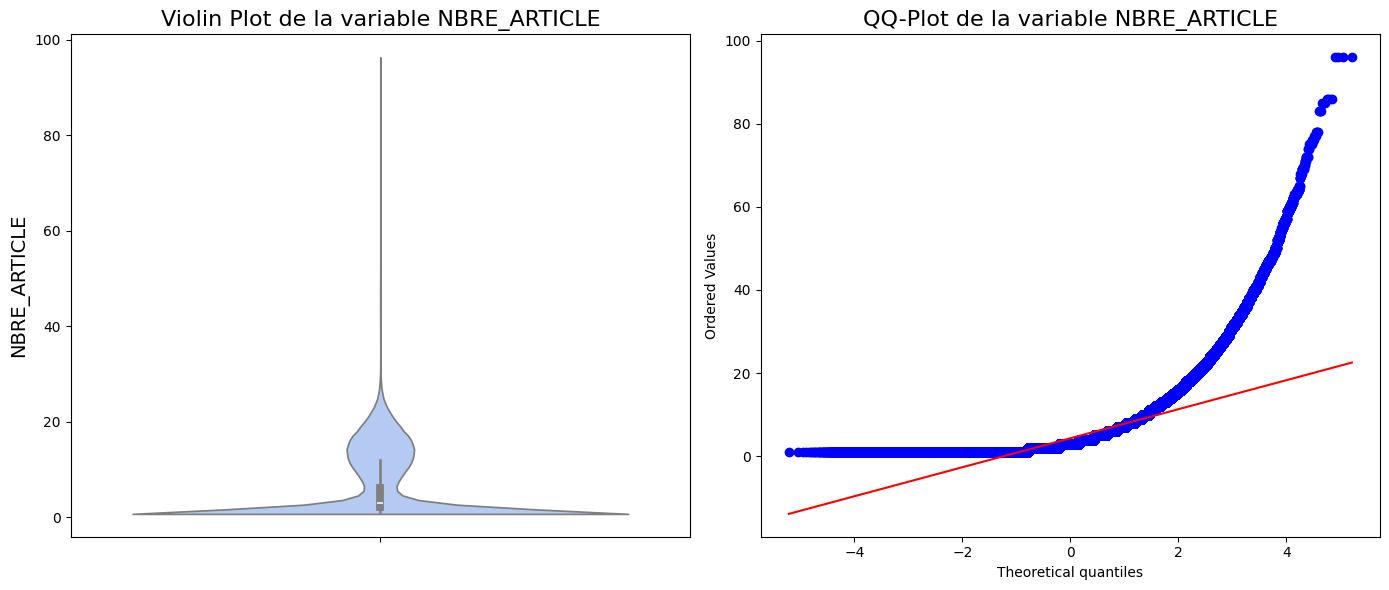


Statistiques descriptives de la variable NBRE_ARTICLE :
count    7.404788e+06
mean     4.312533e+00
std      4.052791e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      9.600000e+01
Name: NBRE_ARTICLE, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


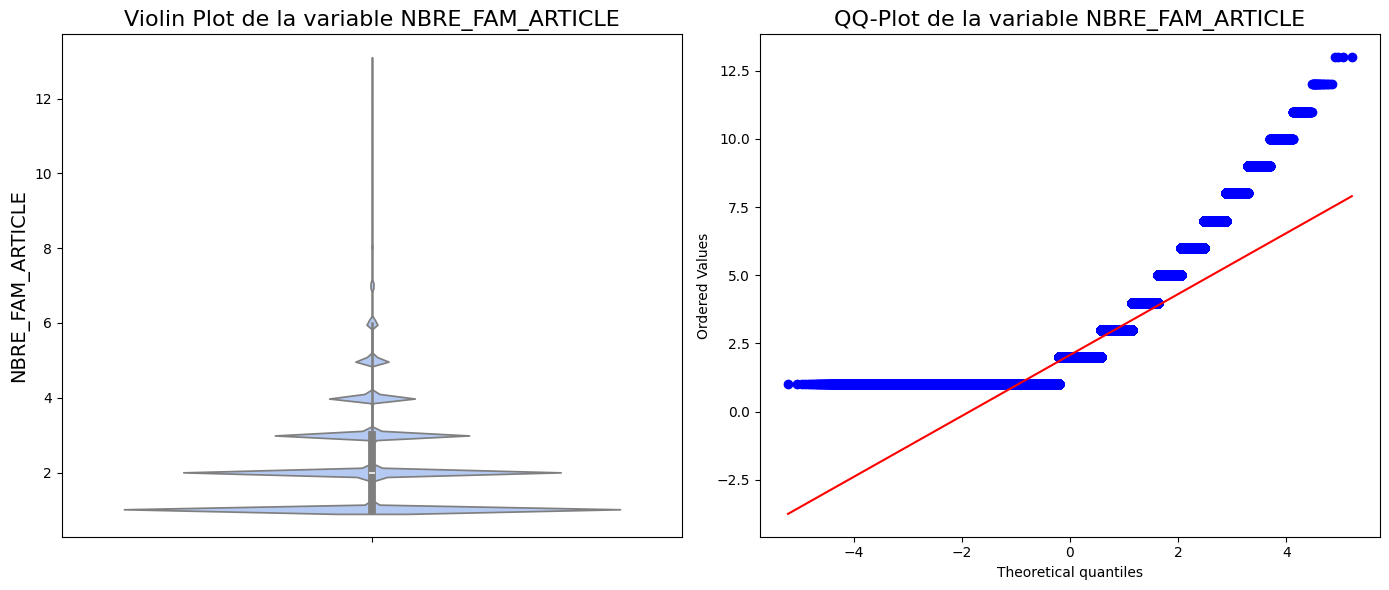


Statistiques descriptives de la variable NBRE_FAM_ARTICLE :
count    7.404788e+06
mean     2.074375e+00
std      1.249945e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.300000e+01
Name: NBRE_FAM_ARTICLE, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


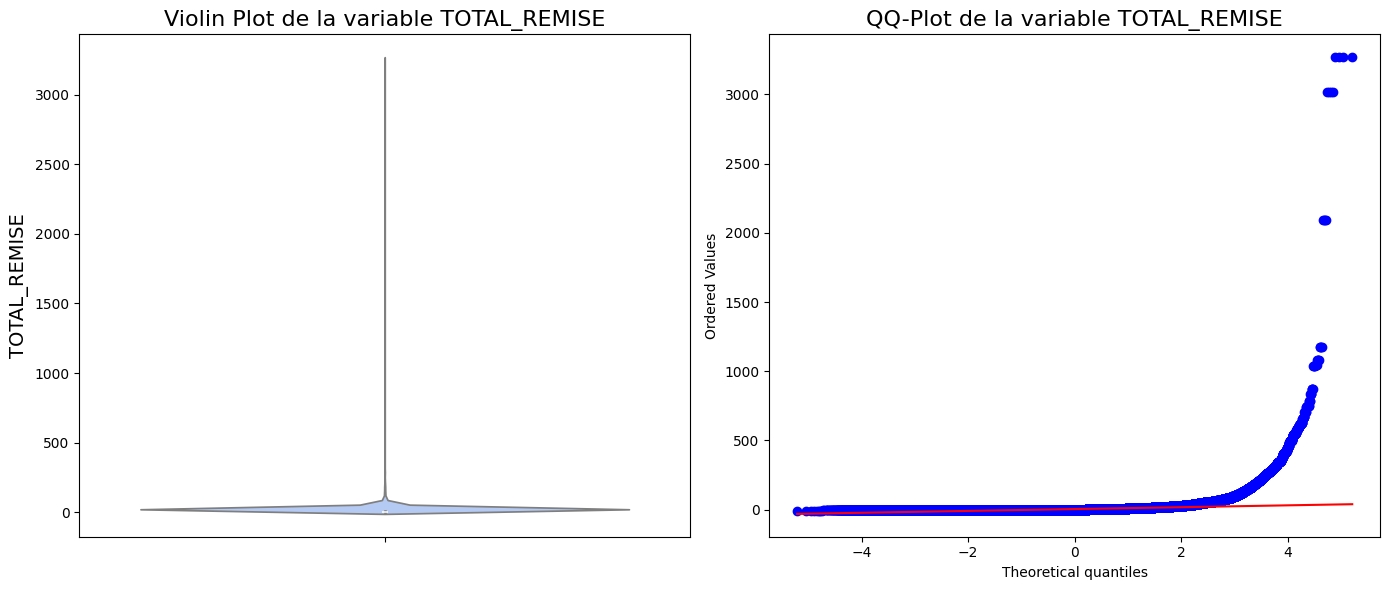


Statistiques descriptives de la variable TOTAL_REMISE :
count    7.404788e+06
mean     4.235905e+00
std      1.140198e+01
min     -1.065800e+01
25%      0.000000e+00
50%      0.000000e+00
75%      5.033000e+00
max      3.268909e+03
Name: TOTAL_REMISE, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


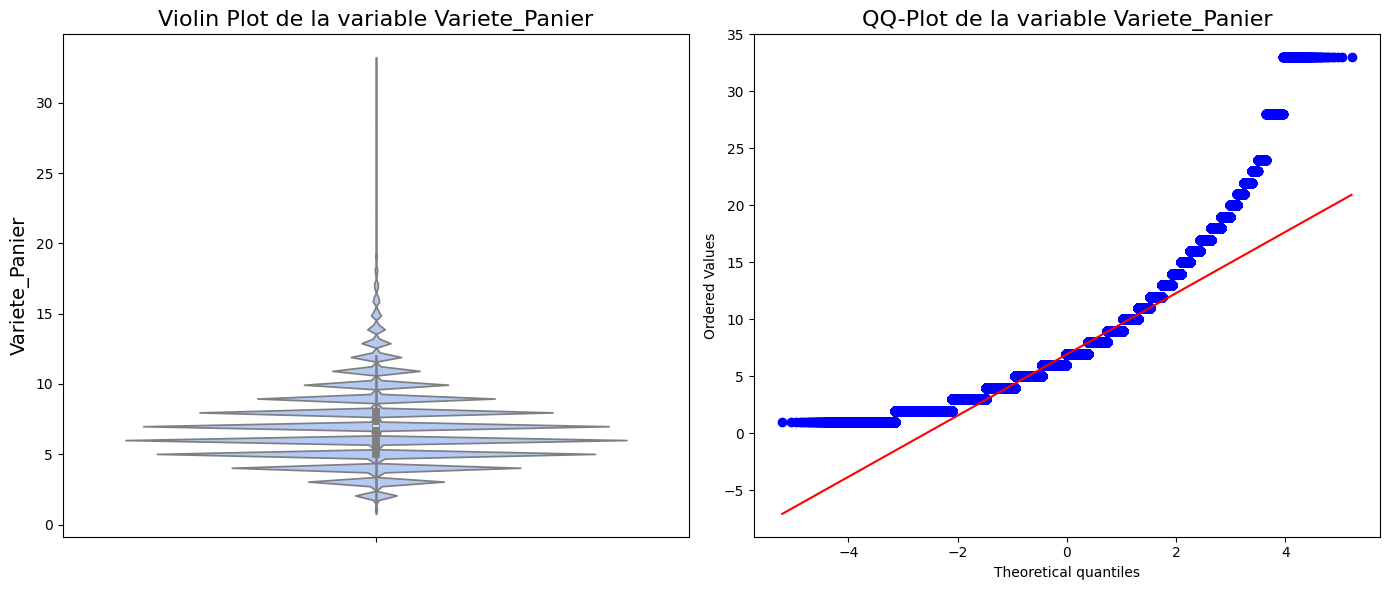


Statistiques descriptives de la variable Variete_Panier :
count    7.404788e+06
mean     6.937212e+00
std      2.780692e+00
min      1.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      8.000000e+00
max      3.300000e+01
Name: Variete_Panier, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


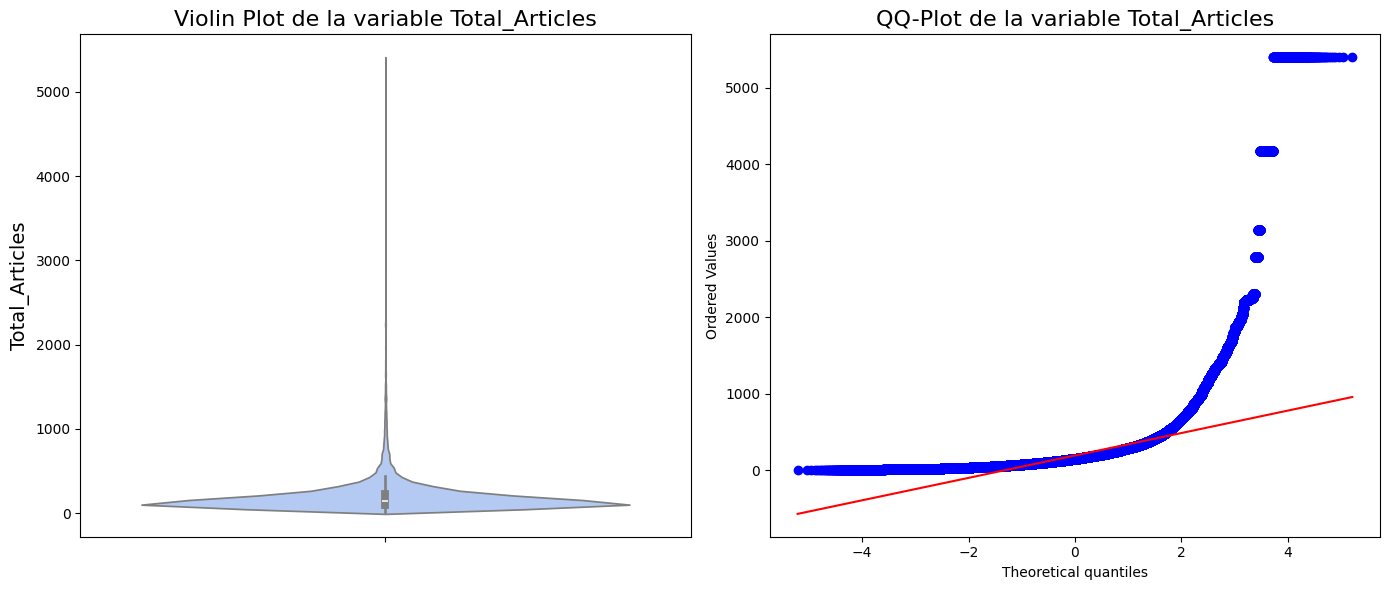


Statistiques descriptives de la variable Total_Articles :
count    7.404788e+06
mean     1.925426e+02
std      1.904194e+02
min      6.000000e+00
25%      9.400000e+01
50%      1.470000e+02
75%      2.300000e+02
max      5.397000e+03
Name: Total_Articles, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


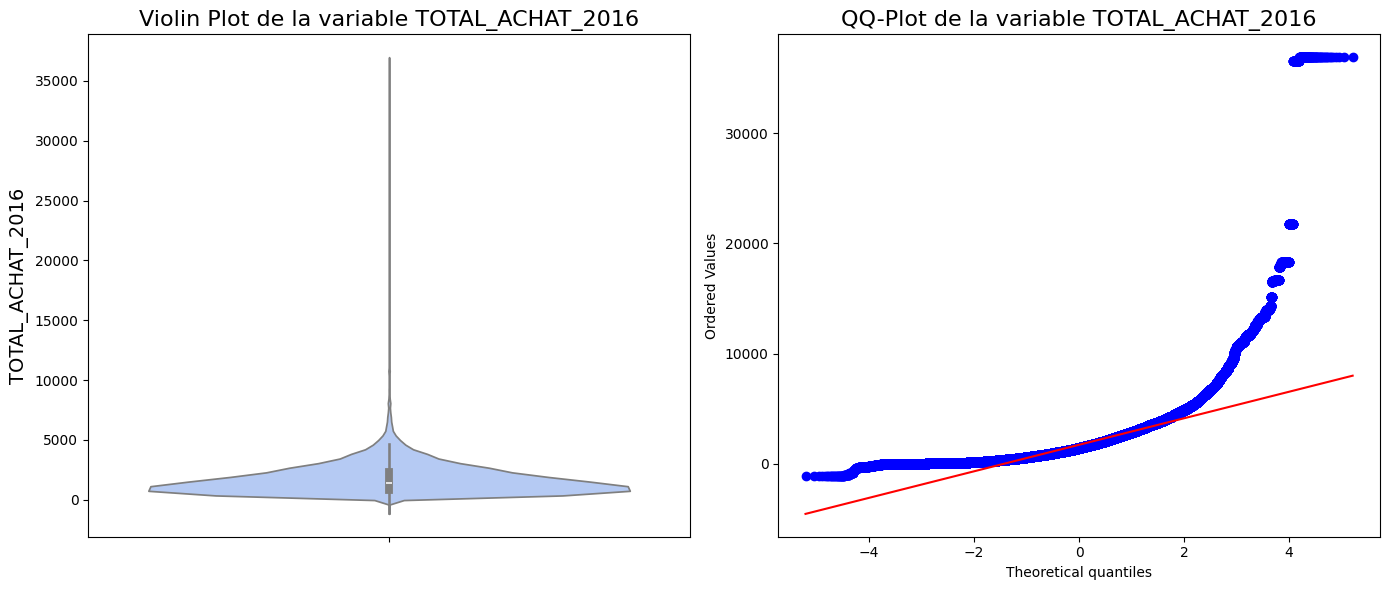


Statistiques descriptives de la variable TOTAL_ACHAT_2016 :
count    7.404788e+06
mean     1.729220e+03
std      1.301478e+03
min     -1.079800e+03
25%      8.184000e+02
50%      1.433840e+03
75%      2.342520e+03
max      3.688064e+04
Name: TOTAL_ACHAT_2016, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


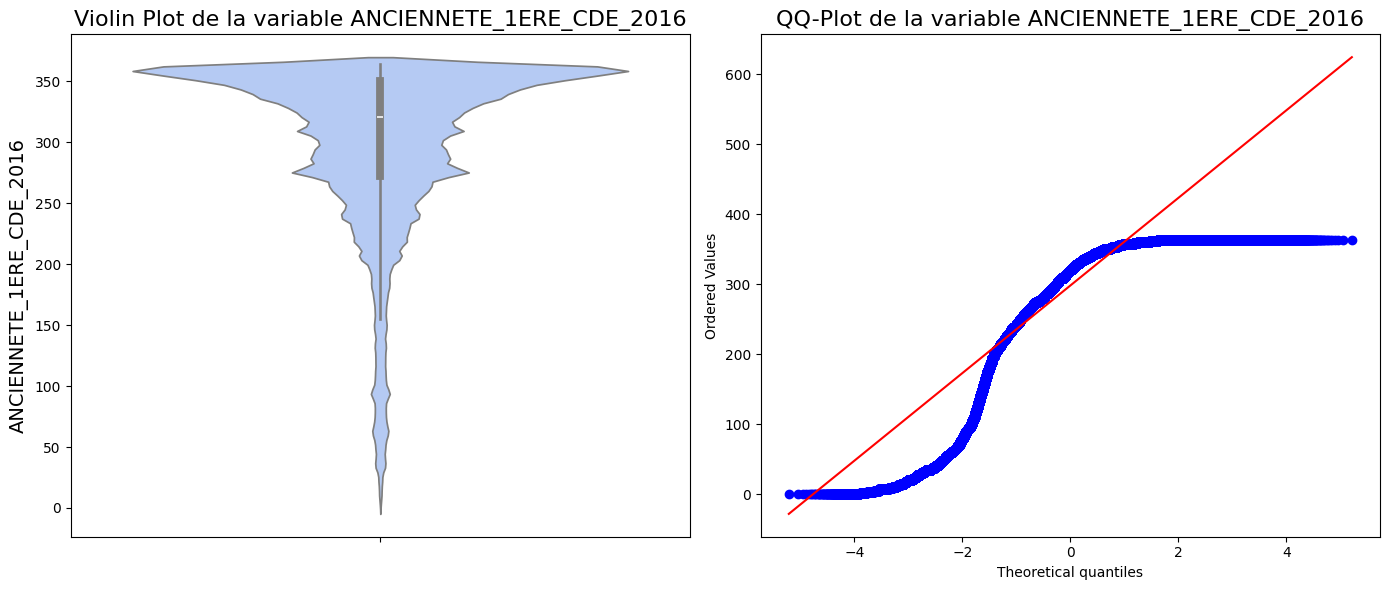


Statistiques descriptives de la variable ANCIENNETE_1ERE_CDE_2016 :
count    7.404788e+06
mean     2.982361e+02
std      6.922411e+01
min      1.000000e+00
25%      2.720000e+02
50%      3.210000e+02
75%      3.500000e+02
max      3.640000e+02
Name: ANCIENNETE_1ERE_CDE_2016, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


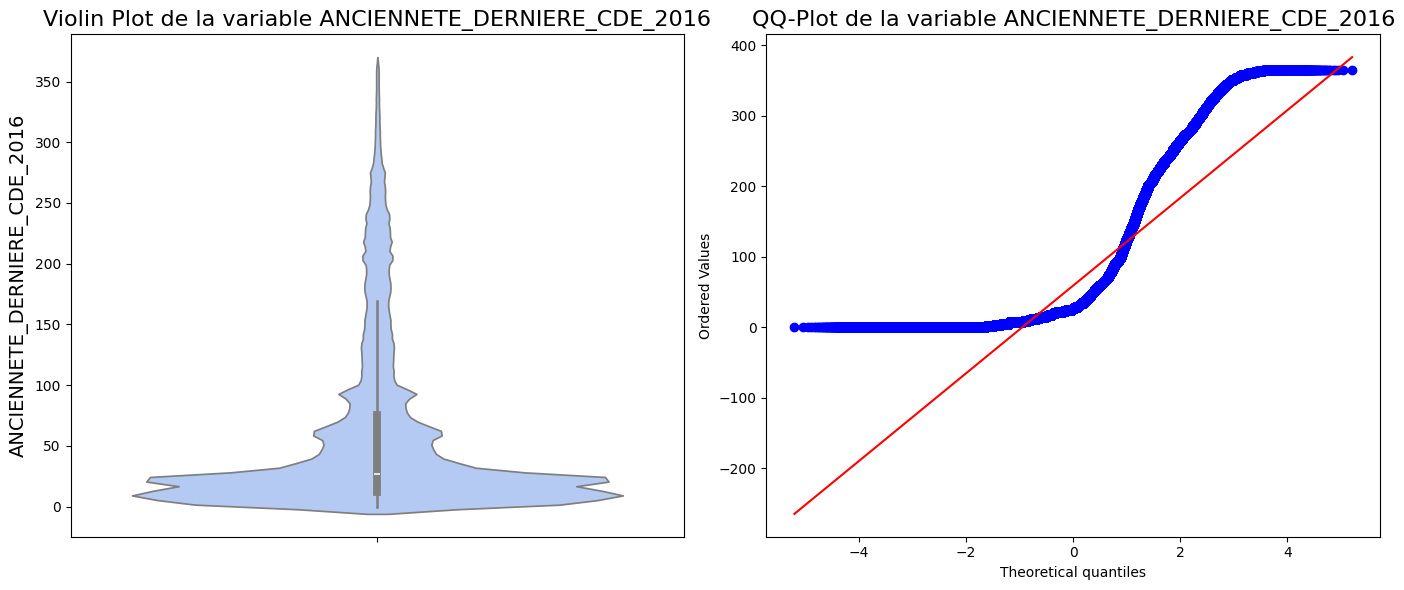


Statistiques descriptives de la variable ANCIENNETE_DERNIERE_CDE_2016 :
count    7.404788e+06
mean     5.912985e+01
std      7.162132e+01
min      0.000000e+00
25%      1.200000e+01
50%      2.700000e+01
75%      7.500000e+01
max      3.640000e+02
Name: ANCIENNETE_DERNIERE_CDE_2016, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)


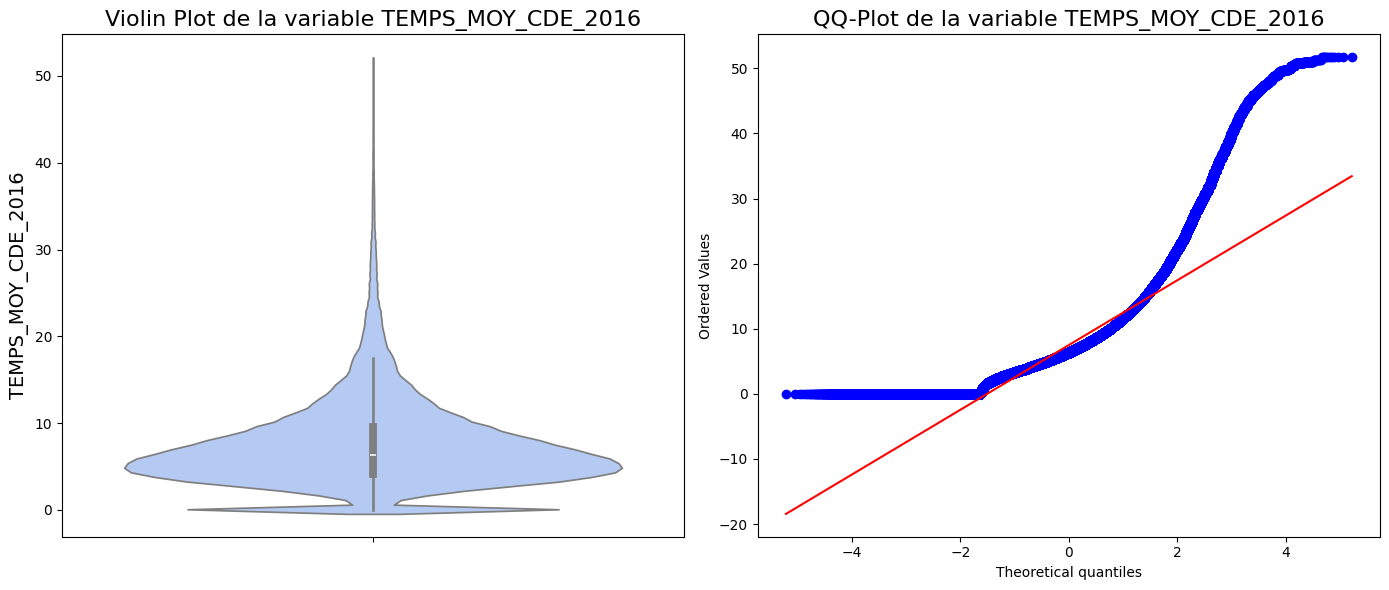


Statistiques descriptives de la variable TEMPS_MOY_CDE_2016 :
count    7.404788e+06
mean     7.497753e+00
std      5.368866e+00
min      0.000000e+00
25%      4.186667e+00
50%      6.368421e+00
75%      9.514286e+00
max      5.171429e+01
Name: TEMPS_MOY_CDE_2016, dtype: float64

--------------------------------------------------



C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df_num_clean[var], palette=palette)
C:\Users\belga\AppData\Local\Temp\ipykernel_18728\573916732.py:19: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(y=df_num_clean[var], palette=palette)
c:\Users\belga\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


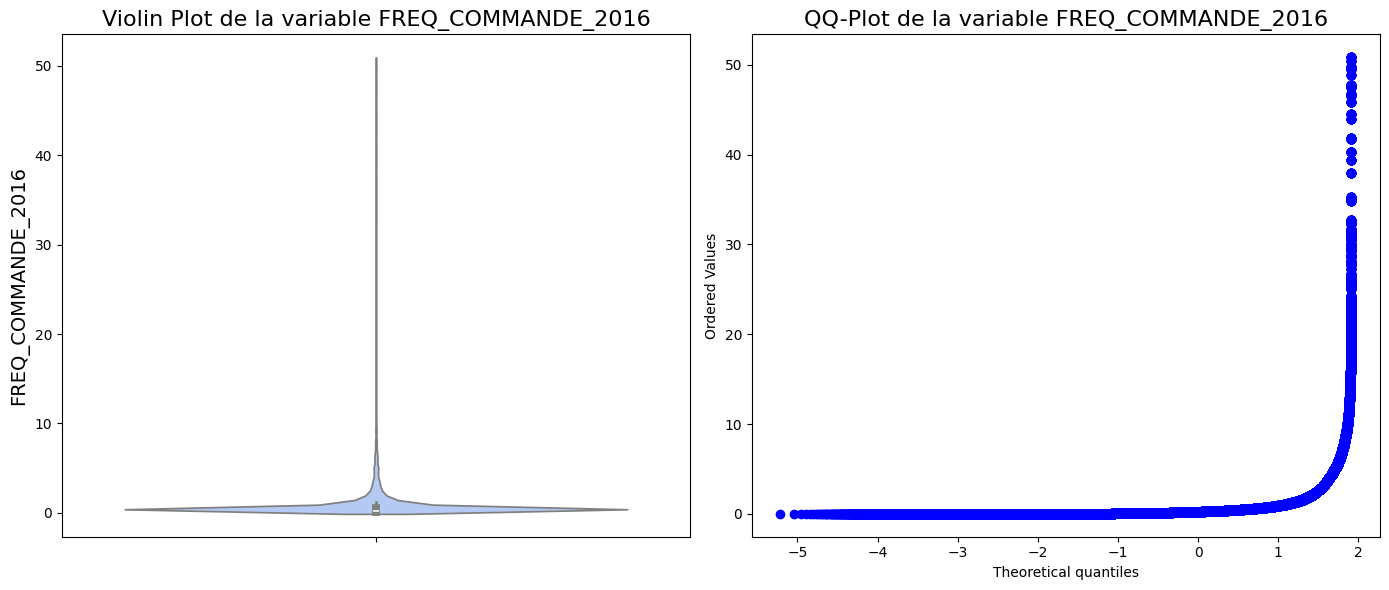


Statistiques descriptives de la variable FREQ_COMMANDE_2016 :
count    7.404788e+06
mean              inf
std               NaN
min      0.000000e+00
25%      9.061834e-02
50%      2.444444e-01
75%      5.744681e-01
max               inf
Name: FREQ_COMMANDE_2016, dtype: float64

--------------------------------------------------



c:\Users\belga\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [51]:
# Import des librairies nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Définir les variables quantitatives
var_quan = df_num_clean.select_dtypes(include=['int64','float64']).columns.tolist()

# Configuration d'une palette de couleurs définie
palette = sns.color_palette("coolwarm", 2)

# Générer des plots pour l'analyse univariée
for var in var_quan:
    # Distribution avec Violin Plot et Histogramme sur la même figure
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.violinplot(y=df_num_clean[var], palette=palette)
    plt.title(f'Violin Plot de la variable {var}', fontsize=16)
    plt.ylabel(var, fontsize=14)
    
    plt.subplot(1, 2, 2)
    stats.probplot(df_num_clean[var], dist="norm", plot=plt)
    plt.title(f'QQ-Plot de la variable {var}', fontsize=16)
    
    # Ajuster la mise en page
    plt.tight_layout()
    
    # Afficher la figure
    plt.show()
    
    # Afficher les statistiques descriptives
    print(f'\nStatistiques descriptives de la variable {var} :')
    print(df_num_clean[var].describe())
    print('\n' + '-'*50 + '\n')

ANALYSE BIVARIÉE

ANALYSE BIVARIÉE DES VARIABLES CATÉGORIELLES

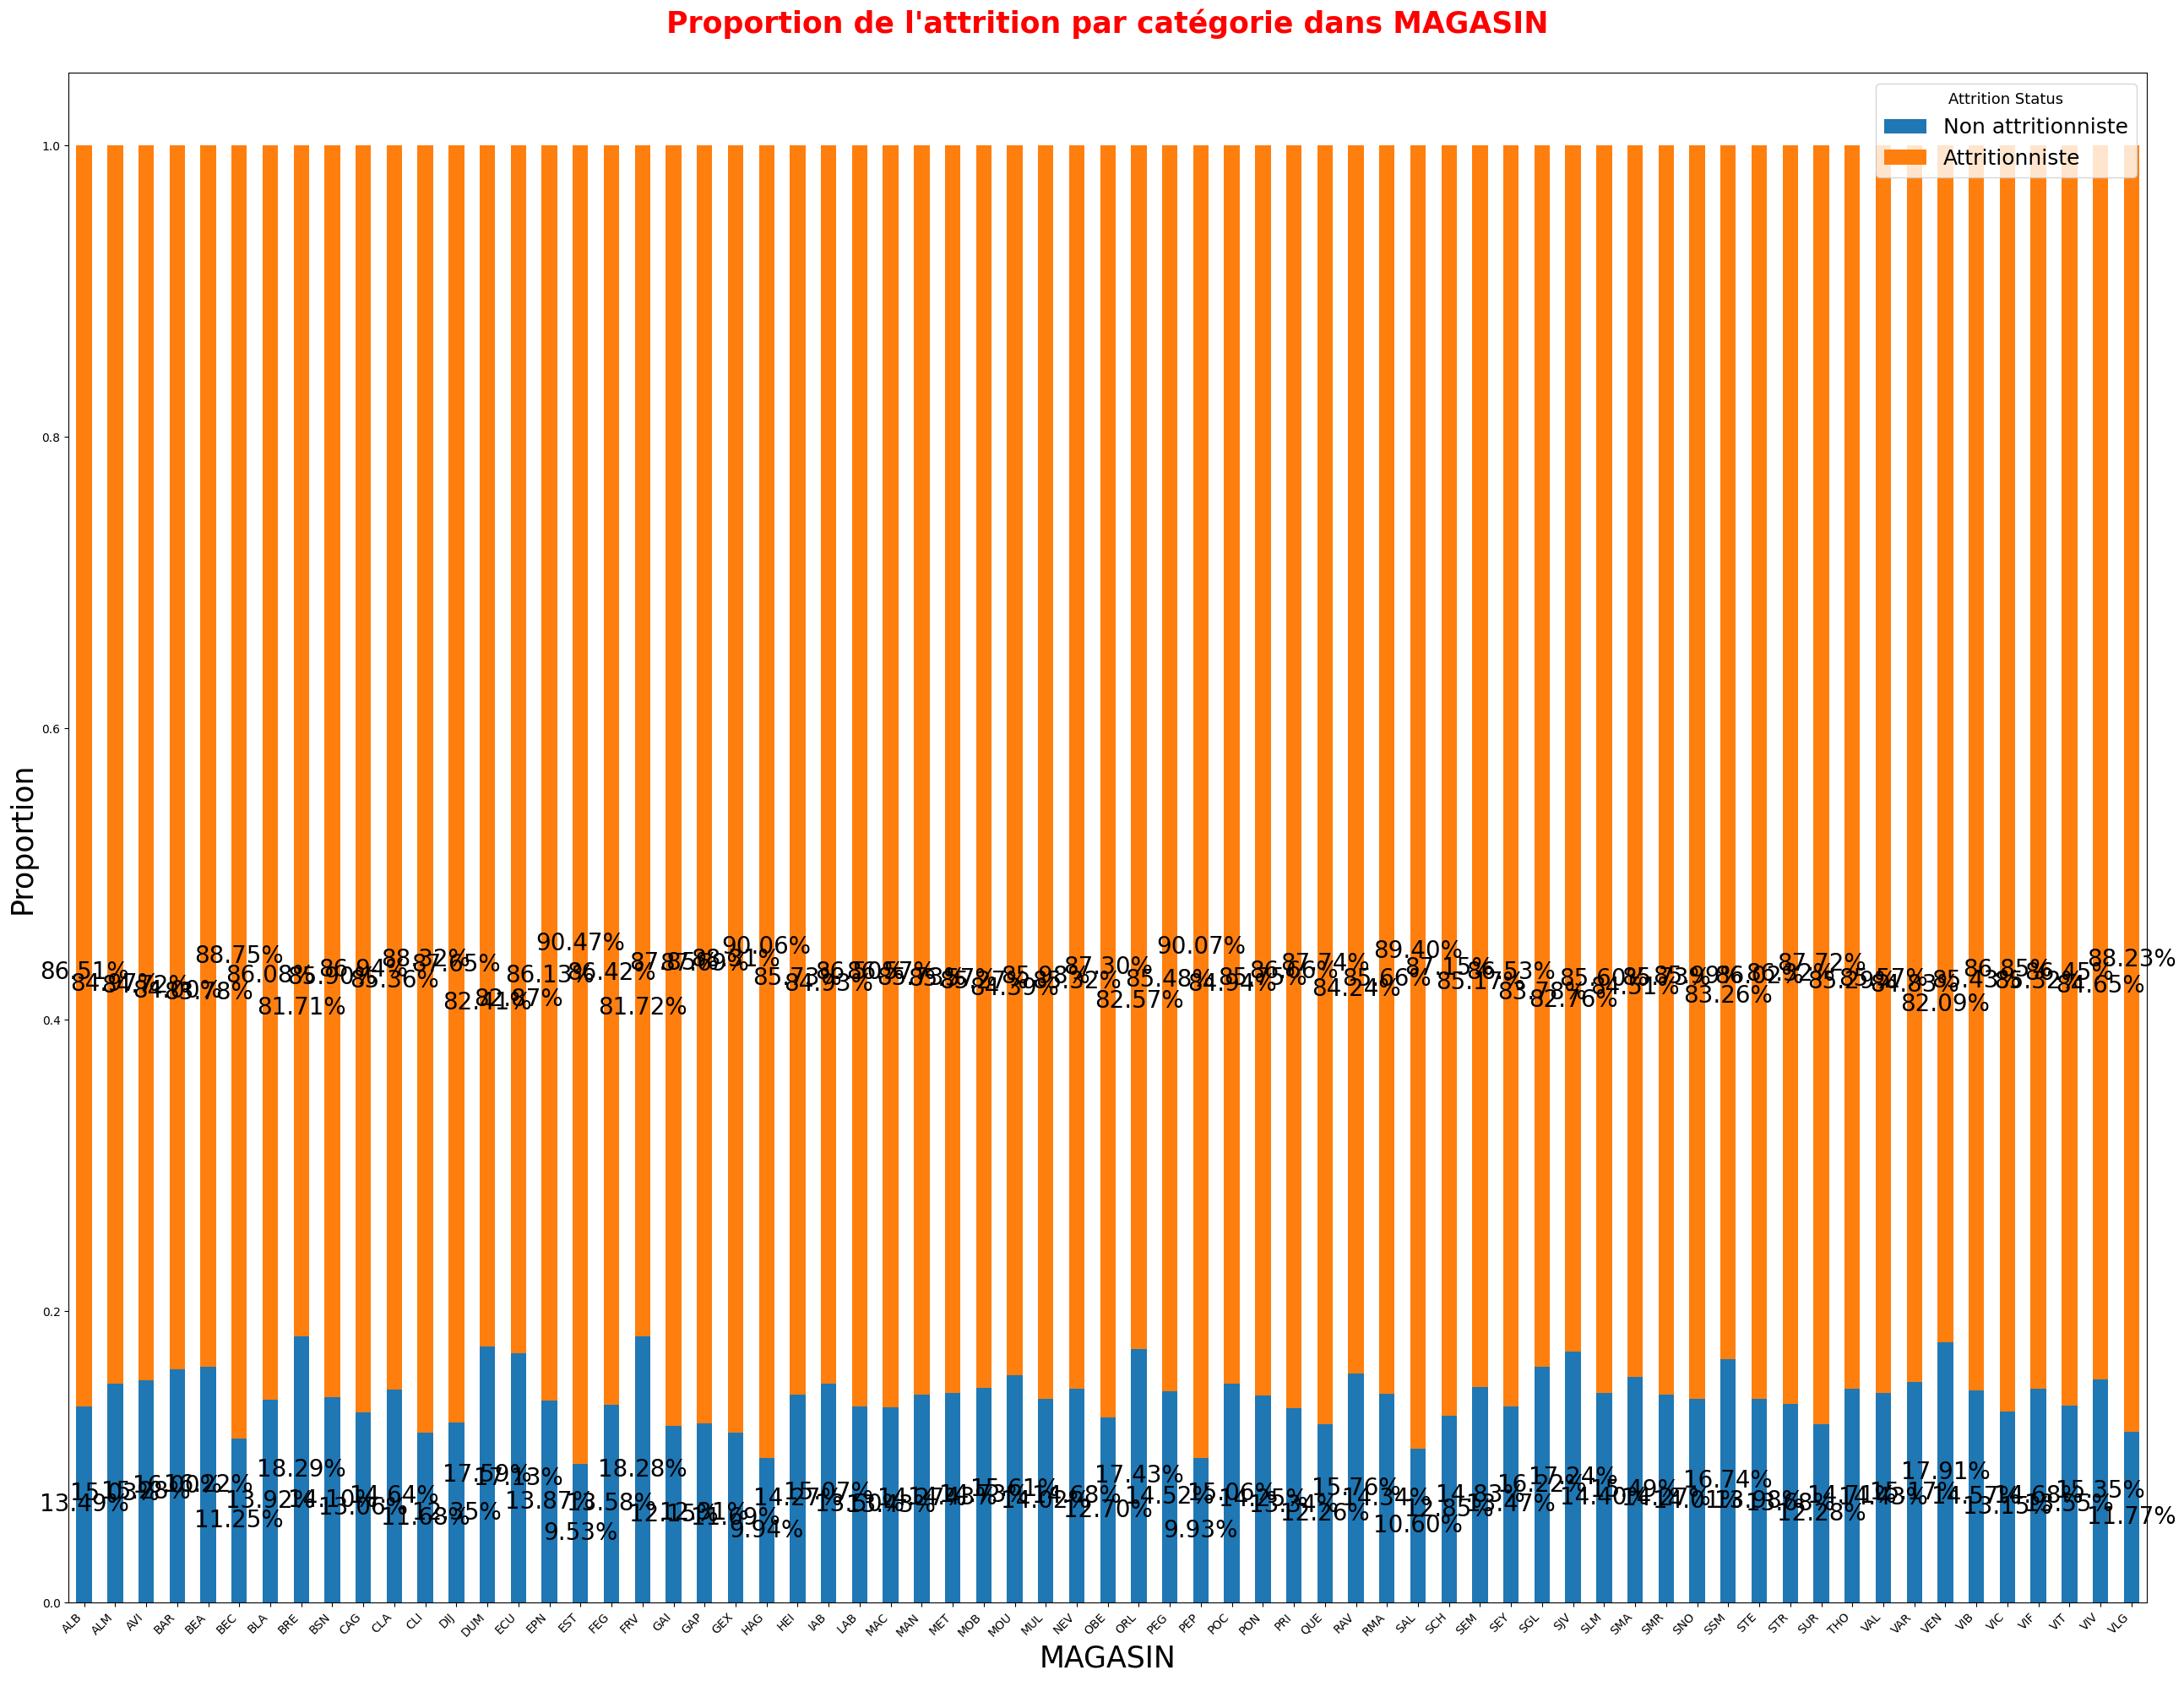

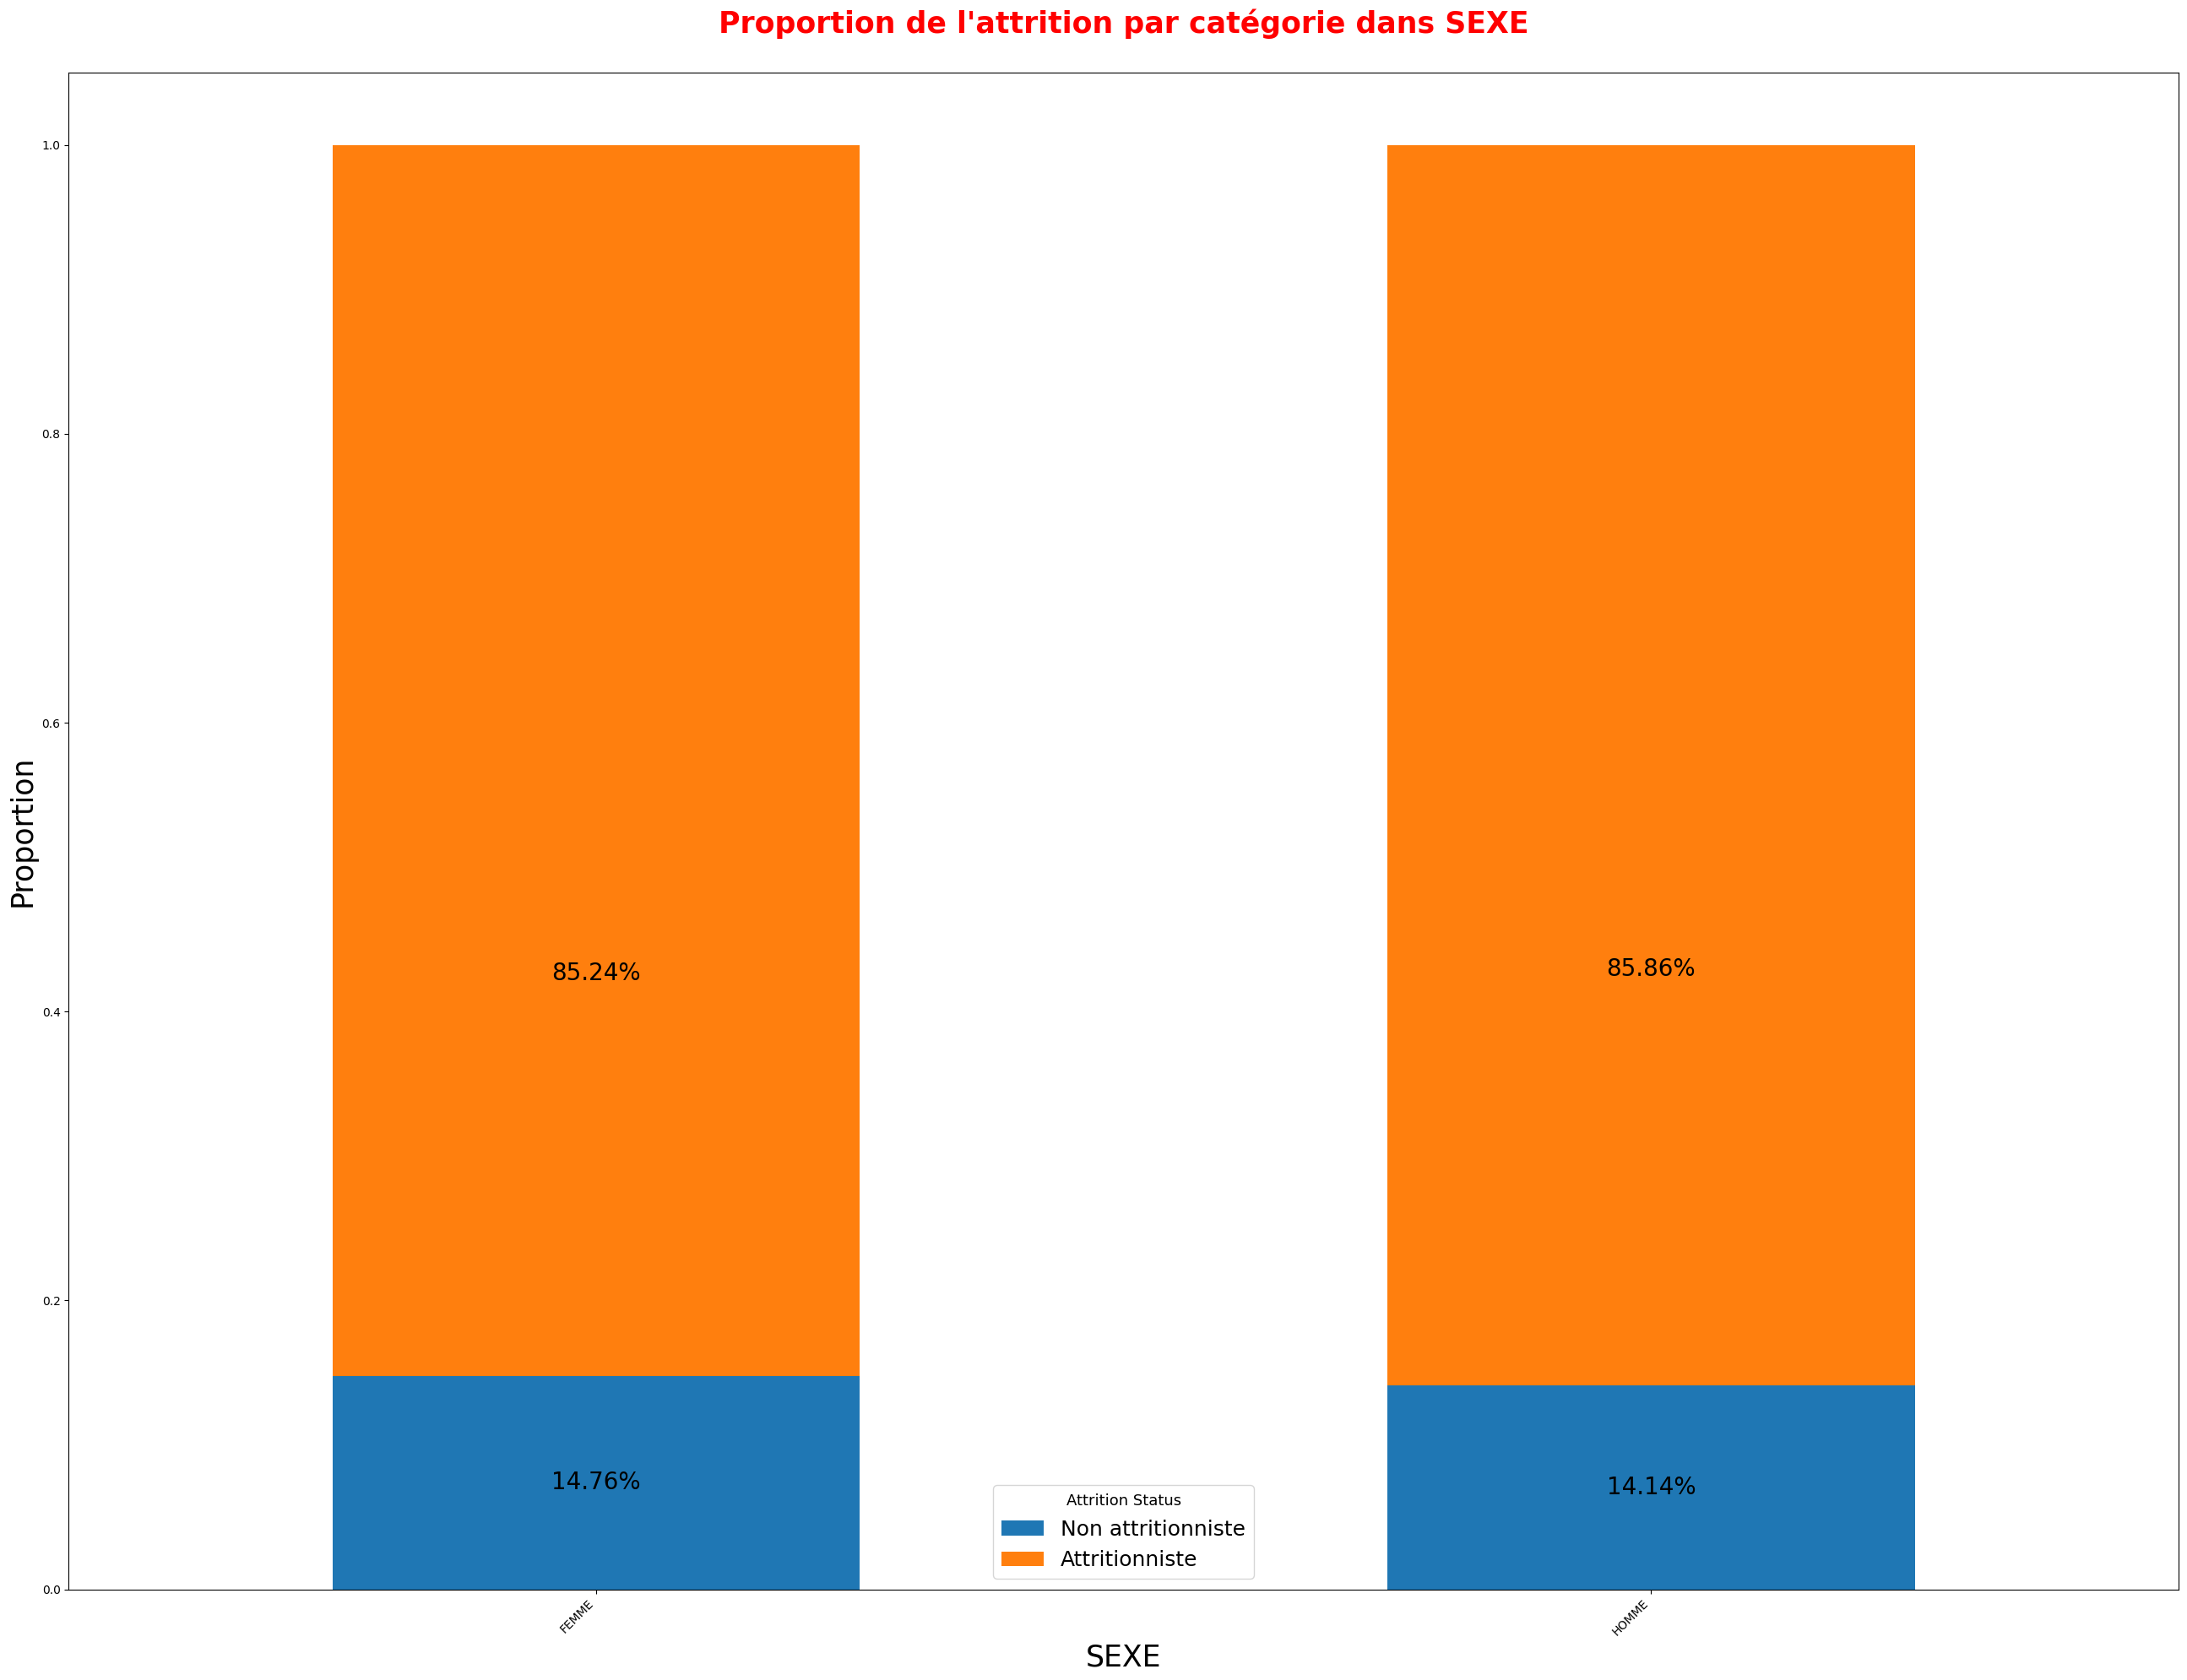

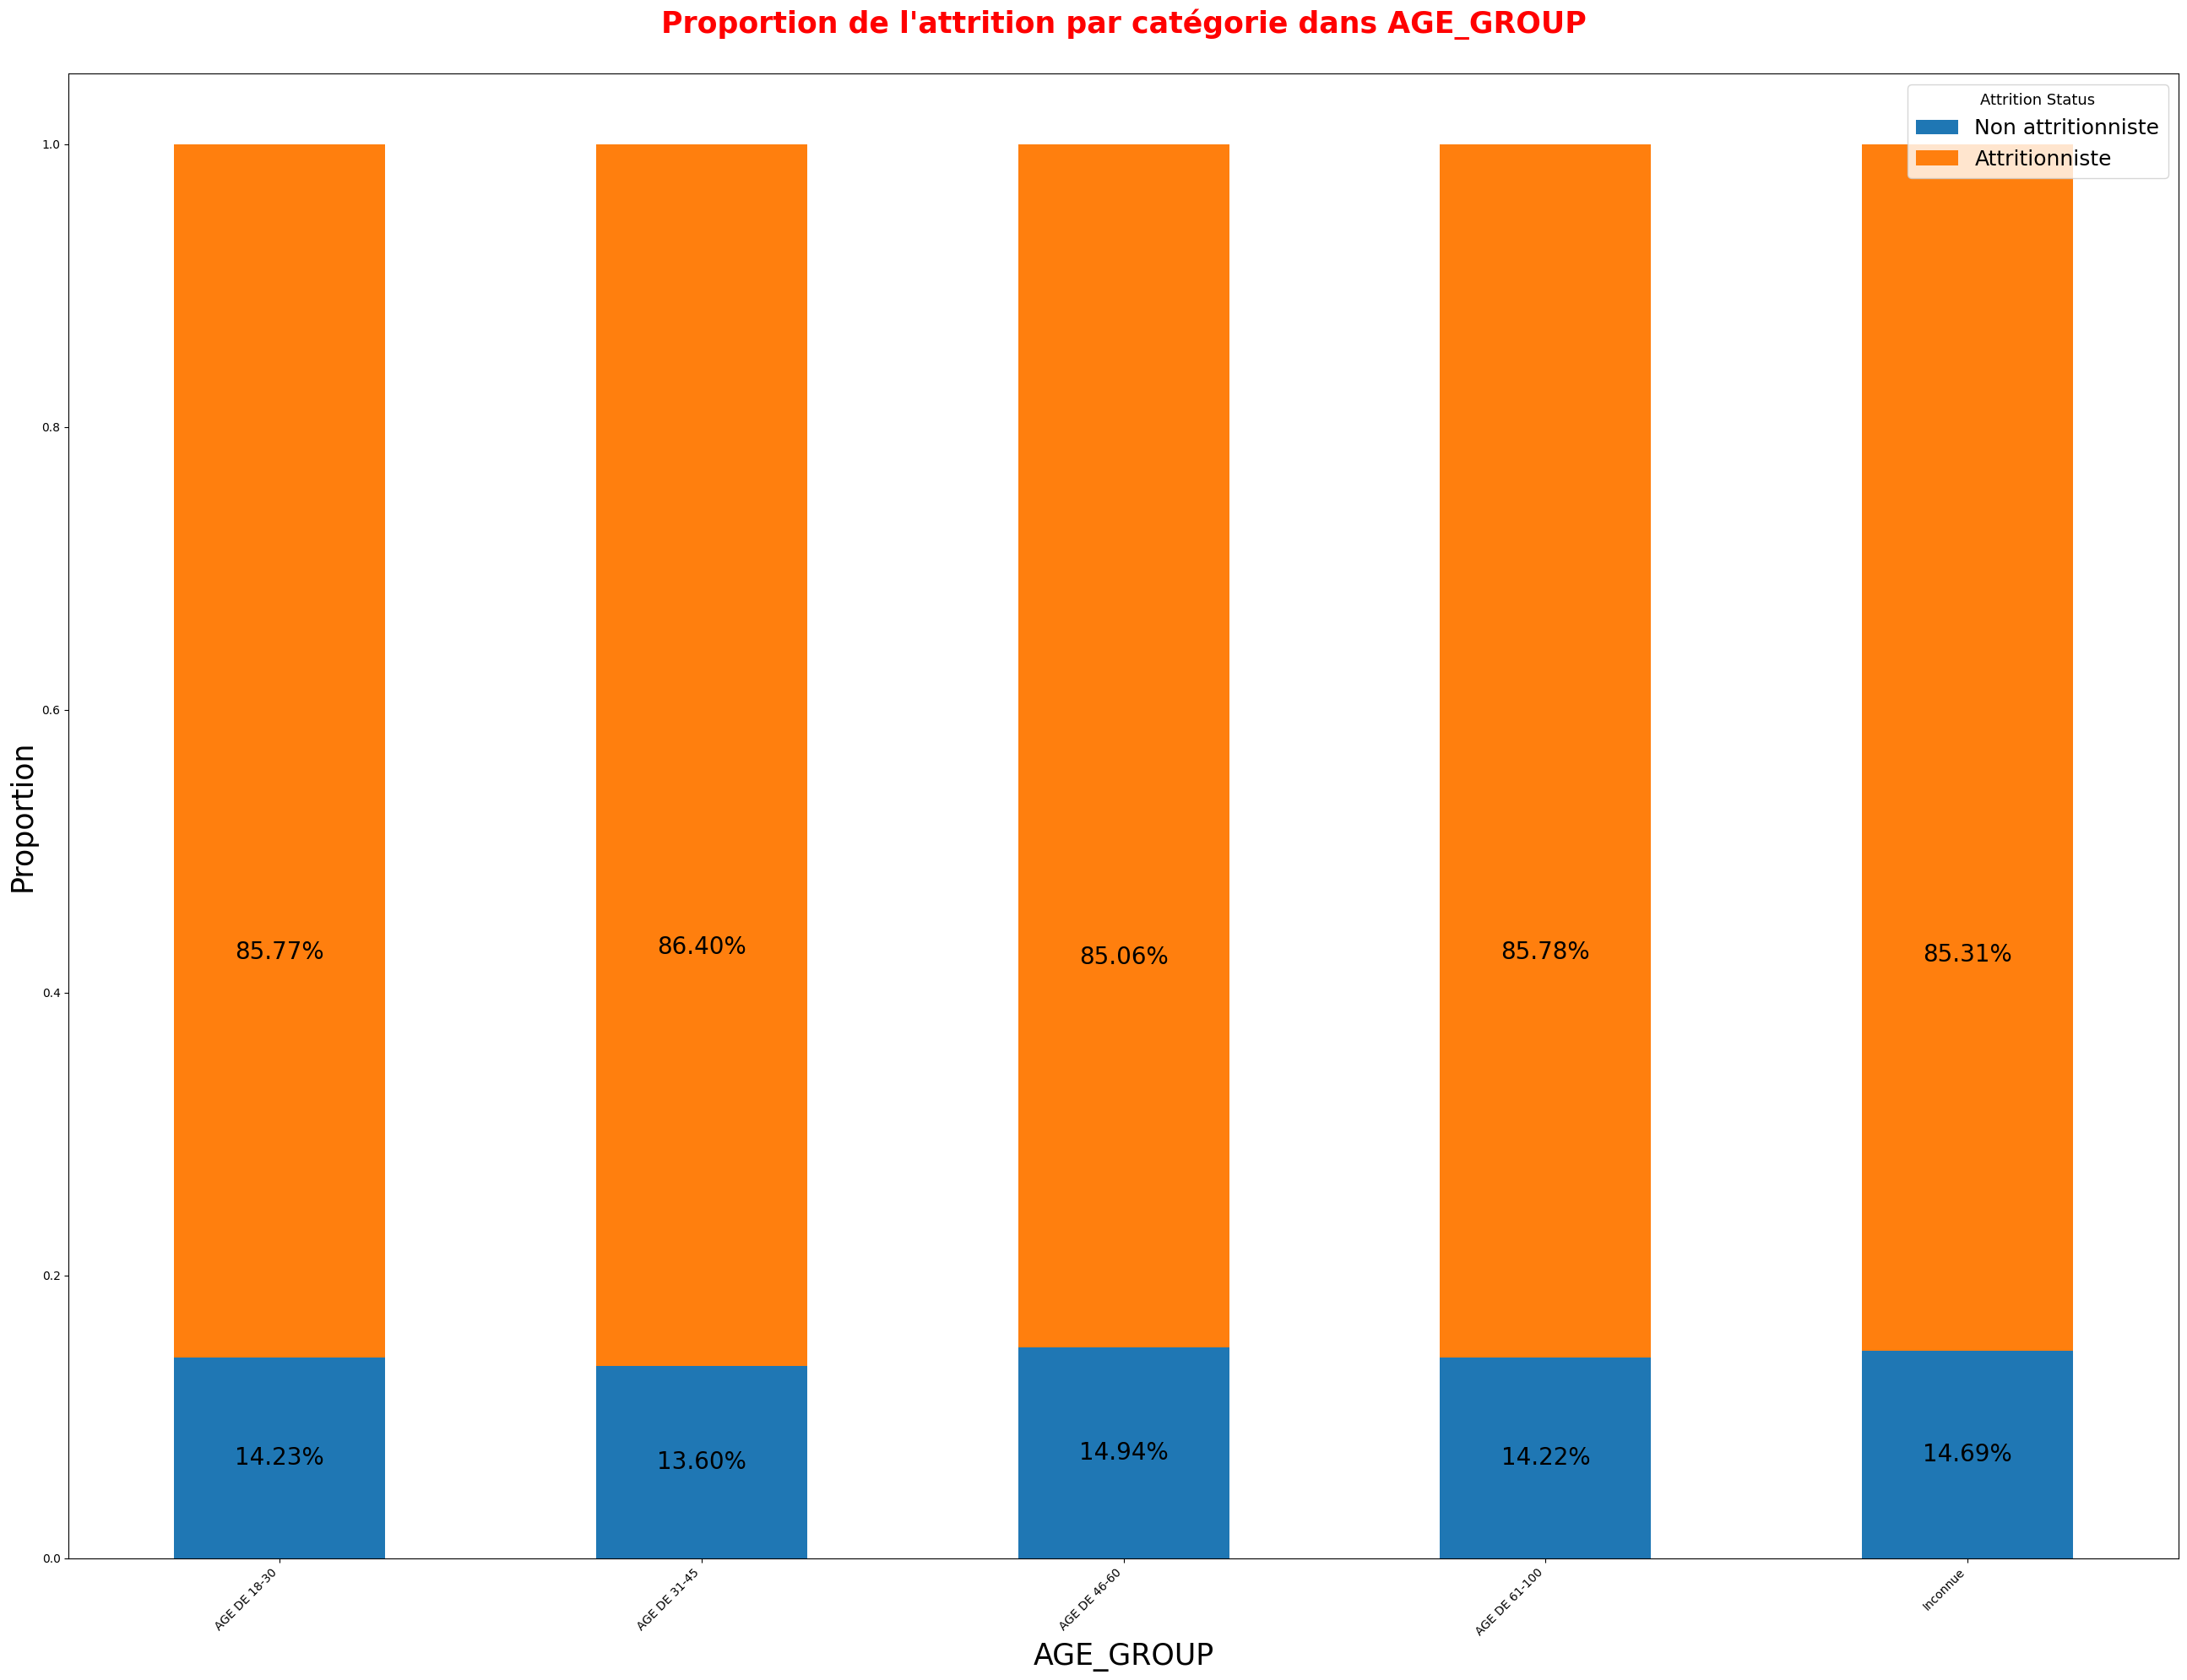

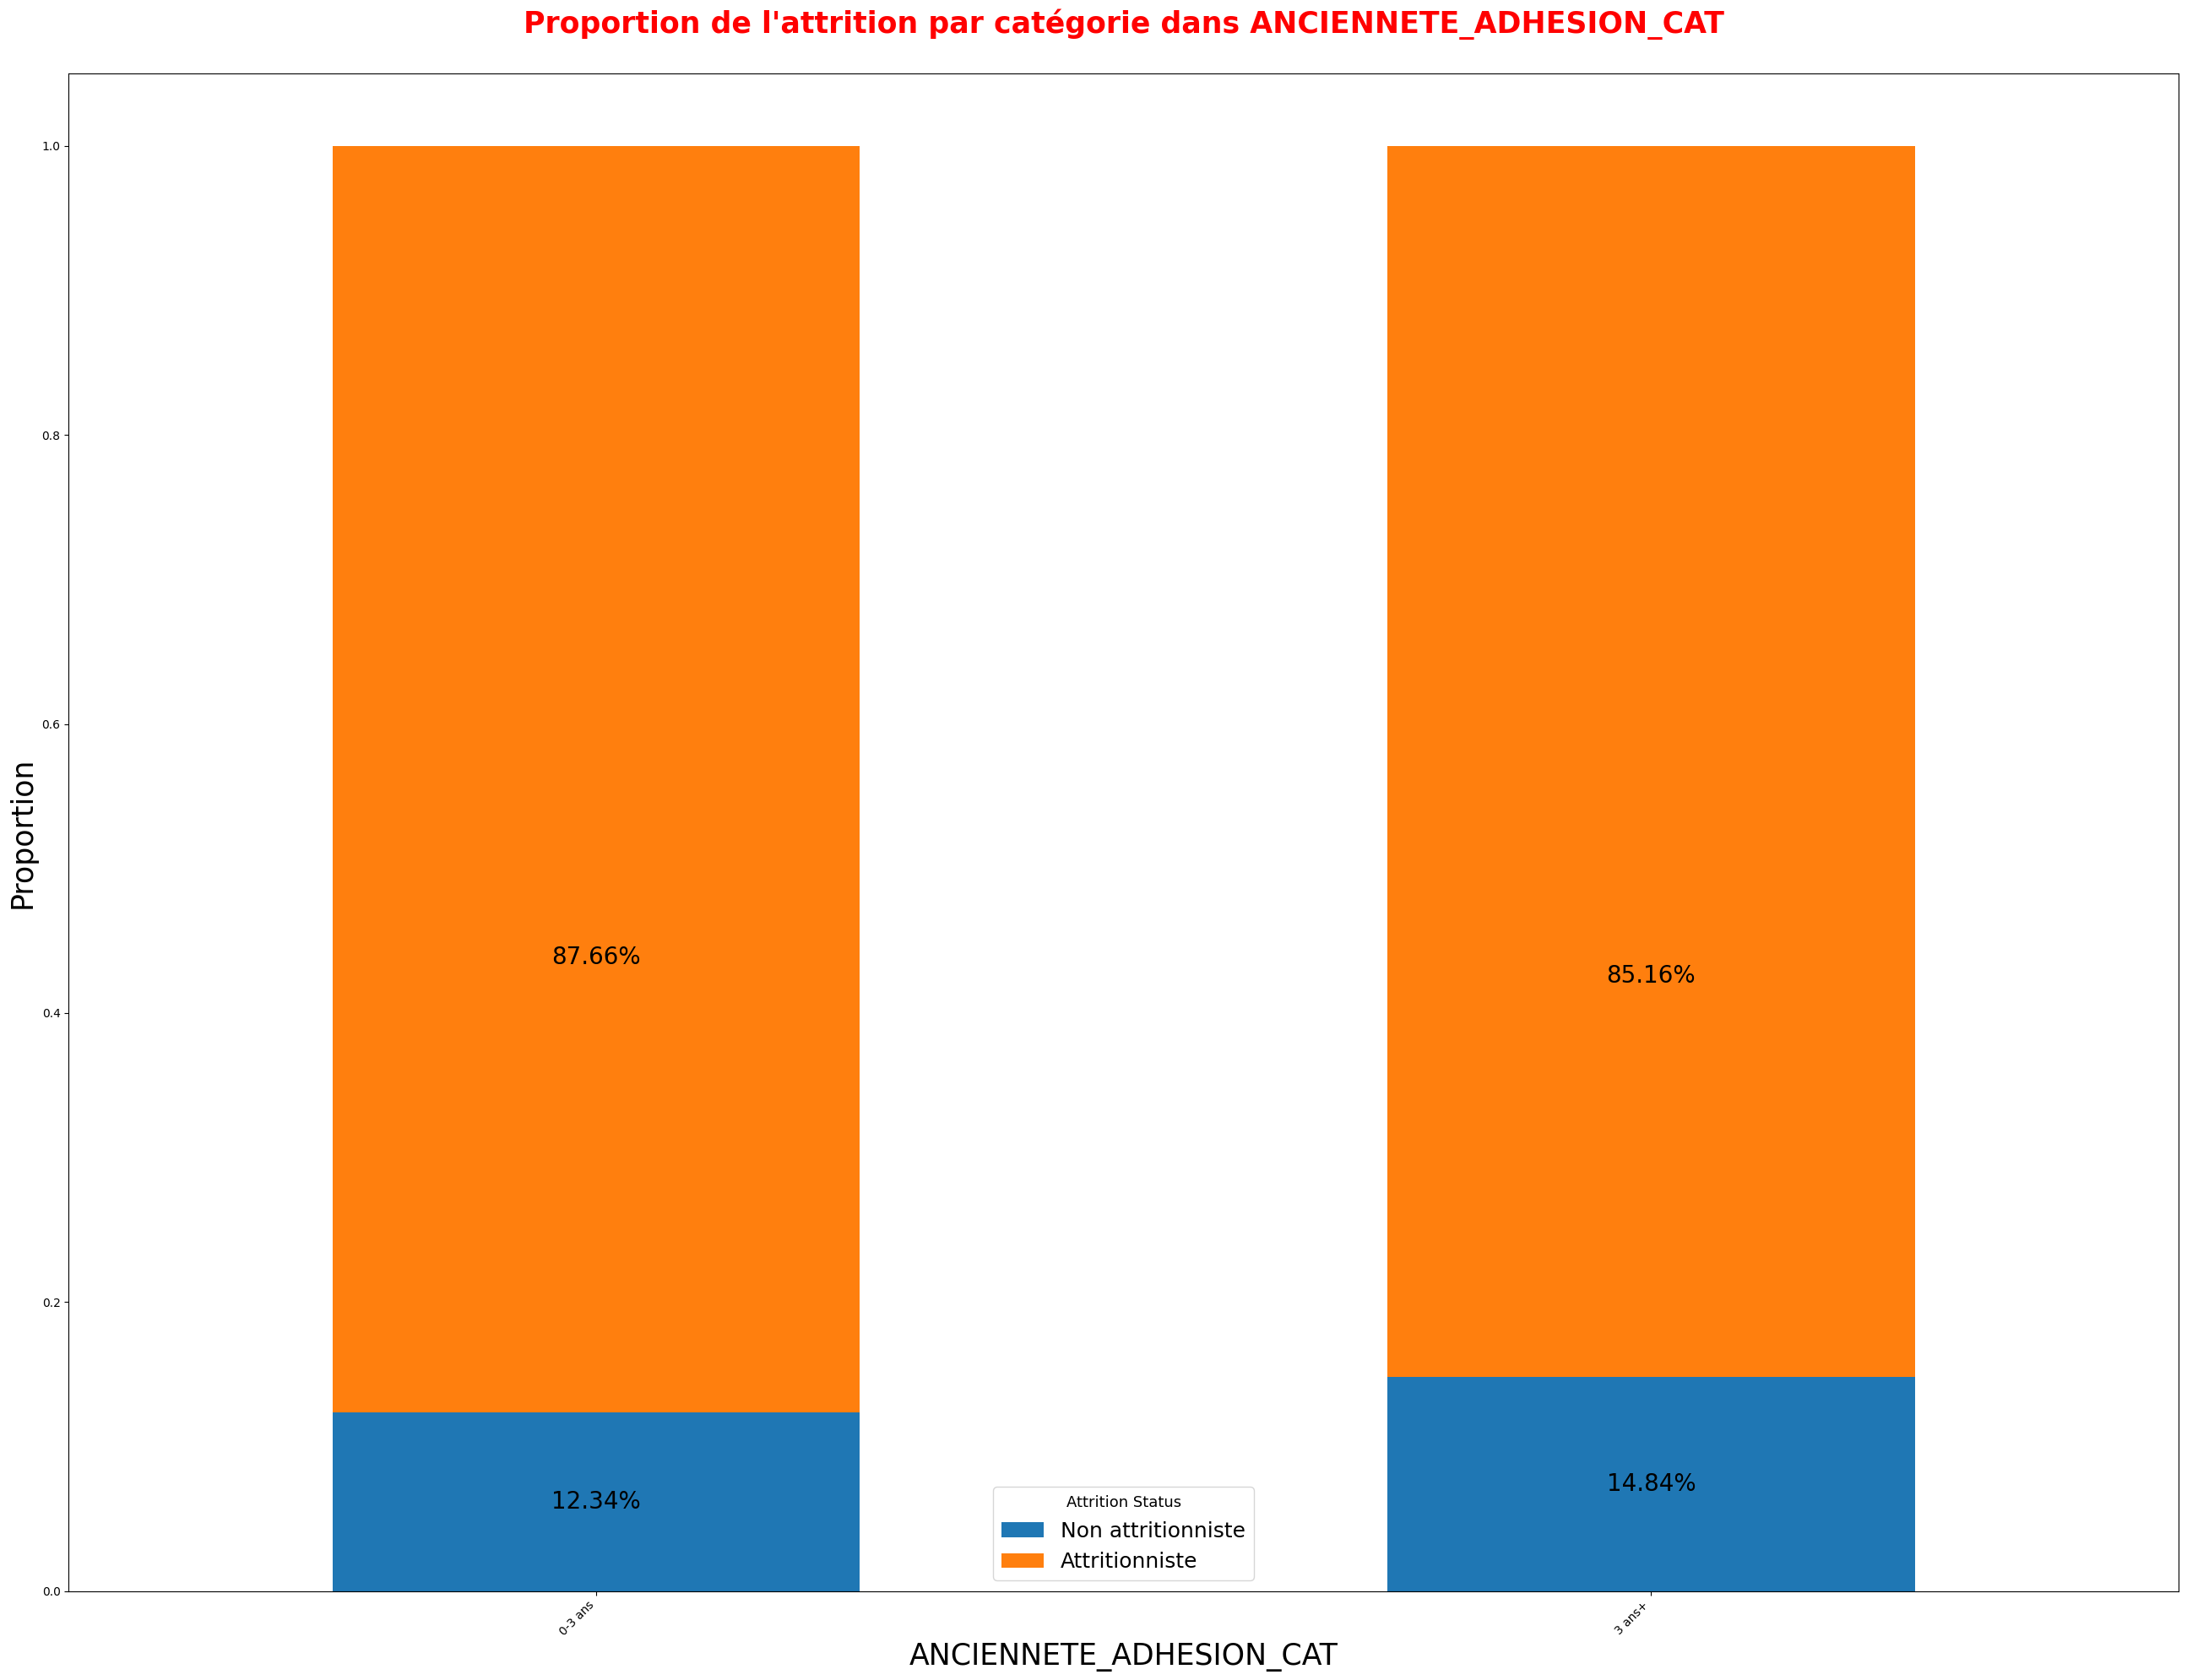

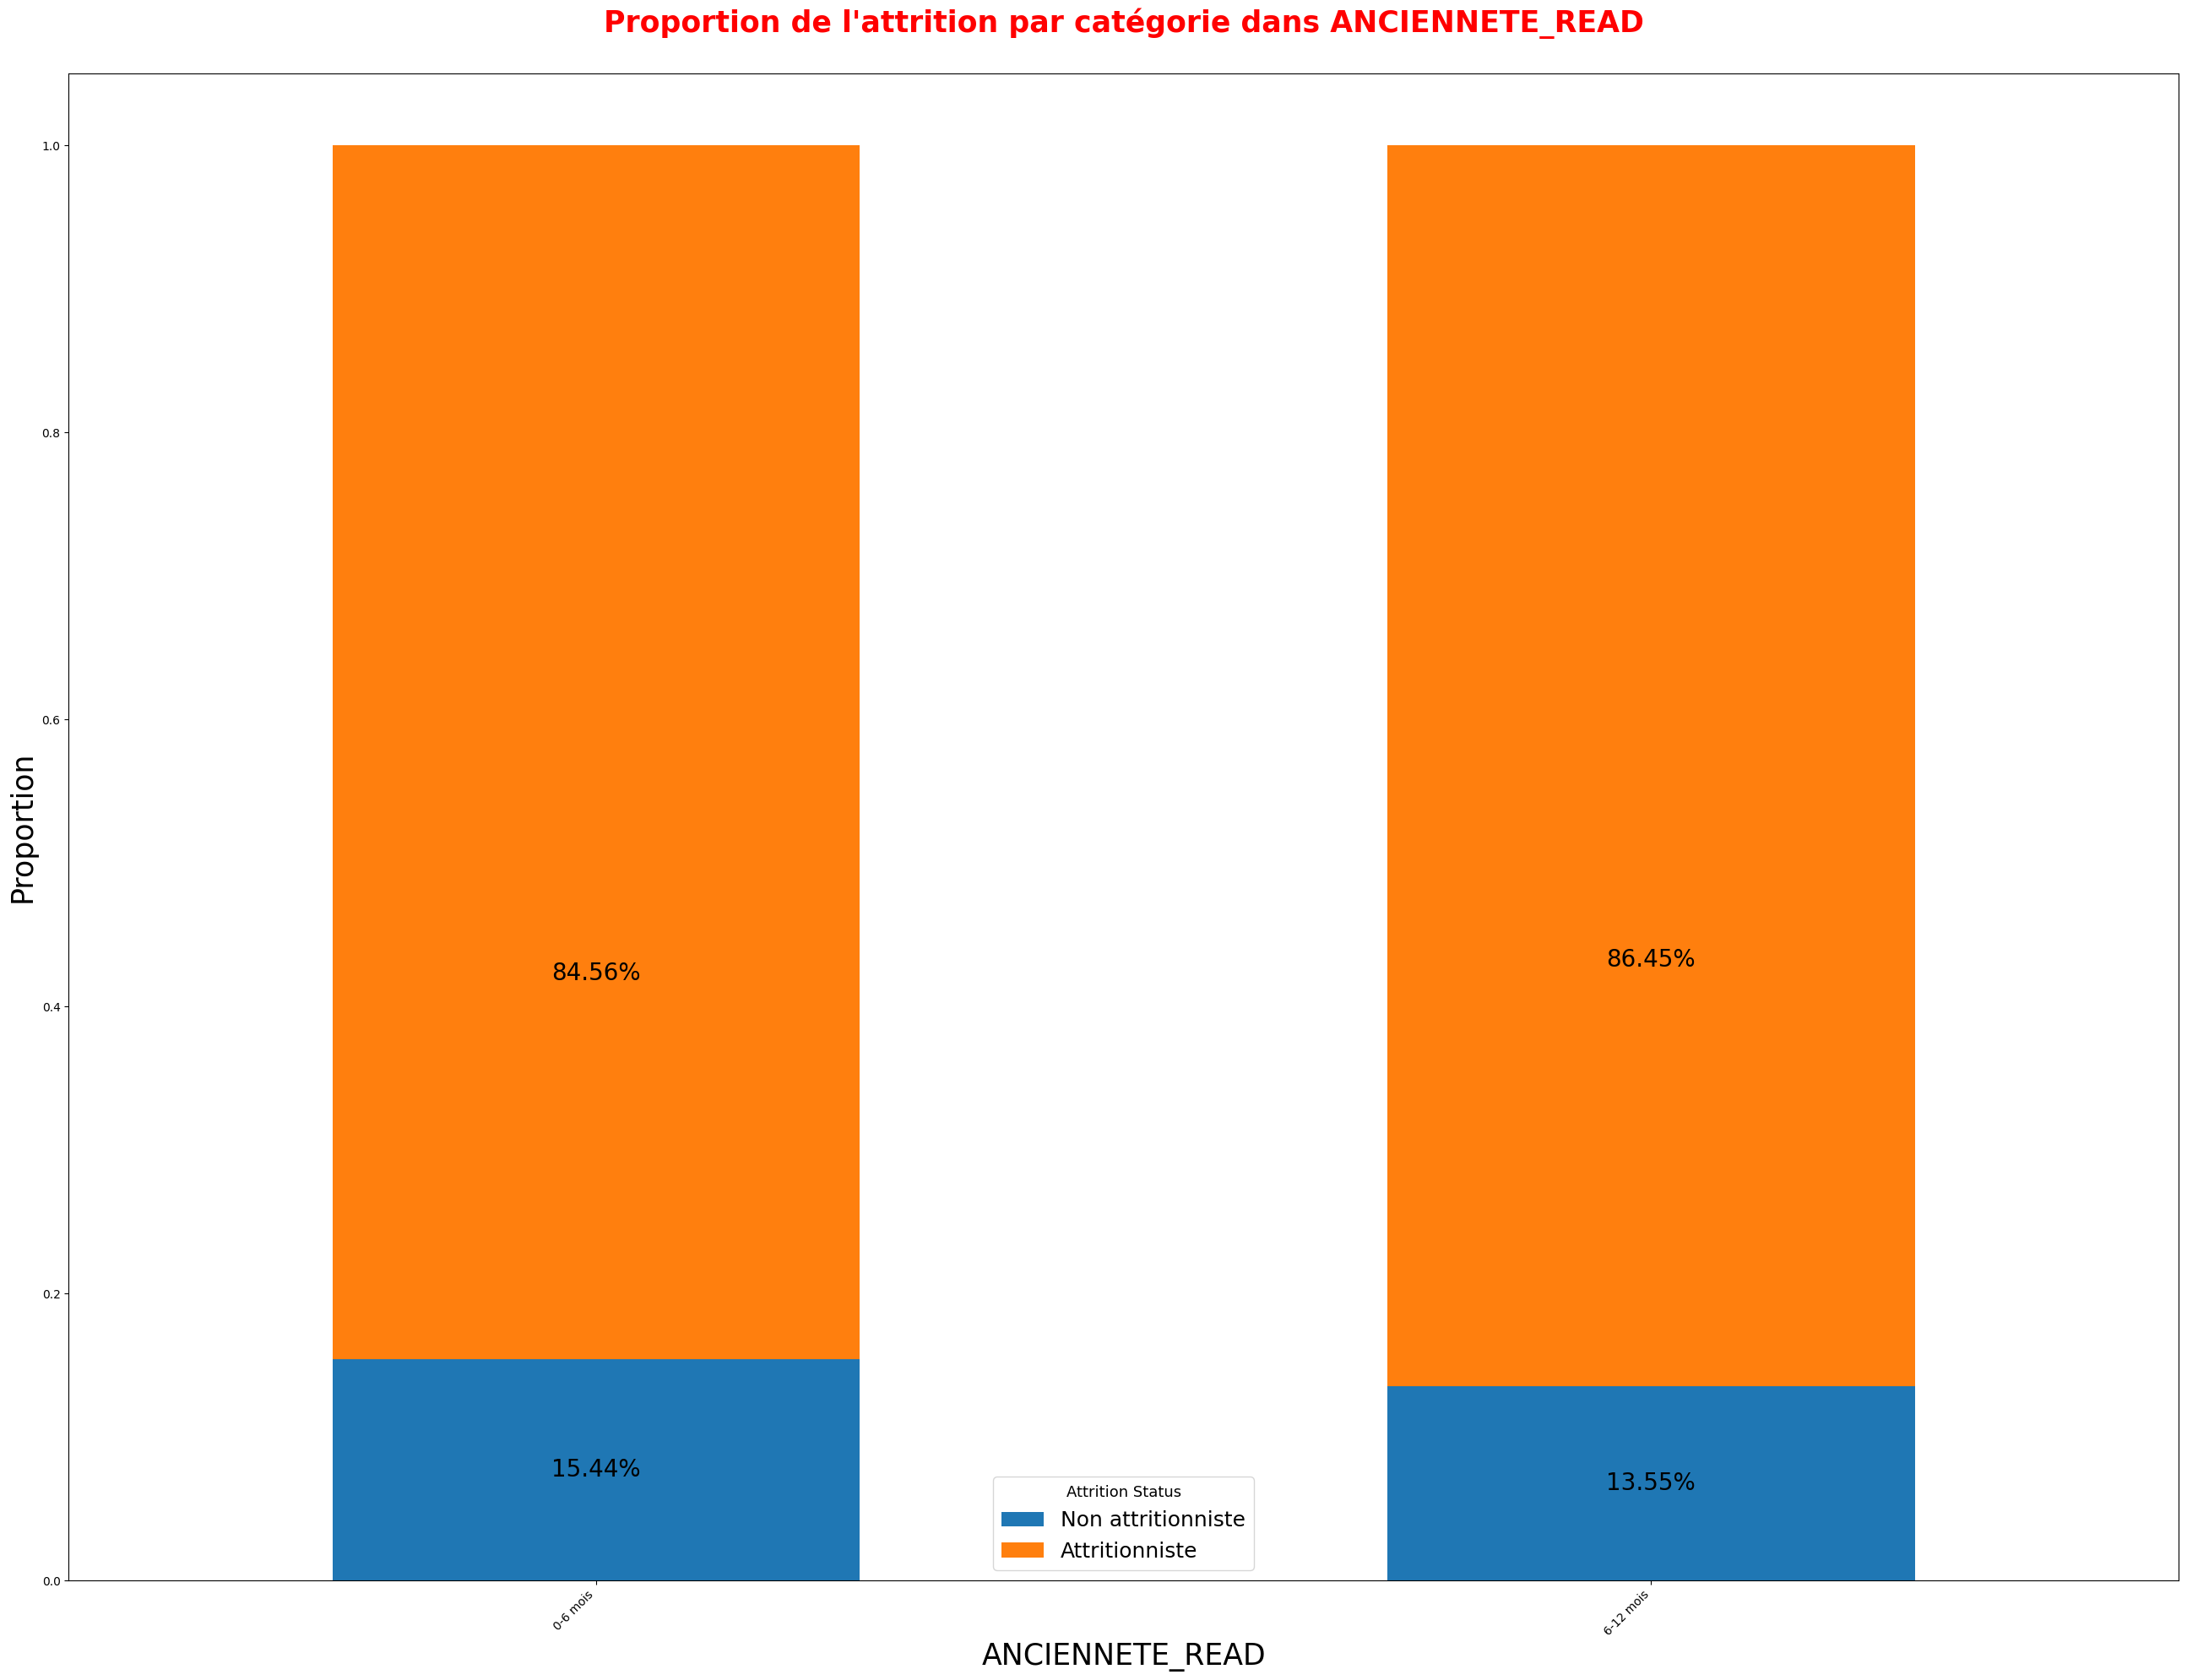

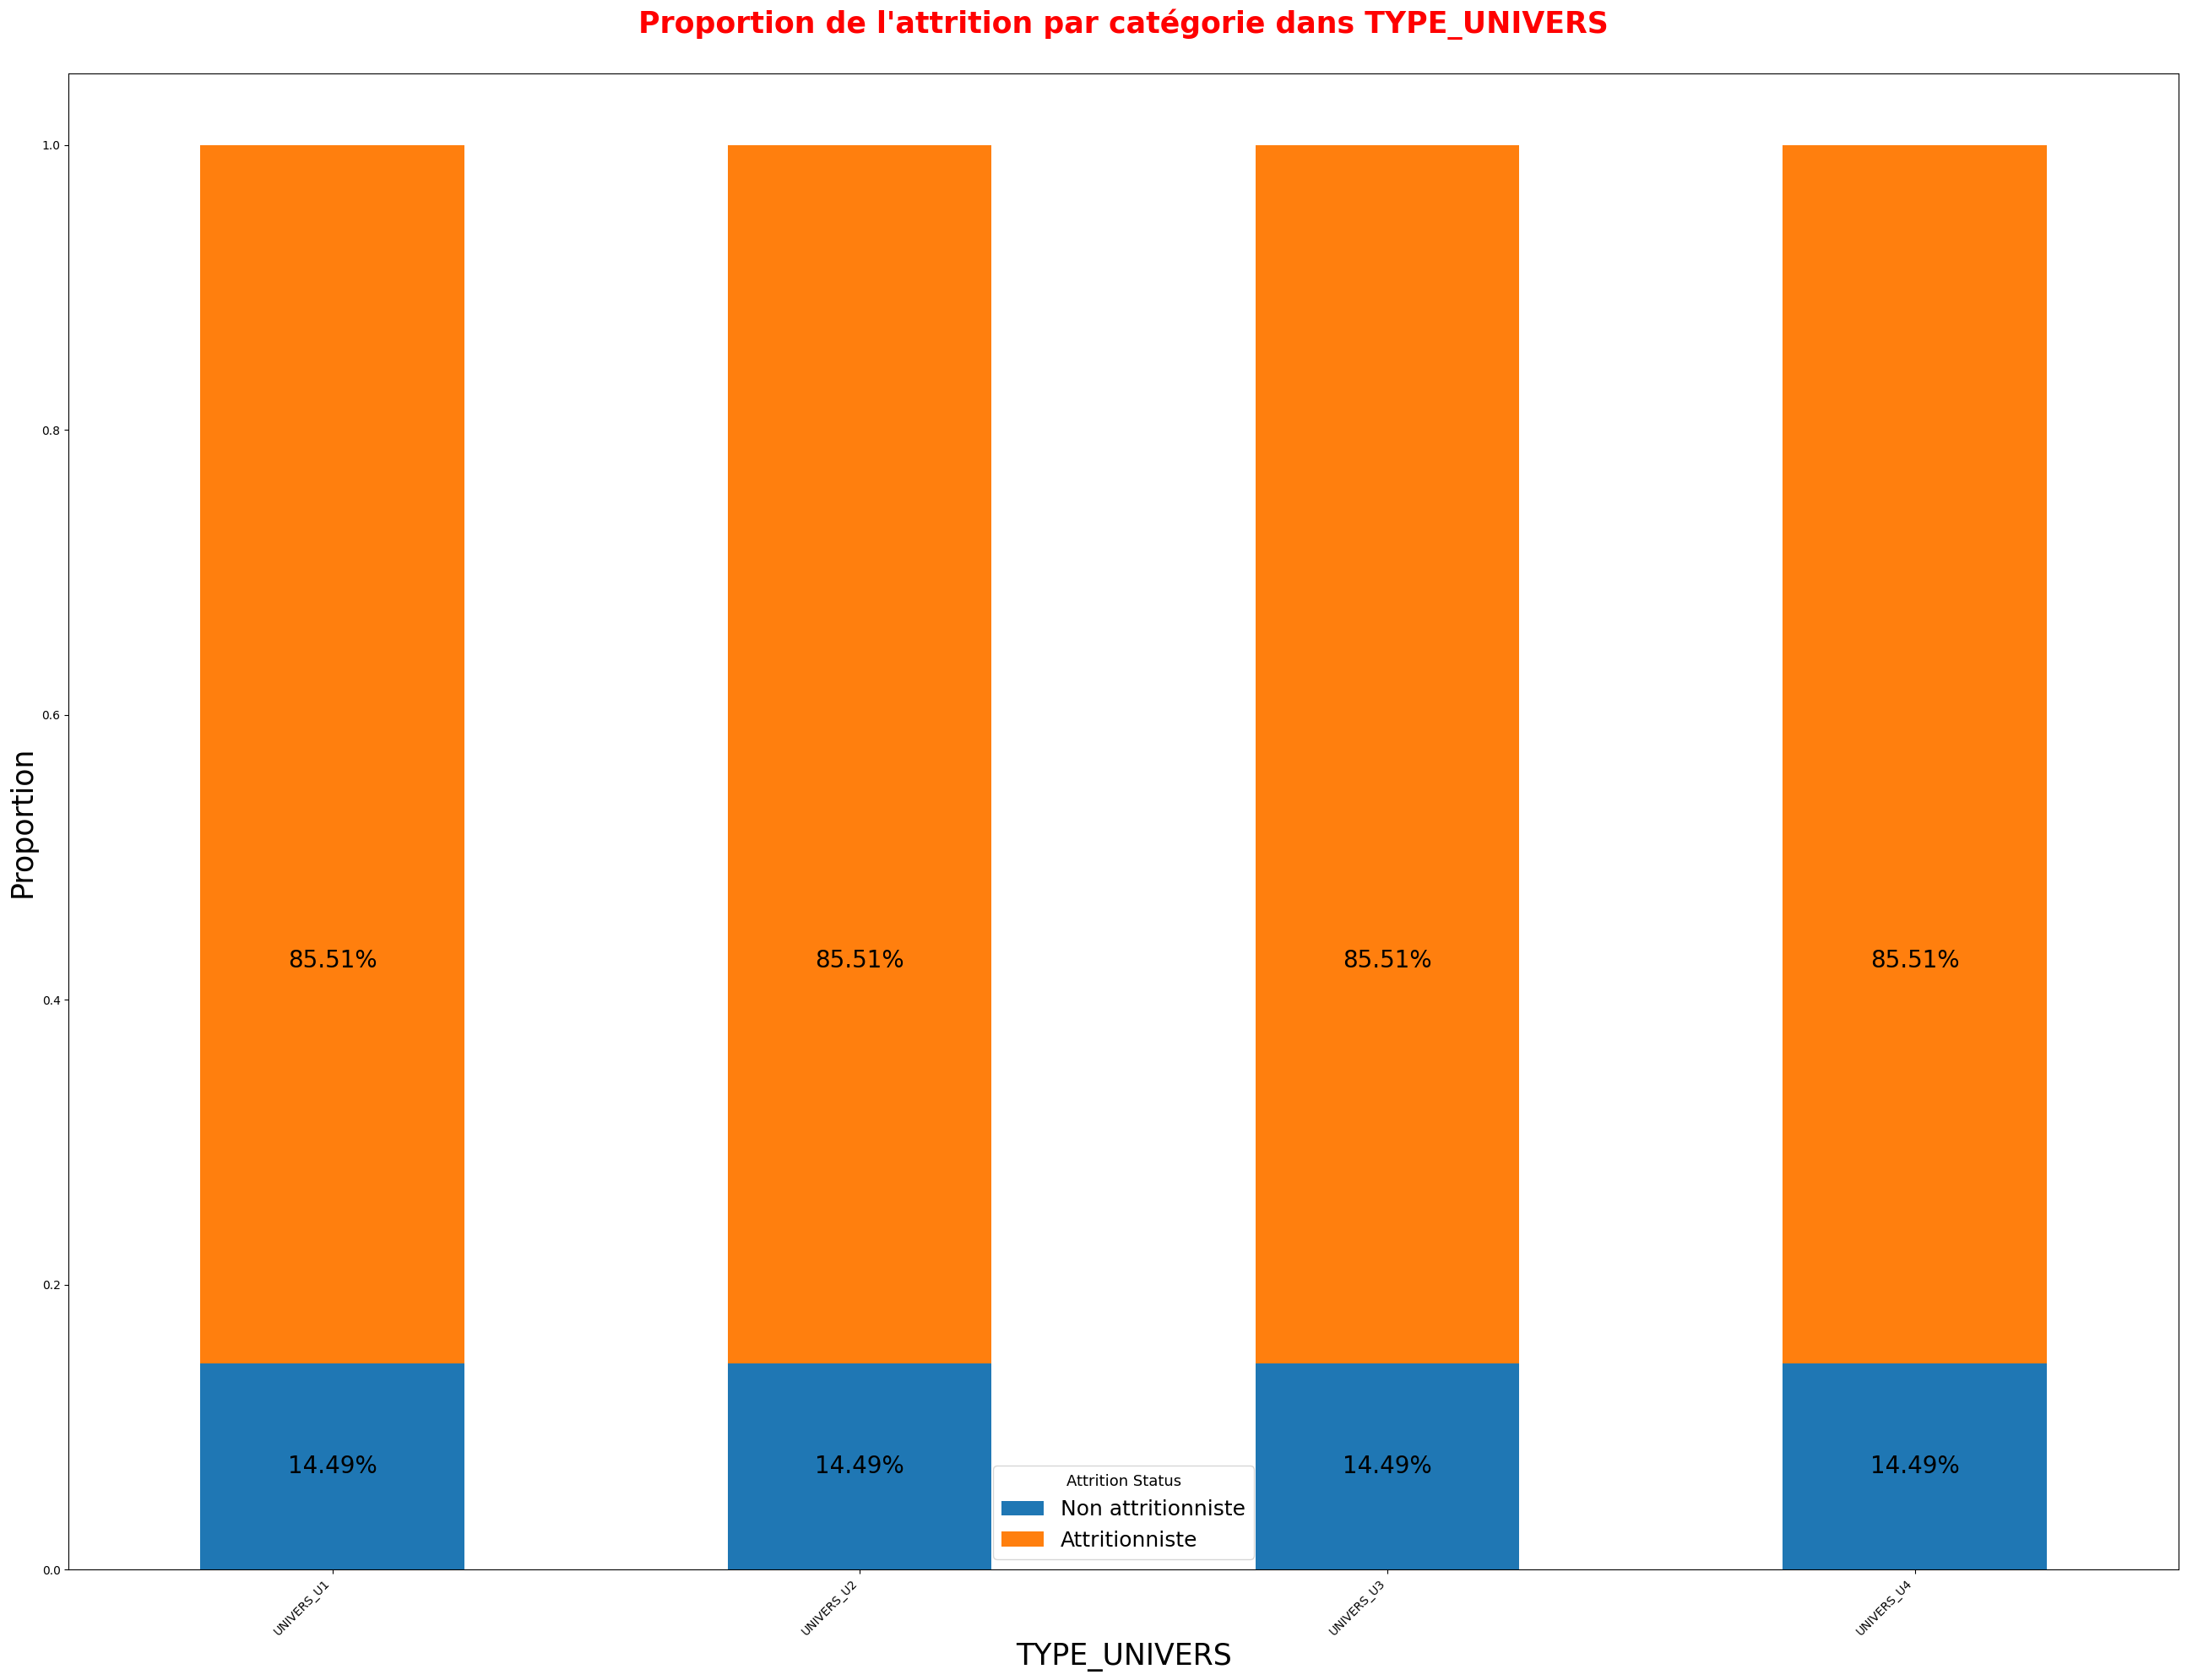

In [52]:
# Importer la librairie pandas
import pandas as pd

# Définition des variables catégorielles
var_cat = df_cat_clean.select_dtypes(include=['object']).columns.tolist()

# Générer un bar plot pour chaque variable catégorielle
for var in var_cat:
    prop_df = (df_BOTANIC_F.groupby([var, 'ATTRITION'])['ATTRITION'].count() / df_cat_clean.groupby([var])[var].count()).unstack(level=1)
    
    fig, ax = plt.subplots(figsize=(26, 20)) 
    
    prop_df.plot(kind='bar', stacked=True, ax=ax)
    
    plt.title(f"Proportion de l\'attrition par catégorie dans {var}\n", fontsize=25, color='red', fontweight='bold')
    plt.xlabel(var, fontsize=25)
    plt.ylabel('Proportion', fontsize=25)
    plt.legend(['Non attritionniste', 'Attritionniste'], title='Attrition Status', fontsize=18, title_fontsize='13')
    
    # Rotate x-tick labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Display percentages directly on the bars
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{height:.2%}', ha='center', va='center', fontsize=20)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

ANALYSE BIVARIÉE DES VARIABLES QUANTITATIVES

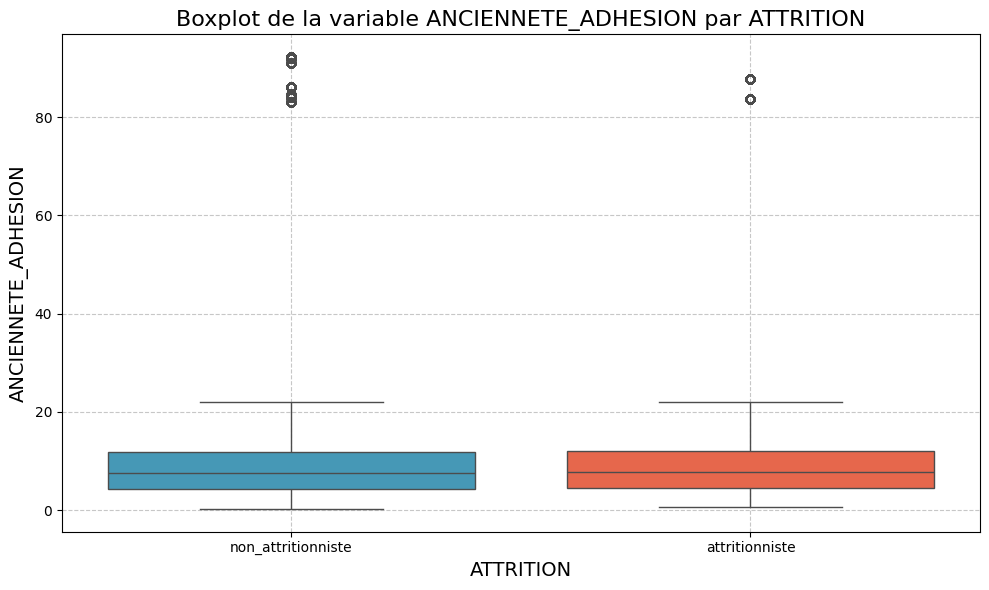

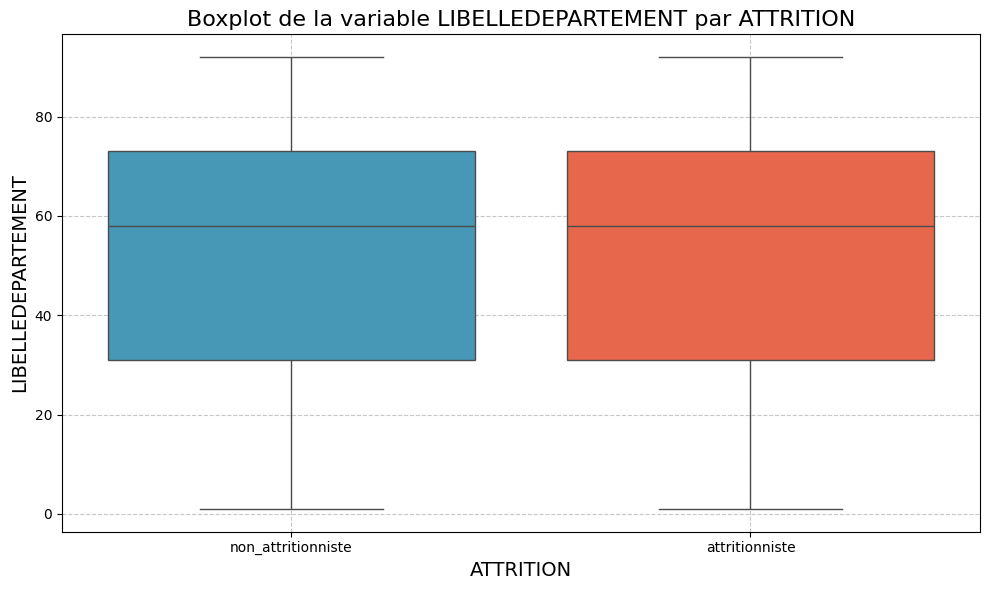

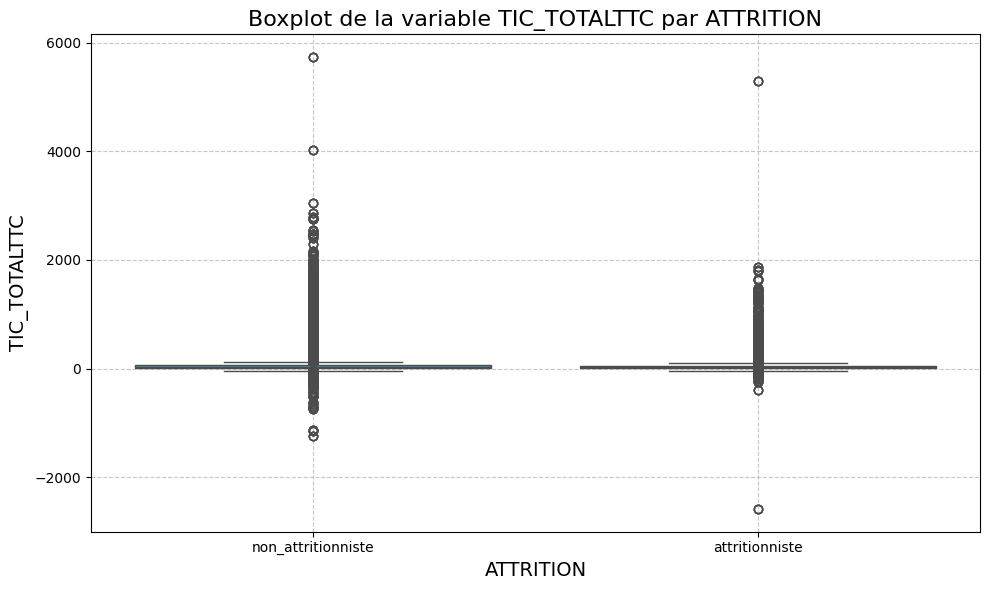

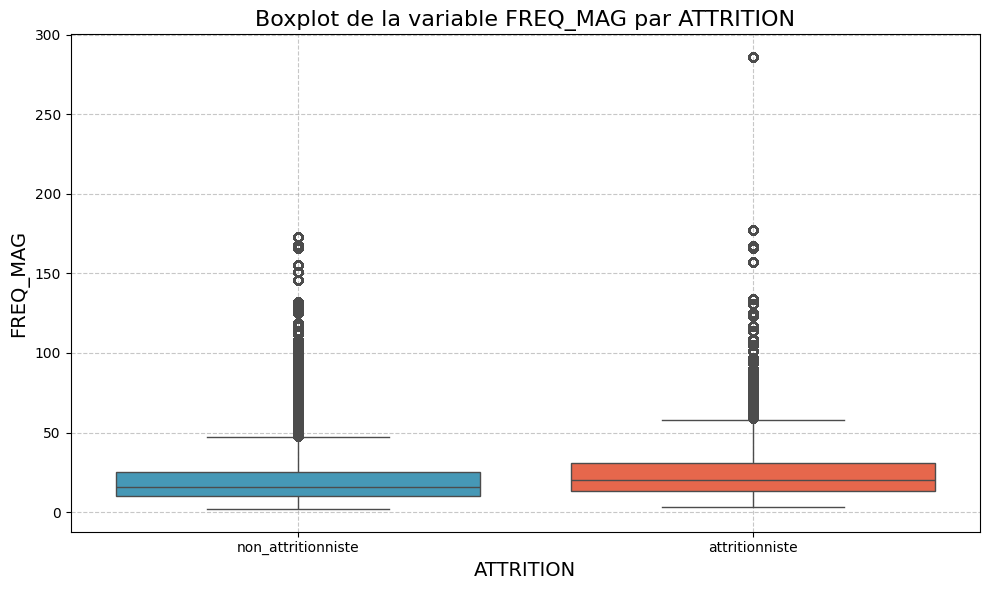

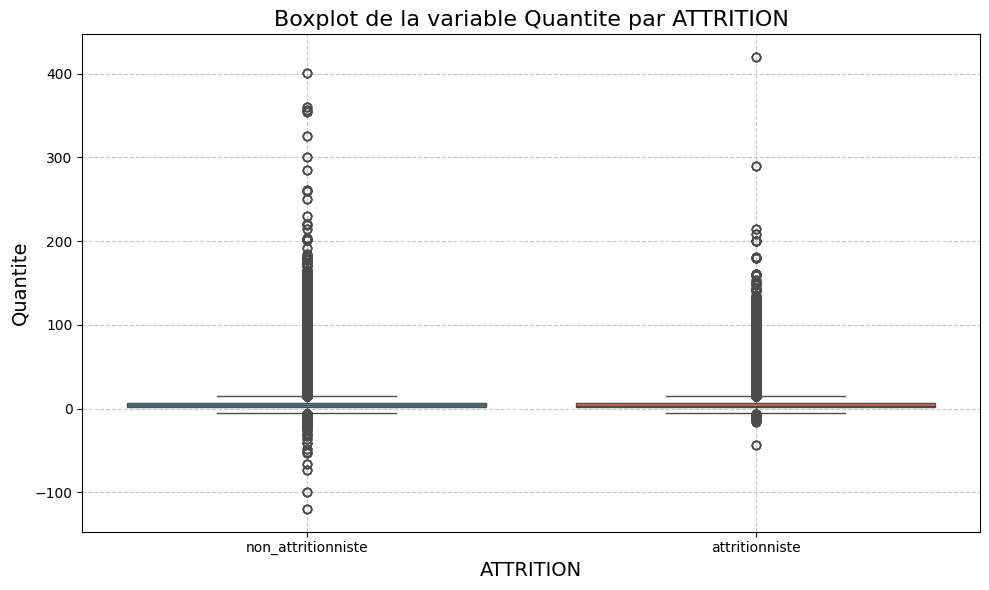

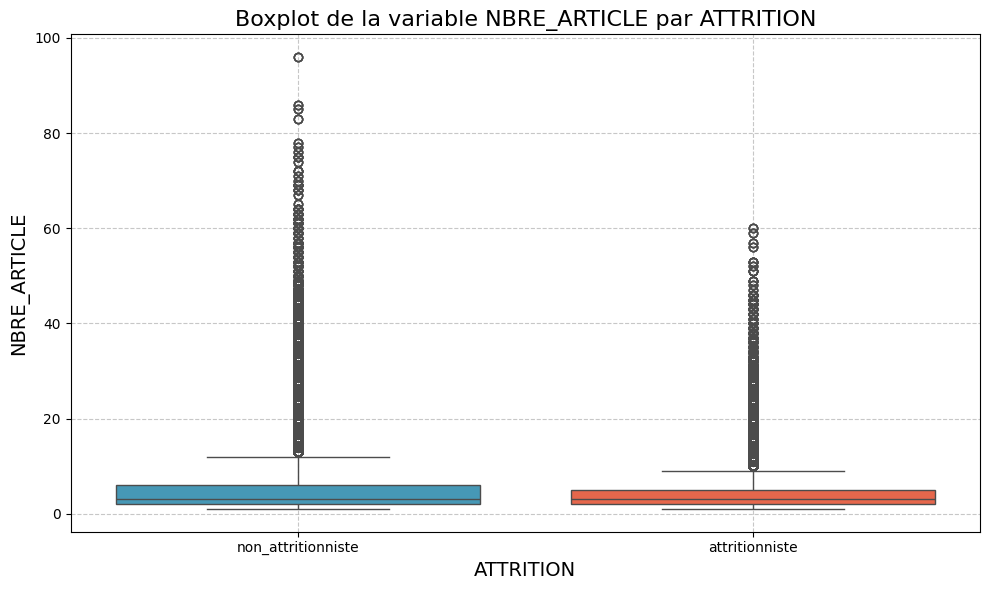

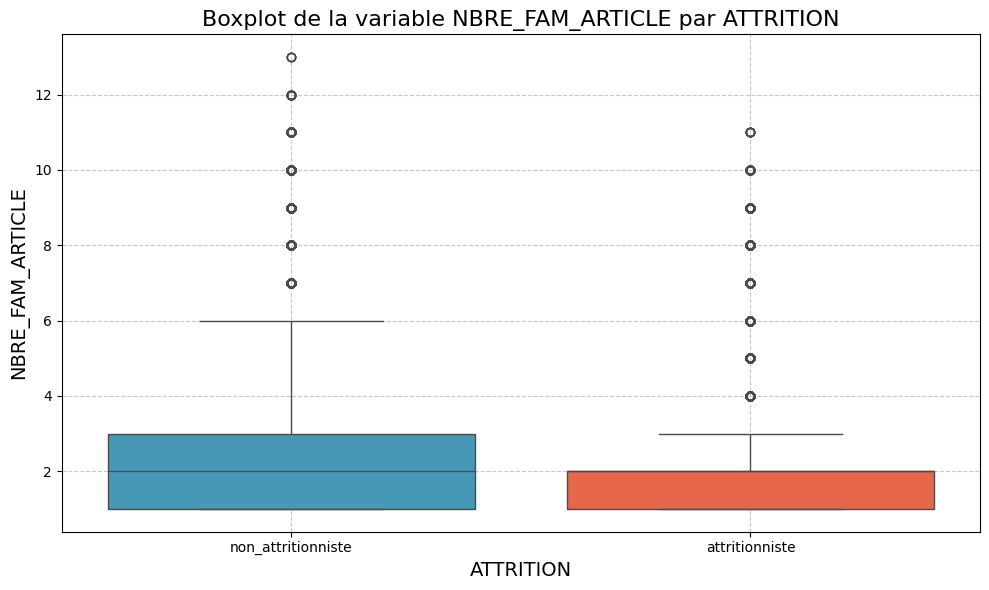

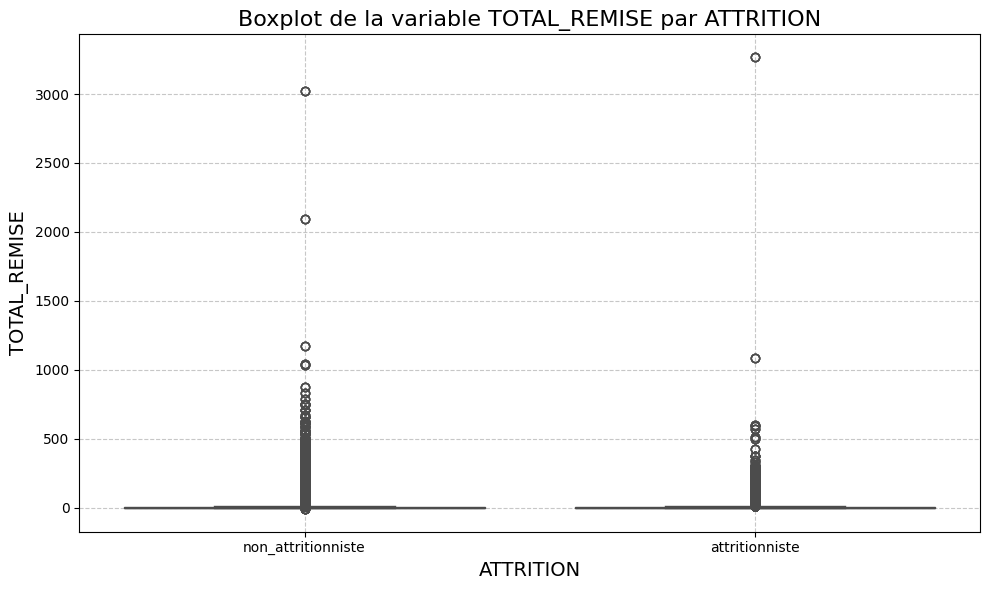

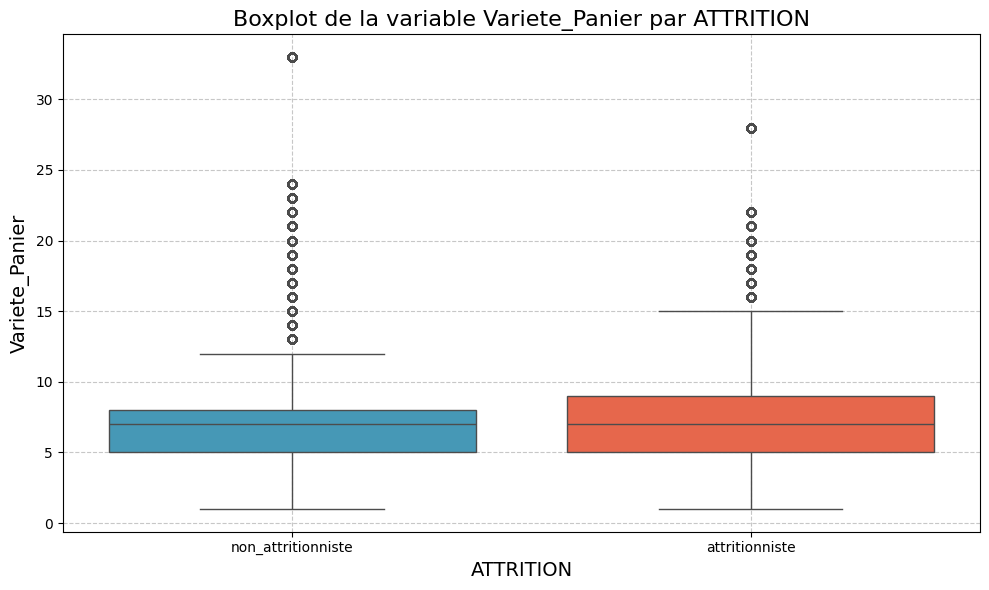

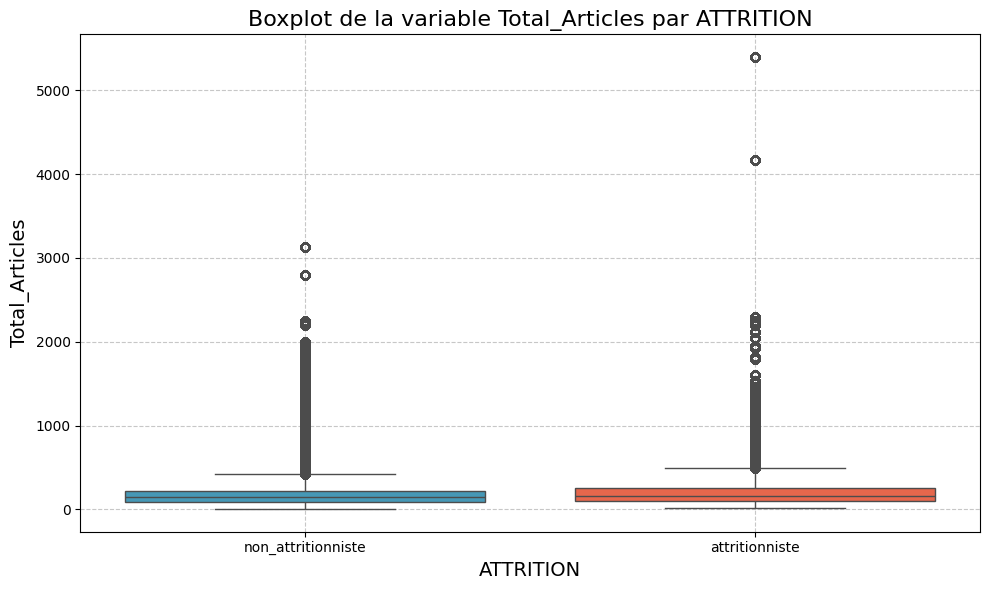

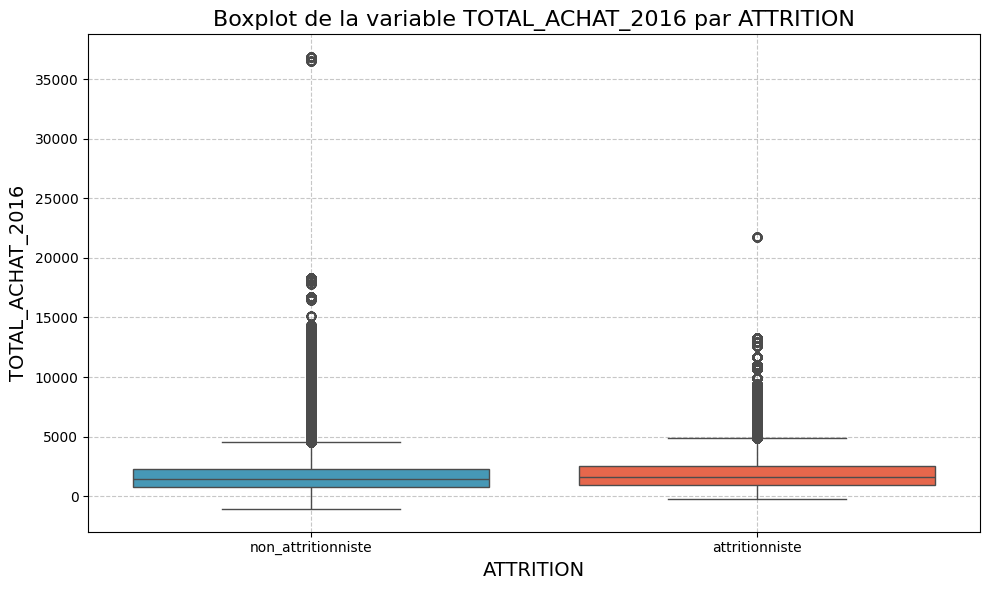

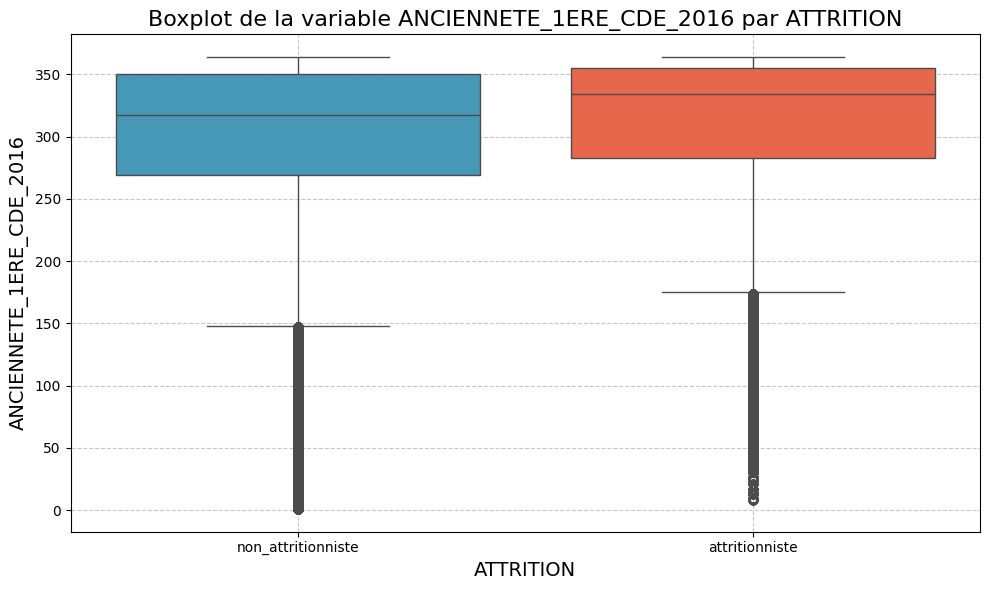

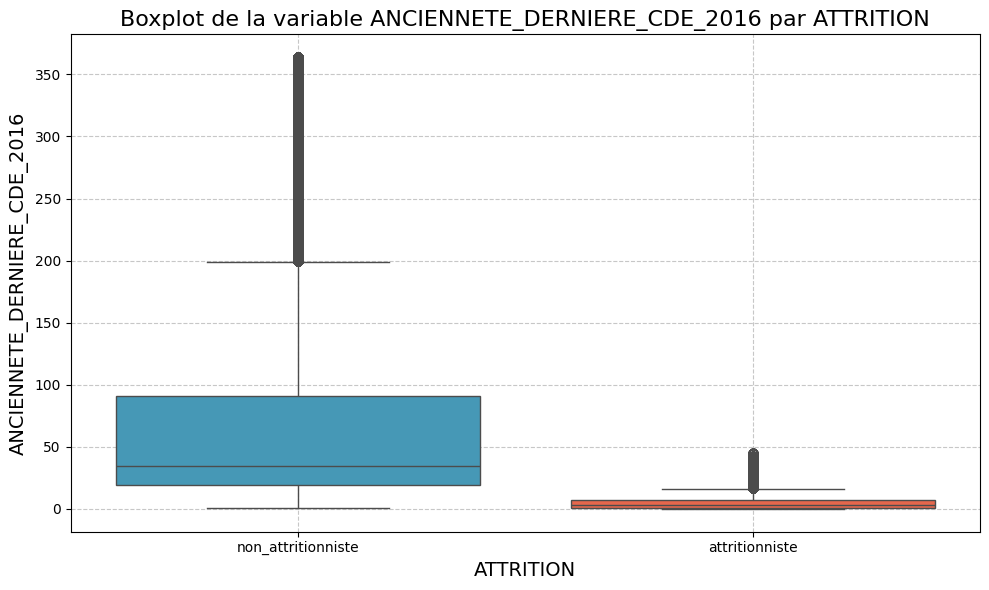

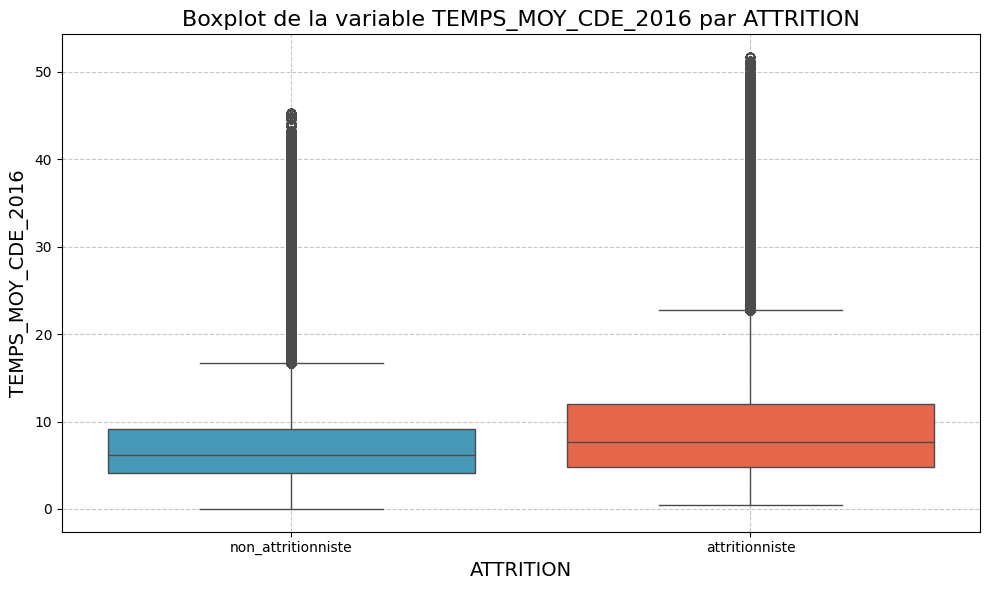

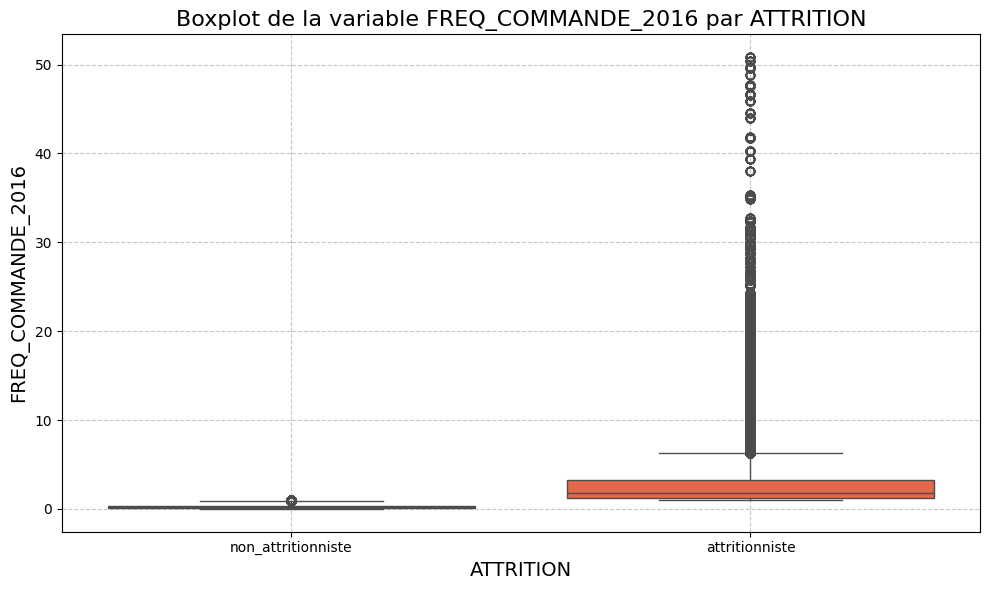

In [53]:
# Importer les librairies nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Définition des variables quantitatives
var_quan = df_num_clean.select_dtypes(include=['int64','float64']).columns.tolist()

# Configuration d'une palette de couleurs définie (deux couleurs pour deux catégories)
palette = ['#33A1C9', '#FF5733'] # Par exemple bleu et rouge

# Générer un box plot pour chaque variable quantitative
for var in var_quan:
    plt.figure(figsize=(10, 6))
    
    # Création du boxplot en utilisant une palette définie
    sns.boxplot(x='ATTRITION', y=var, data=df_BOTANIC_F, hue='ATTRITION', palette=palette, showfliers=True, legend=False)
    
    # Ajout de titre et étiquettes avec descriptions
    plt.title(f'Boxplot de la variable {var} par ATTRITION', fontsize=16)
    plt.xlabel('ATTRITION', fontsize=14)
    plt.ylabel(var, fontsize=14)
    
    # Ajouter une grille pour plus de lisibilité
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Ajustement de la mise en page
    plt.tight_layout()
    
    # Affichage du graphique
    plt.show()

In [54]:
BOTANIC_ANALYSES="C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\BOTANIC ANALYSES.pkl"
df_BOTANIC_F.to_pickle(BOTANIC_ANALYSES)